# Graded Challenge 4

Name : `Kamil Riyadi Alam Situmeang`

Batch : `FTDS009`

## I. Introduction

This project is meant for fulfilling `Hacktiv8 Fulltime Datascience Bootcamp Graded Challenge 4 assignment.`

In this project, I will try to implement a clustering work using `Unsupervised` Machine Learning Model.

### I.2 Dataset Description

Dataset for this project is taken from [`Arjun Bhasin`](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata?select=CC+GENERAL.csv) page.\
You can check under the file name `CC GENERAL.csv`

**About Dataset:**

This case requires to `develop a customer segmentation to define marketing strategy`. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

------------------------------------------------------------------------------------------------------------------------------------------

**Attribute Information**

| Colum Name                         | Description                                                                                                                  |
| ---------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| CUST\_ID                           |  Identification of Credit Card holder (Categorical)                                                                          |
| BALANCE                            |  Balance amount left in their account to make purchases                                                                      |
| BALANCE\_FREQUENCY                 |  How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)           |
| PURCHASES                          |  Amount of purchases made from account                                                                                       |
| ONEOFF\_PURCHASES                  |  Maximum purchase amount done in one-go                                                                                      |
| INSTALLMENTS\_PURCHASES            |  Amount of purchase done in installment                                                                                      |
| CASH\_ADVANCE                      |  Cash in advance given by the user                                                                                           |
| PURCHASES\_FREQUENCY               |  How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) |
| ONEOFF\_PURCHASES\_FREQUENCY       |  How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)                   |
| PURCHASES\_INSTALLMENTS\_FREQUENCY |  How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)                      |
| CASH\_ADVANCE\_FREQUENCY           |  How frequently the cash in advance being paid                                                                               |
| CASH\_ADVANCE\_TRX                 |  Number of Transactions made with "Cash in Advanced"                                                                         |
| PURCHASES\_TRX                     |  Number of purchase transactions made                                                                                         |
| CREDIT\_LIMIT                      |  Limit of Credit Card for user                                                                                               |
| PAYMENTS                           |  Amount of Payment done by user                                                                                              |
| MINIMUM\_PAYMENTS                  |  Minimum amount of payments made by user                                                                                     |
| PRC\_FULL\_PAYMENT                 |  Percent of full payment paid by user                                                                                        |
| TENURE                             |  Tenure of credit card service for user                                                                                      |

------------------------------------------------------------------------------------------------------------------------------------------

**Acknowledgements:**

**License**
[CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)

### I.3 Objectives

Main objectives for this project are:
- Implement clustering process using `Unsupervised` machine learning algorithm.
- Determines customer segmentation based on the given dataset.

## II. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Data Preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder, Normalizer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA

# Model
from sklearn.cluster import KMeans, Birch, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

## III. Data Loading


In [2]:
# Load Data and save it in `df_og` variable
df_og = pd.read_csv('CC GENERAL.csv')

# Make copy from the df
df = df_og.copy()

### Dataset Preview

In [3]:
# Show the dataset
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
# Dataset Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
# Dataset Shape
df.shape

(8950, 18)

In [6]:
# Null value summary
df.isnull().sum().sort_values()

CUST_ID                               0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
PRC_FULL_PAYMENT                      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
BALANCE                               0
PURCHASES_FREQUENCY                   0
TENURE                                0
CREDIT_LIMIT                          1
MINIMUM_PAYMENTS                    313
dtype: int64

In [7]:
# Dataset Check
df.describe(percentiles=[0.5]).T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          50%          max  
BALANCE                            873.385231  19043.13856  
BALANCE_FREQUENCY                    1.000000      1.00000  
PURCHASES                          361.280000  49039.57000  
ONEOFF_PURCHASES                    38.000000  40761.25000  
INSTALLMENTS_PURCHASES              89.000000  22500.00000  
CASH_ADVANCE                         0.000000  47137.21176  
PURCHASES_FREQUENCY                  0.500000      1.00000  
ONEOFF_PURCHASES_FREQUENCY           0.083333      1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.166667      1.00000  
CASH_ADVANCE_FREQUENCY               0.000000      1.50000  
CASH_ADVANCE_TRX                     0.000000    123.00000  
PURCHASES_TRX                        7.000000    358.00000  
CREDIT_LIMIT                      3000.000000  30000.00000  
PAYMENTS                           856.901546  50721.48336  
MINIMUM_PAYMENTS                   312.343947  76406.20752  
PRC_FULL_PAYMENT                     0.000000      1.00000  
TENURE                              12.000000     12.00000

Insight from `Dataset Preview` process:

Based on above process, I get these information:

- The dataset consist of `8950 rows` of entries and `18 columns.`
- There is `1 features` that is `object`, `3 features` that is `integer type` and `14 features` that is `float type`
- All features is numerical type, except `TENURE` which is categorical-numerical type.
- There are apparent missing values in `CREDIT_LIMIT` and `MINIMUM_PAYMENTS` columns.
- There is no strange values in the dataset preview.

## IV. Exploratory Data Analysis

In this part of process, I will try to get to know with the dataset and find some facts about the customer.

### Preliminary Check

Before going deep into the dataset, Let's generaly check the dataset. First let's check wether there is duplicate entry in the dataset.

In [8]:
# Duplicate entry check
df.duplicated().sum()

0

Looks like our dataset is free from `duplicate values.`
Now let's get deeper with each variable.

In [9]:
# Preliminary Check
# Variable : BALANCE  
# Description : Balance amount left in their account to make purchases

var = 'BALANCE'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: BALANCE
null value count:  0

Descriptive stats:
count     8950.0
mean      1564.0
std       2082.0
min          0.0
25%        128.0
50%        873.0
75%       2054.0
max      19043.0
Name: BALANCE, dtype: float64
____________________________________________________________________________________________________


0         40.900749
1       3202.467416
2       2495.148862
3       1666.670542
4        817.714335
           ...     
8945      28.493517
8946      19.183215
8947      23.398673
8948      13.457564
8949     372.708075
Name: BALANCE, Length: 8950, dtype: float64

I think this feature is good to go. I'll just round the values to 2 decimal places.

In [10]:
# Rounding the values
df.BALANCE = df.BALANCE.round(2)

# Confirmation
df.BALANCE

0         40.90
1       3202.47
2       2495.15
3       1666.67
4        817.71
         ...   
8945      28.49
8946      19.18
8947      23.40
8948      13.46
8949     372.71
Name: BALANCE, Length: 8950, dtype: float64

In [11]:
# Preliminary Check
# Variable : BALANCE_FREQUENCY  
# Description : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
var = 'BALANCE_FREQUENCY'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: BALANCE_FREQUENCY
null value count:  0

Descriptive stats:
count    8950.0
mean        1.0
std         0.0
min         0.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: BALANCE_FREQUENCY, dtype: float64
____________________________________________________________________________________________________


0       0.818182
1       0.909091
2       1.000000
3       0.636364
4       1.000000
          ...   
8945    1.000000
8946    1.000000
8947    0.833333
8948    0.833333
8949    0.666667
Name: BALANCE_FREQUENCY, Length: 8950, dtype: float64

I think this feature is good to go. I'll just round the values to 2 decimal places.

In [12]:
# Rounding the values
df.BALANCE_FREQUENCY = df.BALANCE_FREQUENCY.round(2)

# Confirmation
df.BALANCE_FREQUENCY

0       0.82
1       0.91
2       1.00
3       0.64
4       1.00
        ... 
8945    1.00
8946    1.00
8947    0.83
8948    0.83
8949    0.67
Name: BALANCE_FREQUENCY, Length: 8950, dtype: float64

In [13]:
# Preliminary Check
# Variable : PURCHASES  
# Description : Amount of purchases made from account 

var = 'BALANCE_FREQUENCY'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: BALANCE_FREQUENCY
null value count:  0

Descriptive stats:
count    8950.0
mean        1.0
std         0.0
min         0.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: BALANCE_FREQUENCY, dtype: float64
____________________________________________________________________________________________________


0       0.82
1       0.91
2       1.00
3       0.64
4       1.00
        ... 
8945    1.00
8946    1.00
8947    0.83
8948    0.83
8949    0.67
Name: BALANCE_FREQUENCY, Length: 8950, dtype: float64

I think this feature is good to go.

In [14]:
# Preliminary Check
# Variable : ONEOFF_PURCHASES  
# Description : Maximum purchase amount done in one-go 

var = 'ONEOFF_PURCHASES'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: ONEOFF_PURCHASES
null value count:  0

Descriptive stats:
count     8950.0
mean       592.0
std       1660.0
min          0.0
25%          0.0
50%         38.0
75%        577.0
max      40761.0
Name: ONEOFF_PURCHASES, dtype: float64
____________________________________________________________________________________________________


0          0.00
1          0.00
2        773.17
3       1499.00
4         16.00
         ...   
8945       0.00
8946       0.00
8947       0.00
8948       0.00
8949    1093.25
Name: ONEOFF_PURCHASES, Length: 8950, dtype: float64

I think this feature is good to go.

In [15]:
# Preliminary Check
# Variable : INSTALLMENTS_PURCHASES  
# Description : Amount of purchase done in installment

var = 'INSTALLMENTS_PURCHASES'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: INSTALLMENTS_PURCHASES
null value count:  0

Descriptive stats:
count     8950.0
mean       411.0
std        904.0
min          0.0
25%          0.0
50%         89.0
75%        469.0
max      22500.0
Name: INSTALLMENTS_PURCHASES, dtype: float64
____________________________________________________________________________________________________


0        95.40
1         0.00
2         0.00
3         0.00
4         0.00
         ...  
8945    291.12
8946    300.00
8947    144.40
8948      0.00
8949      0.00
Name: INSTALLMENTS_PURCHASES, Length: 8950, dtype: float64

I think this feature is good to go.

In [16]:
# Preliminary Check
# Variable : CASH_ADVANCE  
# Description : Cash in advance given by the user 

var = 'CASH_ADVANCE'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: CASH_ADVANCE
null value count:  0

Descriptive stats:
count     8950.0
mean       979.0
std       2097.0
min          0.0
25%          0.0
50%          0.0
75%       1114.0
max      47137.0
Name: CASH_ADVANCE, dtype: float64
____________________________________________________________________________________________________


0          0.000000
1       6442.945483
2          0.000000
3        205.788017
4          0.000000
           ...     
8945       0.000000
8946       0.000000
8947       0.000000
8948      36.558778
8949     127.040008
Name: CASH_ADVANCE, Length: 8950, dtype: float64

I think this feature is good to go. I'll just round the values to 2 decimal places.

In [17]:
# Rounding the values
df.CASH_ADVANCE = df.CASH_ADVANCE.round(2)

# Confirmation
df.CASH_ADVANCE

0          0.00
1       6442.95
2          0.00
3        205.79
4          0.00
         ...   
8945       0.00
8946       0.00
8947       0.00
8948      36.56
8949     127.04
Name: CASH_ADVANCE, Length: 8950, dtype: float64

In [18]:
# Preliminary Check
# Variable : PURCHASES_FREQUENCY   
# Description : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

var = 'PURCHASES_FREQUENCY'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: PURCHASES_FREQUENCY
null value count:  0

Descriptive stats:
count    8950.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         1.0
max         1.0
Name: PURCHASES_FREQUENCY, dtype: float64
____________________________________________________________________________________________________


0       0.166667
1       0.000000
2       1.000000
3       0.083333
4       0.083333
          ...   
8945    1.000000
8946    1.000000
8947    0.833333
8948    0.000000
8949    0.666667
Name: PURCHASES_FREQUENCY, Length: 8950, dtype: float64

I think this feature is good to go. I'll just round the values to 2 decimal places.

In [19]:
# Rounding the values
df.PURCHASES_FREQUENCY = df.PURCHASES_FREQUENCY.round(2)

# Confirmation
df.PURCHASES_FREQUENCY

0       0.17
1       0.00
2       1.00
3       0.08
4       0.08
        ... 
8945    1.00
8946    1.00
8947    0.83
8948    0.00
8949    0.67
Name: PURCHASES_FREQUENCY, Length: 8950, dtype: float64

In [20]:
# Preliminary Check
# Variable : ONEOFF_PURCHASES_FREQUENCY   
# Description : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

var = 'ONEOFF_PURCHASES_FREQUENCY'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: ONEOFF_PURCHASES_FREQUENCY
null value count:  0

Descriptive stats:
count    8950.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: ONEOFF_PURCHASES_FREQUENCY, dtype: float64
____________________________________________________________________________________________________


0       0.000000
1       0.000000
2       1.000000
3       0.083333
4       0.083333
          ...   
8945    0.000000
8946    0.000000
8947    0.000000
8948    0.000000
8949    0.666667
Name: ONEOFF_PURCHASES_FREQUENCY, Length: 8950, dtype: float64

I think this feature is good to go. I'll just round the values to 2 decimal places.

In [21]:
# Rounding the values
df.ONEOFF_PURCHASES_FREQUENCY = df.ONEOFF_PURCHASES_FREQUENCY.round(2)

# Confirmation
df.ONEOFF_PURCHASES_FREQUENCY

0       0.00
1       0.00
2       1.00
3       0.08
4       0.08
        ... 
8945    0.00
8946    0.00
8947    0.00
8948    0.00
8949    0.67
Name: ONEOFF_PURCHASES_FREQUENCY, Length: 8950, dtype: float64

In [22]:
# Preliminary Check
# Variable : PURCHASES_INSTALLMENTS_FREQUENCY   
# Description : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

var = 'PURCHASES_INSTALLMENTS_FREQUENCY'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: PURCHASES_INSTALLMENTS_FREQUENCY
null value count:  0

Descriptive stats:
count    8950.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         1.0
max         1.0
Name: PURCHASES_INSTALLMENTS_FREQUENCY, dtype: float64
____________________________________________________________________________________________________


0       0.083333
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
8945    0.833333
8946    0.833333
8947    0.666667
8948    0.000000
8949    0.000000
Name: PURCHASES_INSTALLMENTS_FREQUENCY, Length: 8950, dtype: float64

I think this feature is good to go. I'll just round the values to 2 decimal places.

In [23]:
# Rounding the values
df.CASH_ADVANCE = df.CASH_ADVANCE.round(2)

# Confirmation
df.CASH_ADVANCE

0          0.00
1       6442.95
2          0.00
3        205.79
4          0.00
         ...   
8945       0.00
8946       0.00
8947       0.00
8948      36.56
8949     127.04
Name: CASH_ADVANCE, Length: 8950, dtype: float64

In [24]:
# Preliminary Check
# Variable : CASH_ADVANCE_FREQUENCY   
# Description : How frequently the cash in advance being paid

var = 'CASH_ADVANCE_FREQUENCY'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: CASH_ADVANCE_FREQUENCY
null value count:  0

Descriptive stats:
count    8950.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         2.0
Name: CASH_ADVANCE_FREQUENCY, dtype: float64
____________________________________________________________________________________________________


0       0.000000
1       0.250000
2       0.000000
3       0.083333
4       0.000000
          ...   
8945    0.000000
8946    0.000000
8947    0.000000
8948    0.166667
8949    0.333333
Name: CASH_ADVANCE_FREQUENCY, Length: 8950, dtype: float64

I think this feature is good to go. I'll just round the values to 2 decimal places.

In [25]:
# Rounding the values
df.CASH_ADVANCE_FREQUENCY = df.CASH_ADVANCE_FREQUENCY.round(2)

# Confirmation
df.CASH_ADVANCE_FREQUENCY

0       0.00
1       0.25
2       0.00
3       0.08
4       0.00
        ... 
8945    0.00
8946    0.00
8947    0.00
8948    0.17
8949    0.33
Name: CASH_ADVANCE_FREQUENCY, Length: 8950, dtype: float64

In [26]:
# Preliminary Check
# Variable : CASH_ADVANCE_TRX  
# Description : Number of Transactions made with "Cash in Advanced" 

var = 'CASH_ADVANCE_TRX'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: CASH_ADVANCE_TRX
null value count:  0

Descriptive stats:
count    8950.0
mean        3.0
std         7.0
min         0.0
25%         0.0
50%         0.0
75%         4.0
max       123.0
Name: CASH_ADVANCE_TRX, dtype: float64
____________________________________________________________________________________________________


0       0
1       4
2       0
3       1
4       0
       ..
8945    0
8946    0
8947    0
8948    2
8949    2
Name: CASH_ADVANCE_TRX, Length: 8950, dtype: int64

I think this feature is good to go.

In [27]:
# Preliminary Check
# Variable : PURCHASES_TRX  
# Description : Number of purchase transactions made 

var = 'PURCHASES_TRX'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: PURCHASES_TRX
null value count:  0

Descriptive stats:
count    8950.0
mean       15.0
std        25.0
min         0.0
25%         1.0
50%         7.0
75%        17.0
max       358.0
Name: PURCHASES_TRX, dtype: float64
____________________________________________________________________________________________________


0        2
1        0
2       12
3        1
4        1
        ..
8945     6
8946     6
8947     5
8948     0
8949    23
Name: PURCHASES_TRX, Length: 8950, dtype: int64

I think this feature is good to go.

In [28]:
# Preliminary Check
# Variable : CREDIT_LIMIT   
# Description : Limit of Credit Card for user 

var = 'CREDIT_LIMIT'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: CREDIT_LIMIT
null value count:  1

Descriptive stats:
count     8949.0
mean      4494.0
std       3639.0
min         50.0
25%       1600.0
50%       3000.0
75%       6500.0
max      30000.0
Name: CREDIT_LIMIT, dtype: float64
____________________________________________________________________________________________________


0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT, Length: 8950, dtype: float64

Looks like there is missing value here, I'll handle it later in the `Missing Value` section.

In [29]:
# Preliminary Check
# Variable : PAYMENTS   
# Description : Amount of Payment done by user 

var = 'PAYMENTS'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]


variable: PAYMENTS
null value count:  0

Descriptive stats:
count     8950.0
mean      1733.0
std       2895.0
min          0.0
25%        383.0
50%        857.0
75%       1901.0
max      50721.0
Name: PAYMENTS, dtype: float64
____________________________________________________________________________________________________


0        201.802084
1       4103.032597
2        622.066742
3          0.000000
4        678.334763
           ...     
8945     325.594462
8946     275.861322
8947      81.270775
8948      52.549959
8949      63.165404
Name: PAYMENTS, Length: 8950, dtype: float64

I think this feature is good to go. I'll just round the values to 2 decimal places.

In [30]:
# Rounding the values
df.PAYMENTS = df.PAYMENTS.round(2)

# Confirmation
df.PAYMENTS

0        201.80
1       4103.03
2        622.07
3          0.00
4        678.33
         ...   
8945     325.59
8946     275.86
8947      81.27
8948      52.55
8949      63.17
Name: PAYMENTS, Length: 8950, dtype: float64

In [31]:
# Preliminary Check
# Variable : MINIMUM_PAYMENTS   
# Description : Minimum amount of payments made by user 

var = 'MINIMUM_PAYMENTS'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: MINIMUM_PAYMENTS
null value count:  313

Descriptive stats:
count     8637.0
mean       864.0
std       2372.0
min          0.0
25%        169.0
50%        312.0
75%        825.0
max      76406.0
Name: MINIMUM_PAYMENTS, dtype: float64
____________________________________________________________________________________________________


0        139.509787
1       1072.340217
2        627.284787
3               NaN
4        244.791237
           ...     
8945      48.886365
8946            NaN
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

Looks like there is missing value here, I'll handle it later in the `Missing Value` section. I'll just round the values to 2 decimal places.

In [32]:
# Rounding the values
df.MINIMUM_PAYMENTS = df.MINIMUM_PAYMENTS.round(2)

# Confirmation
df.MINIMUM_PAYMENTS

0        139.51
1       1072.34
2        627.28
3           NaN
4        244.79
         ...   
8945      48.89
8946        NaN
8947      82.42
8948      55.76
8949      88.29
Name: MINIMUM_PAYMENTS, Length: 8950, dtype: float64

In [33]:
# Preliminary Check
# Variable : PRC_FULL_PAYMENT   
# Description : Percent of full payment paid by user

var = 'PRC_FULL_PAYMENT'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: PRC_FULL_PAYMENT
null value count:  0

Descriptive stats:
count    8950.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         1.0
Name: PRC_FULL_PAYMENT, dtype: float64
____________________________________________________________________________________________________


0       0.000000
1       0.222222
2       0.000000
3       0.000000
4       0.000000
          ...   
8945    0.500000
8946    0.000000
8947    0.250000
8948    0.250000
8949    0.000000
Name: PRC_FULL_PAYMENT, Length: 8950, dtype: float64

I think this feature is good to go. I'll just round the values to 2 decimal places.

In [34]:
# Rounding the values
df.PRC_FULL_PAYMENT = df.PRC_FULL_PAYMENT.round(2)

# Confirmation
df.PRC_FULL_PAYMENT

0       0.00
1       0.22
2       0.00
3       0.00
4       0.00
        ... 
8945    0.50
8946    0.00
8947    0.25
8948    0.25
8949    0.00
Name: PRC_FULL_PAYMENT, Length: 8950, dtype: float64

In [35]:
# Preliminary Check
# Variable : TENURE   
# Description : Tenure of credit card service for user

var = 'TENURE'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())
print('_____'*20)
df[var]

variable: TENURE
null value count:  0

Descriptive stats:
count    8950.0
mean       12.0
std         1.0
min         6.0
25%        12.0
50%        12.0
75%        12.0
max        12.0
Name: TENURE, dtype: float64
____________________________________________________________________________________________________


0       12
1       12
2       12
3       12
4       12
        ..
8945     6
8946     6
8947     6
8948     6
8949     6
Name: TENURE, Length: 8950, dtype: int64

I think this feature is good to go.

### Univariate Analysis & Bivariate Analysis

For **Data Exploration**, I will try to unravel any pattern in the dataset with the help of `Univariate Analysis` and `Bivariate Analysis.`

>["Uni means one and variate means variable, so in univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it"](https://www.analyticsvidhya.com/blog/2021/04/exploratory-analysis-using-univariate-bivariate-and-multivariate-analysis-techniques/)

>["Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two variables"](https://www.analyticsvidhya.com/blog/2021/04/exploratory-analysis-using-univariate-bivariate-and-multivariate-analysis-techniques/)



In [36]:
# Creating temporary dataframe for univariate analysis purpose
df_temp = df.copy()

In [37]:
# BALANCE Categorization
BALANCE_Cat = []

for i in df_temp['BALANCE']:
    if i <= 128.2800: # Q1 = 128.2800
        BALANCE_Cat.append('Below Q1')
    elif i > 128.2800 and i <= 2054.1375: # Q3 = 2054.1375
        BALANCE_Cat.append('Between Q1 and Q3')
    else:
        BALANCE_Cat.append('Over Q3')

df_temp['BALANCE_Cat'] = BALANCE_Cat

# BALANCE_FREQUENCY Categorization
BALANCE_FREQUENCY_Cat = []

for i in df_temp['BALANCE_FREQUENCY']:
    if i <= 0.25:
        BALANCE_FREQUENCY_Cat.append('Rarely')
    elif i > 0.25 and i <= 0.75:
        BALANCE_FREQUENCY_Cat.append('Often')
    else:
        BALANCE_FREQUENCY_Cat.append('Frequently')

df_temp['BALANCE_FREQUENCY_Cat'] = BALANCE_FREQUENCY_Cat

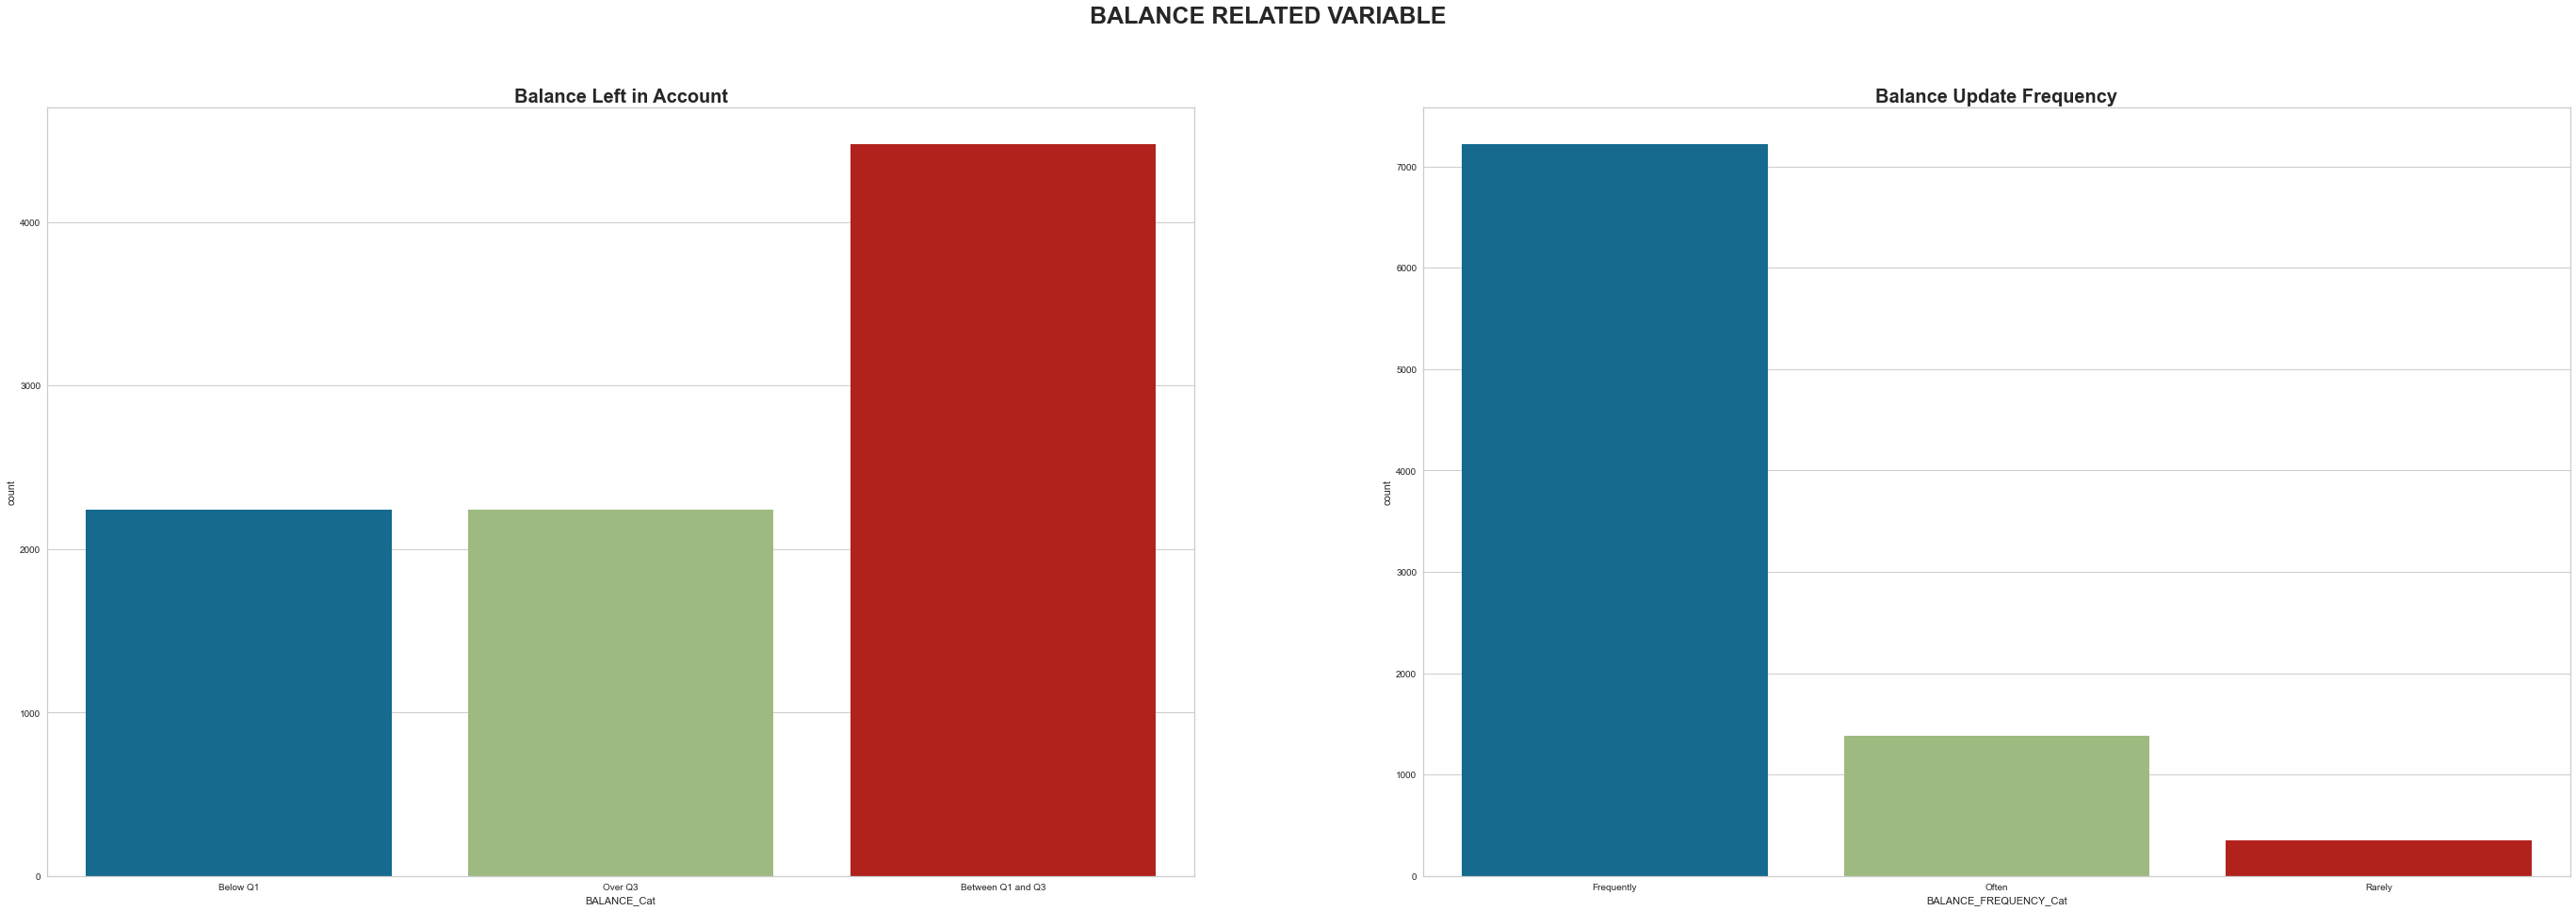

In [38]:
# Univariate Analysis
# Balance Related Variable
fig, ax = plt.subplots(1,2, figsize=(24 * 2, 15))
fig.suptitle('BALANCE RELATED VARIABLE', fontsize=25, weight='bold')

sns.countplot(x='BALANCE_Cat', data=df_temp, ax=ax[0])
ax[0].set_title('Balance Left in Account', weight='bold', fontsize=20)

sns.countplot(x='BALANCE_FREQUENCY_Cat', data=df_temp, ax=ax[1])
ax[1].set_title('Balance Update Frequency', weight='bold', fontsize=20)

plt.show()

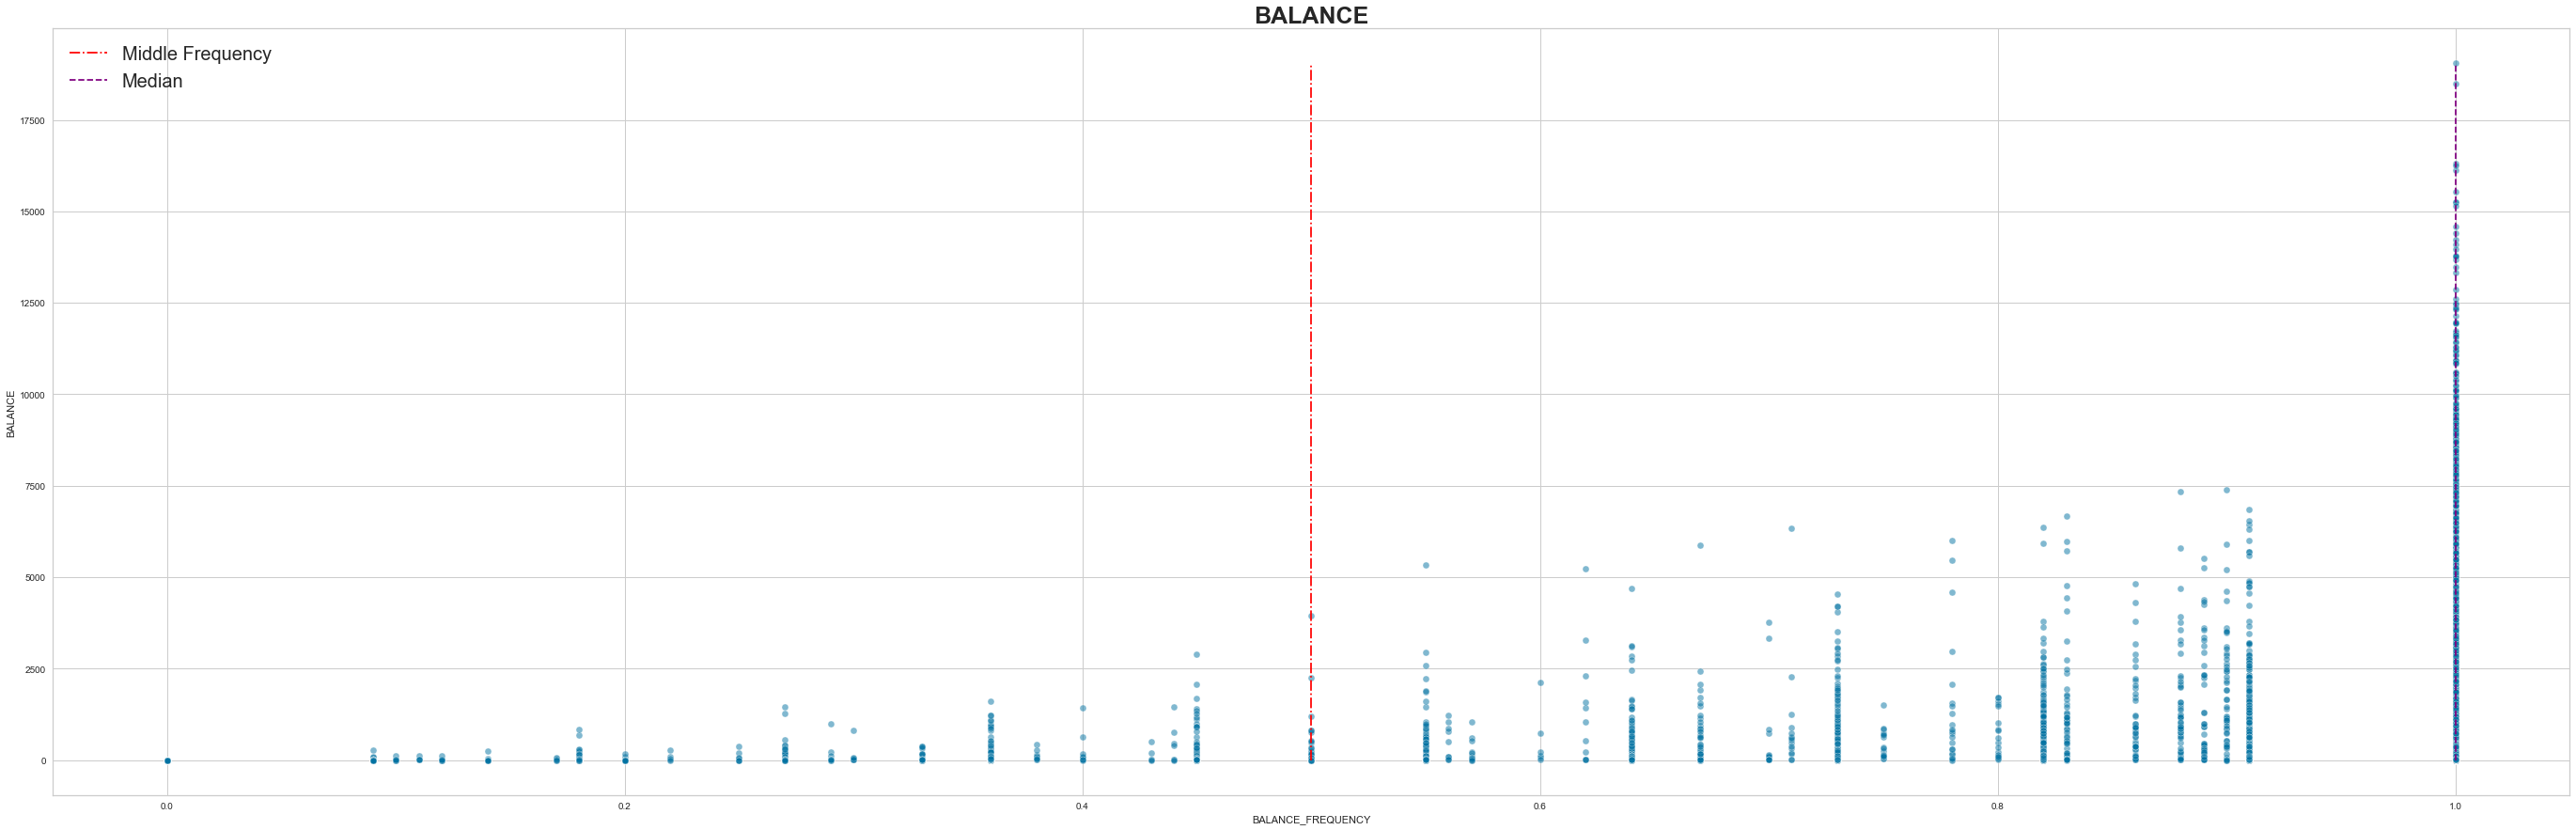

In [39]:
# Bivariate Analysis
# Balance Related Variable
plt.figure(figsize=(24 * 2, 15))
plt.title('BALANCE', weight='bold', fontsize=25)

sns.scatterplot(data=df, x='BALANCE_FREQUENCY', y='BALANCE', alpha=0.5)
plt.vlines(x=0.5, ymin=0, ymax=df['BALANCE'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['BALANCE_FREQUENCY'].quantile(0.5), ymin=0, ymax=df['BALANCE'].max(), color='purple', linestyle='dashed', label='Median')

plt.legend(fontsize=20)
plt.show()

**Univariate Analysis**
- From graph on the left We can see that majority of the customer has balance in their account around $128.88 to $2054.14, also there are equal amount of customer with balance less than $128.88 and greater than $2054.14.
- From graph on the rigth we can see that the balance in the account is frequently updated, this could mean that customer is actively made transactions.

**Bivariate Analysis**
- If We take a quick look, We can see that there are more plots on the right of the red line than to the left. This confirmed by the `Median` lines that is positioned on the far right.
- This tells us that most customer actively use their account for transactions hence frequent update made to their account balance.
- I can assume customer with low balance (< $2500) and has low balance frequency (< 0.3) are not our active customer or in other words they do not use our service as their main choice.

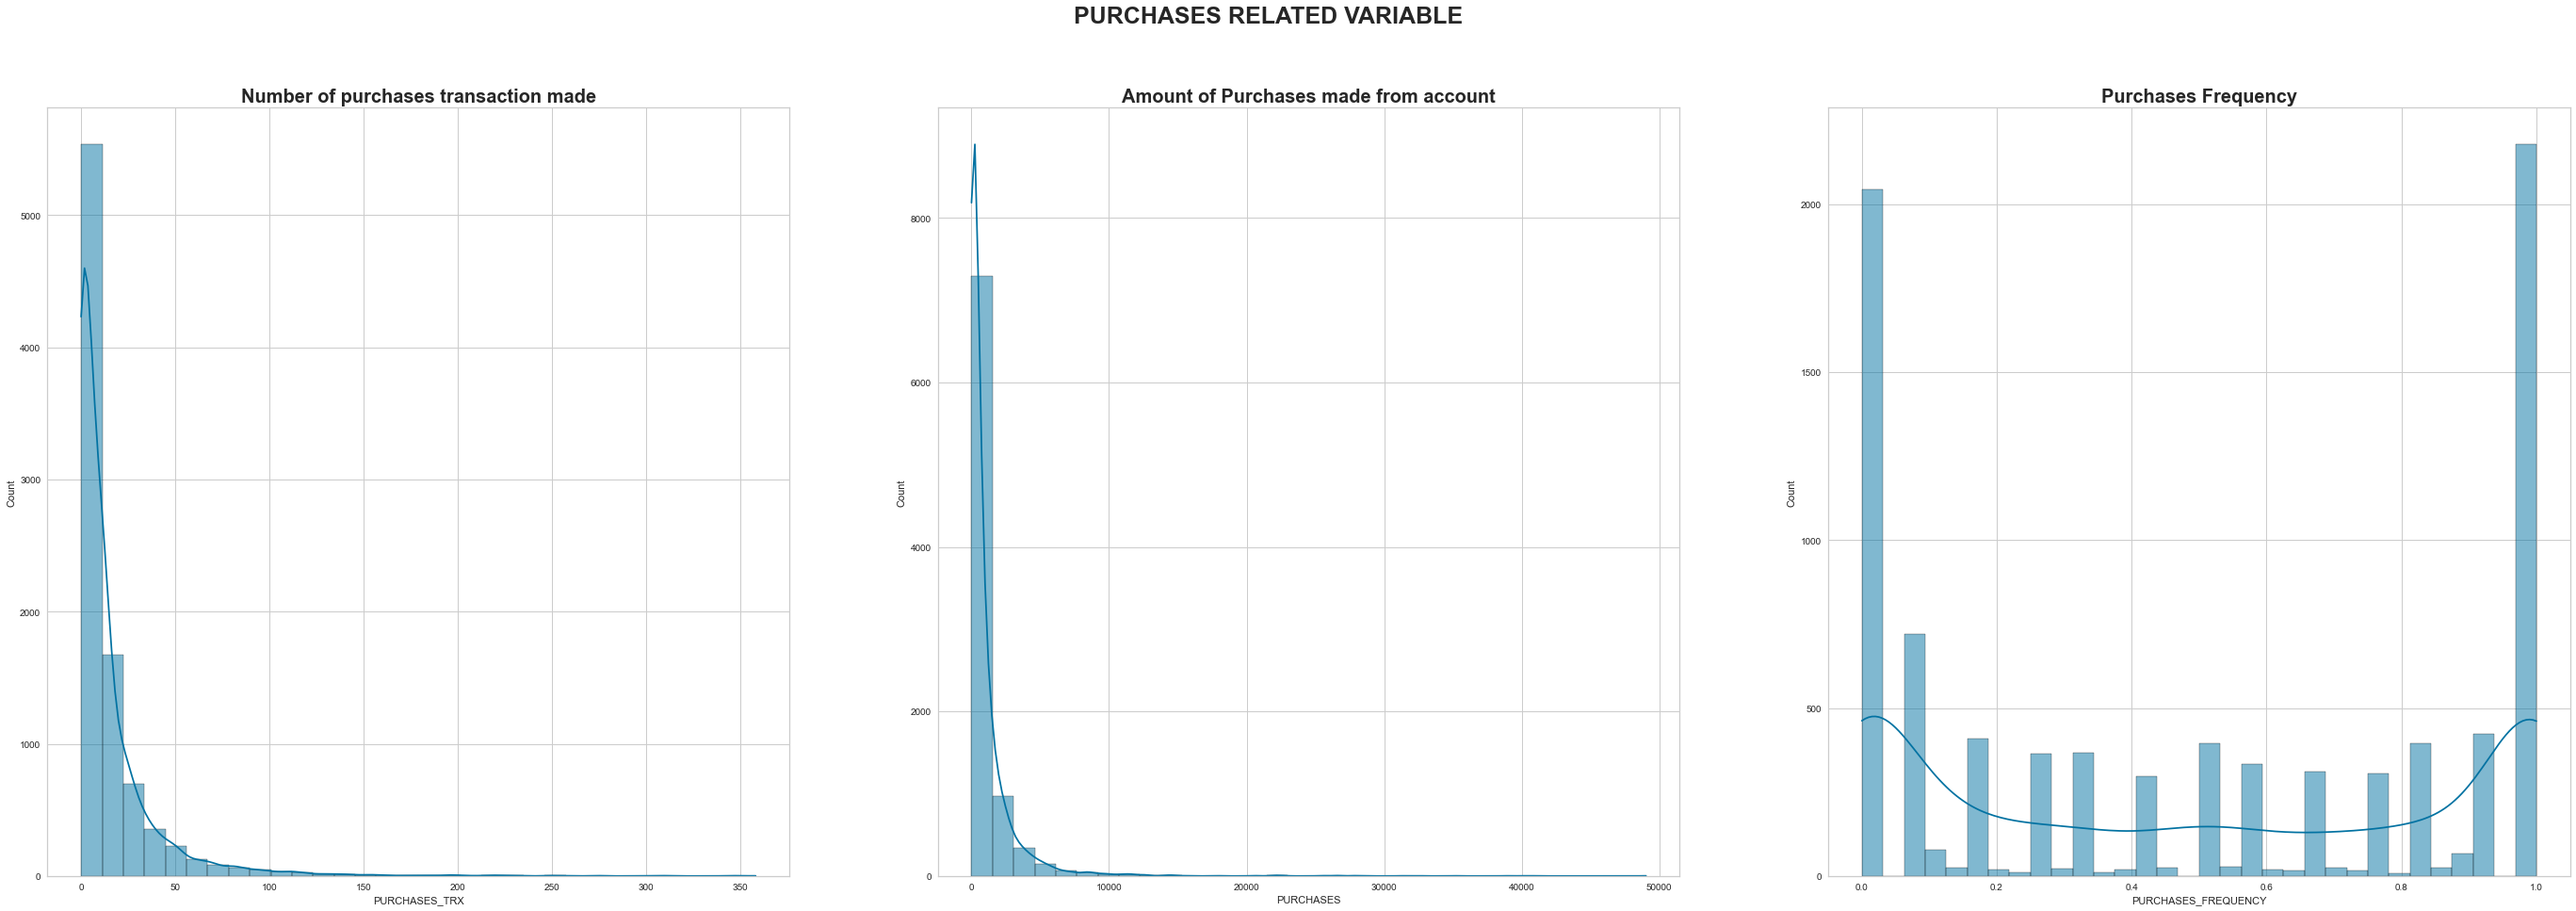

In [40]:
# Univariate Analysis
fig, ax = plt.subplots(1,3, figsize=(24 * 2, 15))
fig.suptitle('PURCHASES RELATED VARIABLE', fontsize=25, weight='bold')
bins= 32

sns.histplot(df.PURCHASES_TRX, kde=True, ax=ax[0], bins=bins)
ax[0].set_title('Number of purchases transaction made', weight='bold', fontsize=20)

sns.histplot(df.PURCHASES, kde=True, ax=ax[1], bins=bins)
ax[1].set_title('Amount of Purchases made from account', weight='bold', fontsize=20)

sns.histplot(df.PURCHASES_FREQUENCY, kde=True, ax=ax[2], bins=bins)
ax[2].set_title('Purchases Frequency', weight='bold', fontsize=20)

plt.show()

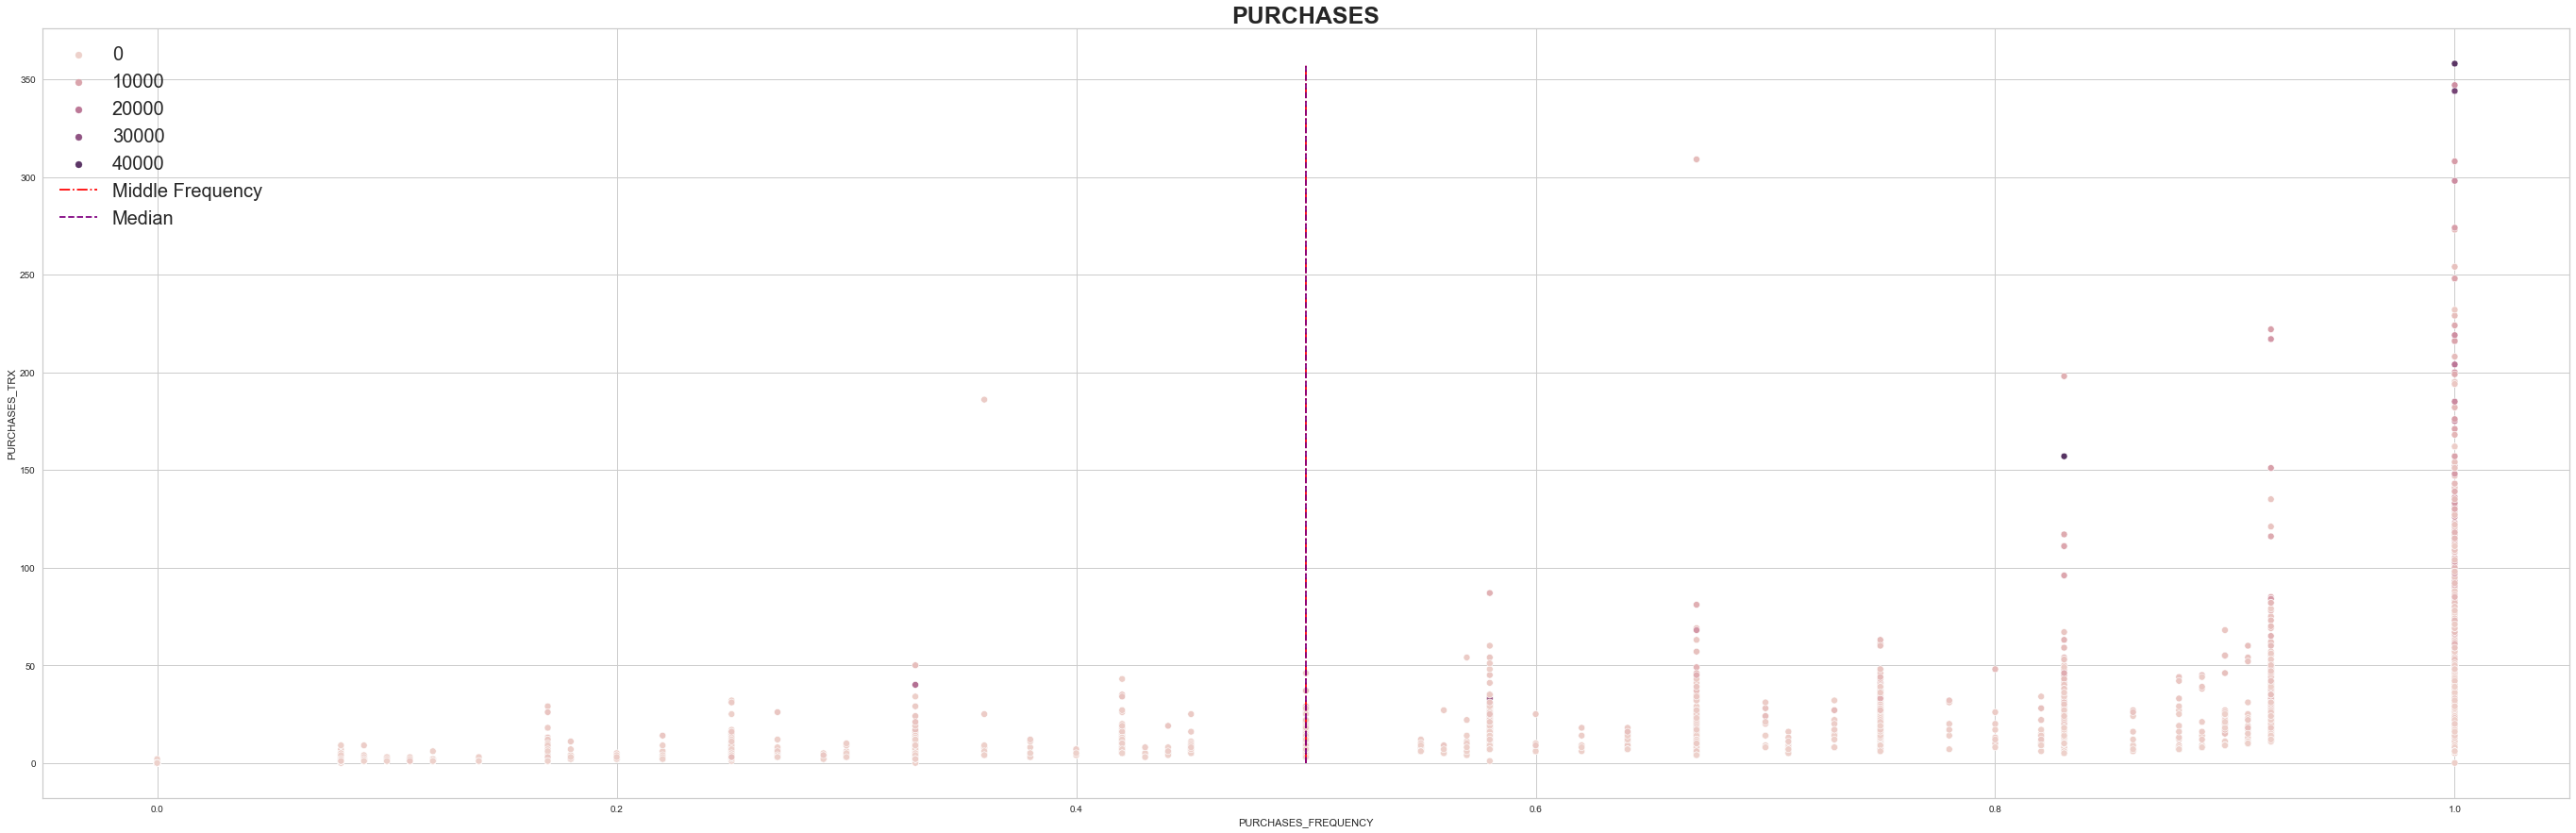

In [41]:
# Bivariate Analysis
plt.figure(figsize=(24 * 2, 15))
plt.title('PURCHASES', weight='bold', fontsize=25)

sns.scatterplot(data=df, x='PURCHASES_FREQUENCY', y='PURCHASES_TRX', hue='PURCHASES')
plt.vlines(x=0.5, ymin=0, ymax=df['PURCHASES_TRX'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['PURCHASES_FREQUENCY'].quantile(0.5), ymin=0, ymax=df['PURCHASES_TRX'].max(), color='purple', linestyle='dashed', label='Median')

plt.legend(fontsize=20)
plt.show()

**Univariate Analysis**
- From the graph in the left We can see that `PURCHASES_TRX` is extremely skewed to the right. We can see that the majority of people made purchase transaction below 50 times and there are handful of people who made purchase transaction above 50 times.
- From the graph in the middle We can see that `PURCHASES` is extremely skewed to the right. We can see that the majority of people made purchase below $500 and there are handful of people who made purchase above $500.
- From the graph in the right We can see that `Purchase Frequency` is simmetrically distributed

**Bivariate Analysis**
- If We take a quick look, We can see that the plots are equally distributed between the left and right side. This confirmed by the `Median` lines that is positioned on the middle.
- We can see the amount of purchases made through the color of the plot, the darker it gets the more purchases made.
- We can see that as the `PURCHASE_FREQUENCY` gets higher, We will found customer that made higher `PURCHASES_TRX` and made higher `PURCHASES` amount.

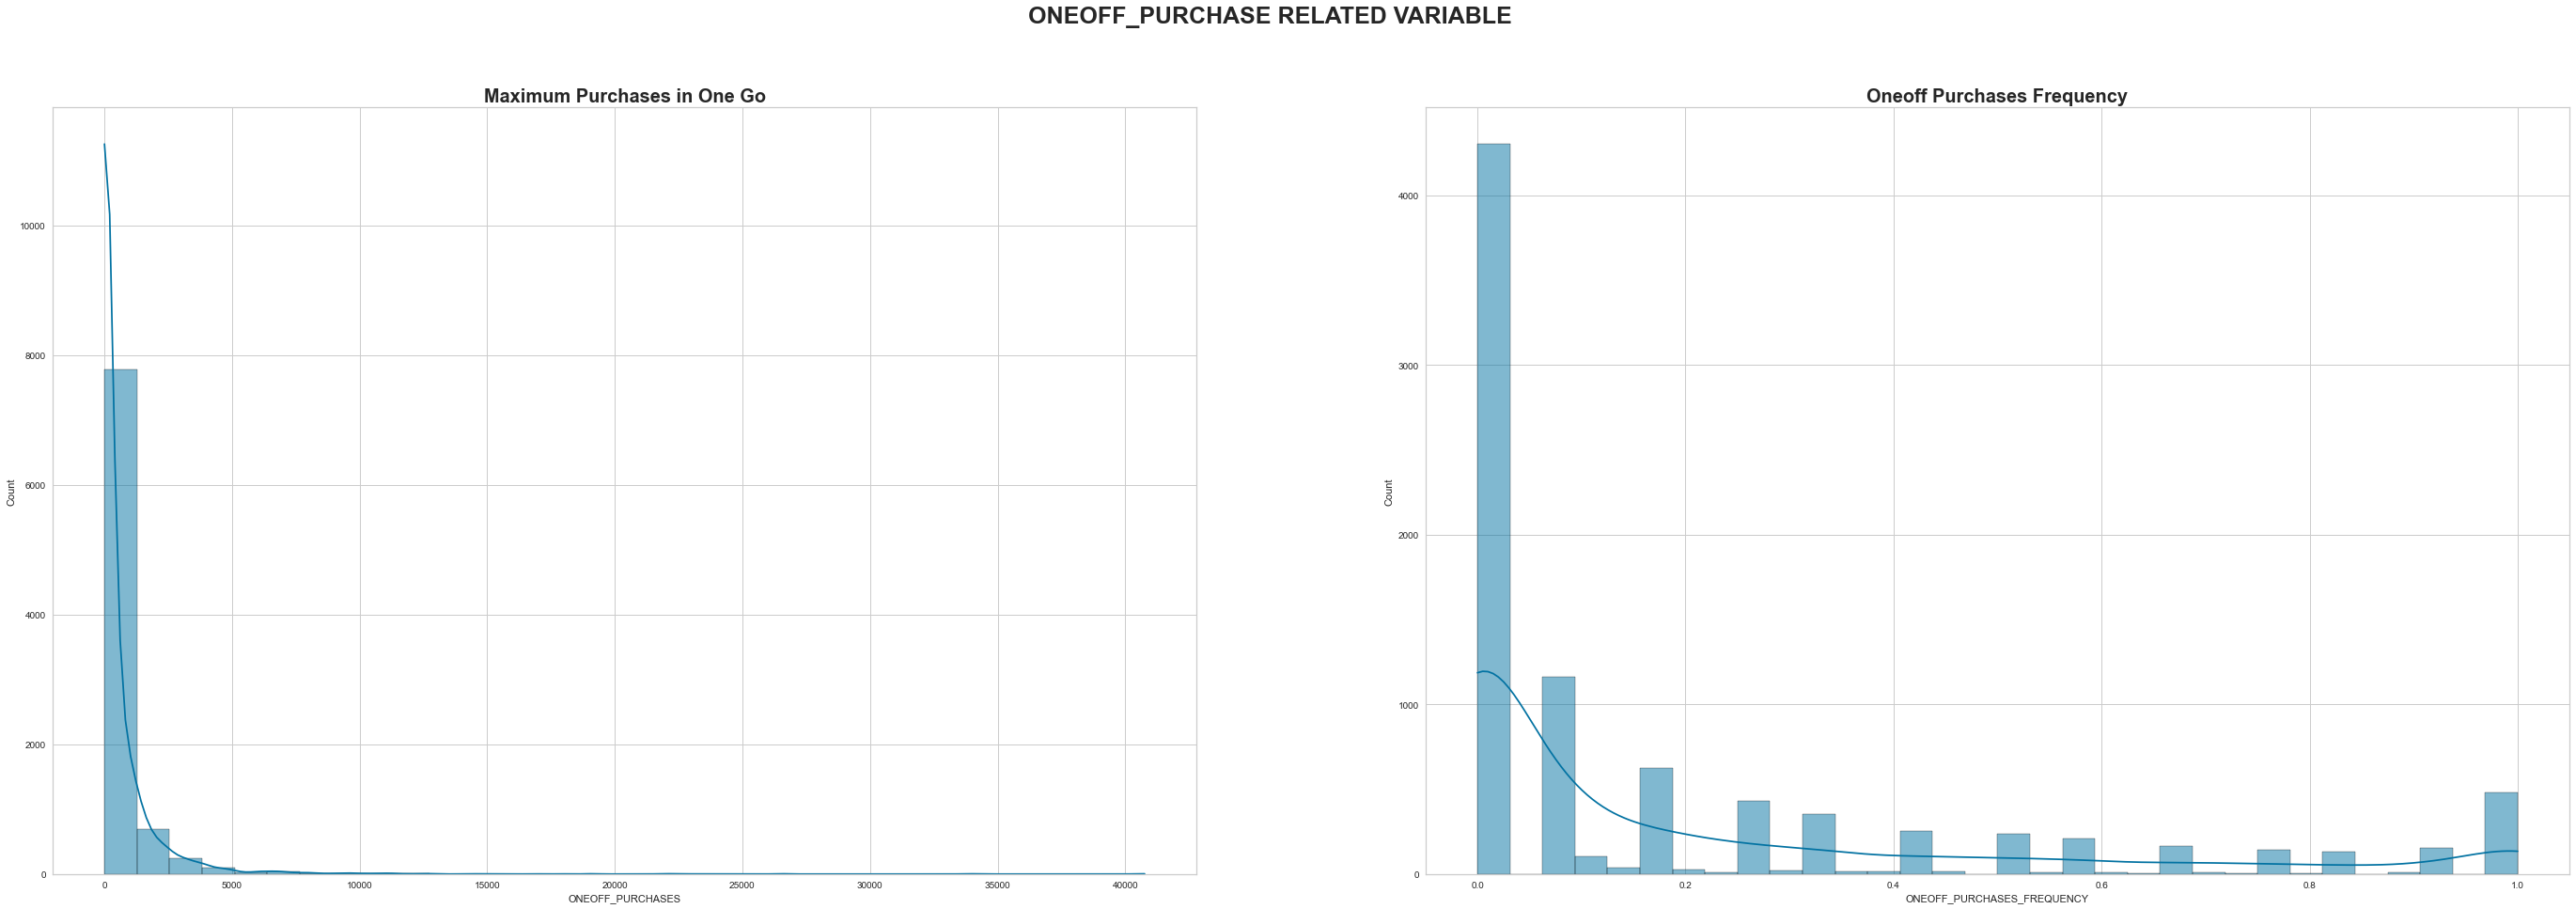

In [42]:
# Univariate Analysis
fig, ax = plt.subplots(1,2, figsize=(24 * 2, 15))
fig.suptitle('ONEOFF_PURCHASE RELATED VARIABLE', fontsize=25, weight='bold')
bins= 32

sns.histplot(df.ONEOFF_PURCHASES, kde=True, ax=ax[0], bins=bins)
ax[0].set_title('Maximum Purchases in One Go', weight='bold', fontsize=20)

sns.histplot(df.ONEOFF_PURCHASES_FREQUENCY, kde=True, ax=ax[1], bins=bins)
ax[1].set_title('Oneoff Purchases Frequency', weight='bold', fontsize=20)

plt.show()

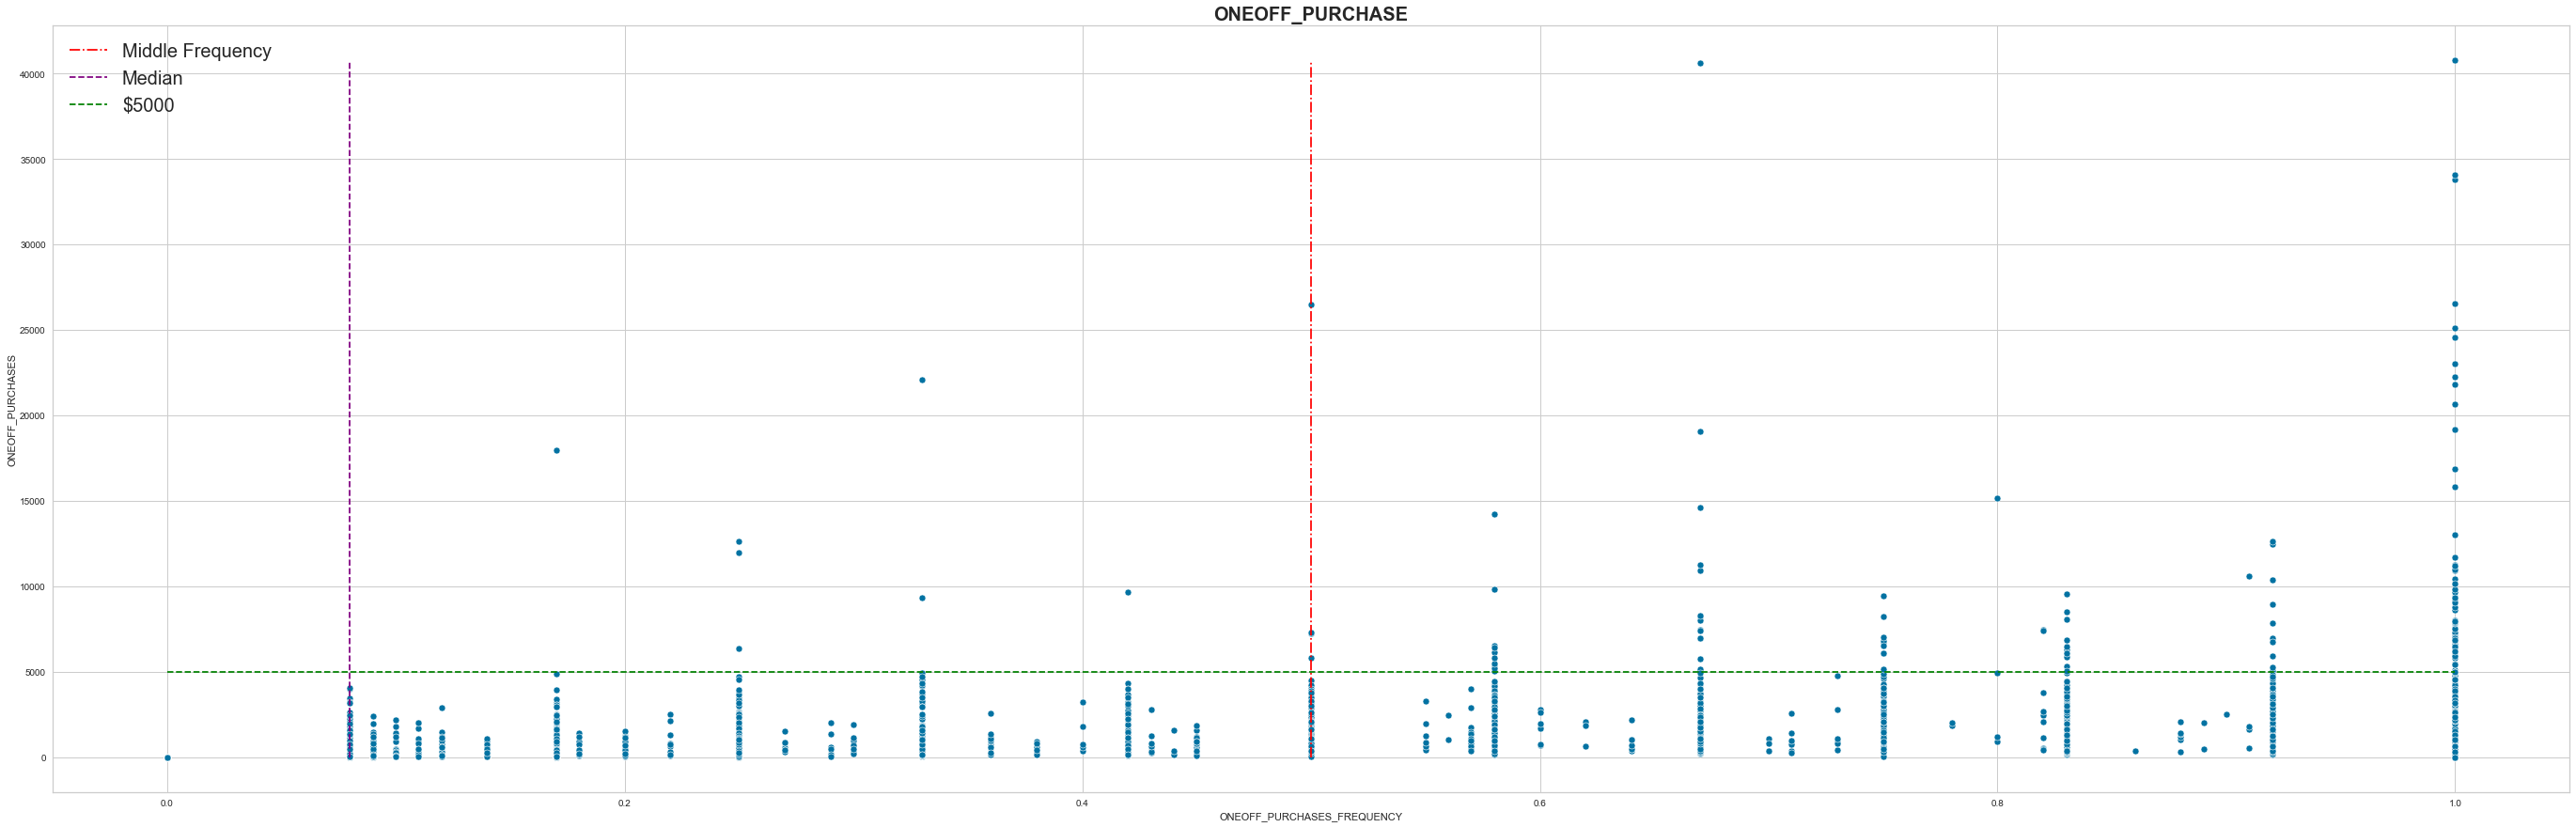

In [43]:
# Bivariate Analysis
plt.figure(figsize=(24 * 2, 15))
plt.title('ONEOFF_PURCHASE', weight='bold', fontsize=20)

sns.scatterplot(data=df, x='ONEOFF_PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES')
plt.vlines(x=0.5, ymin=0, ymax=df['ONEOFF_PURCHASES'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['ONEOFF_PURCHASES_FREQUENCY'].quantile(0.5), ymin=0, ymax=df['ONEOFF_PURCHASES'].max(), color='purple', linestyle='dashed', label='Median')
plt.hlines(xmin=0, xmax=df['ONEOFF_PURCHASES_FREQUENCY'].max(), y=5000, color='green', linestyle='dashed', label='$5000')

plt.legend(fontsize=20)
plt.show()

**Univariate Analysis**
- From graph on the left We can see that the `ONEOFF_PURCHASES` is extremely skewed to the right. We can see that the majority of people made oneoff_purchase transaction below $2500 and there are handful of people who made oneoff_purchase transaction above $2500.
- From graph on the right We can see that the `ONEOFF_PURCHASES_FREQUENCY` is extremely skewed to the right. This means most customer seldomly made purchases by `ONEOFF_PURCHASES`

**Bivariate Analysis**
- If We take a quick look, in my opinion the `ONEOFF_PURCHASES` is almost evenly spread out, but if wee look at where `Median` line situated, I can say that most customer rarely used `ONEOFF_PURCHASES` service.
- We can see that majority of transaction made is below $5000 and there are handful of people who made purchase with `ONEOFF_PURCHASES` above $5000.


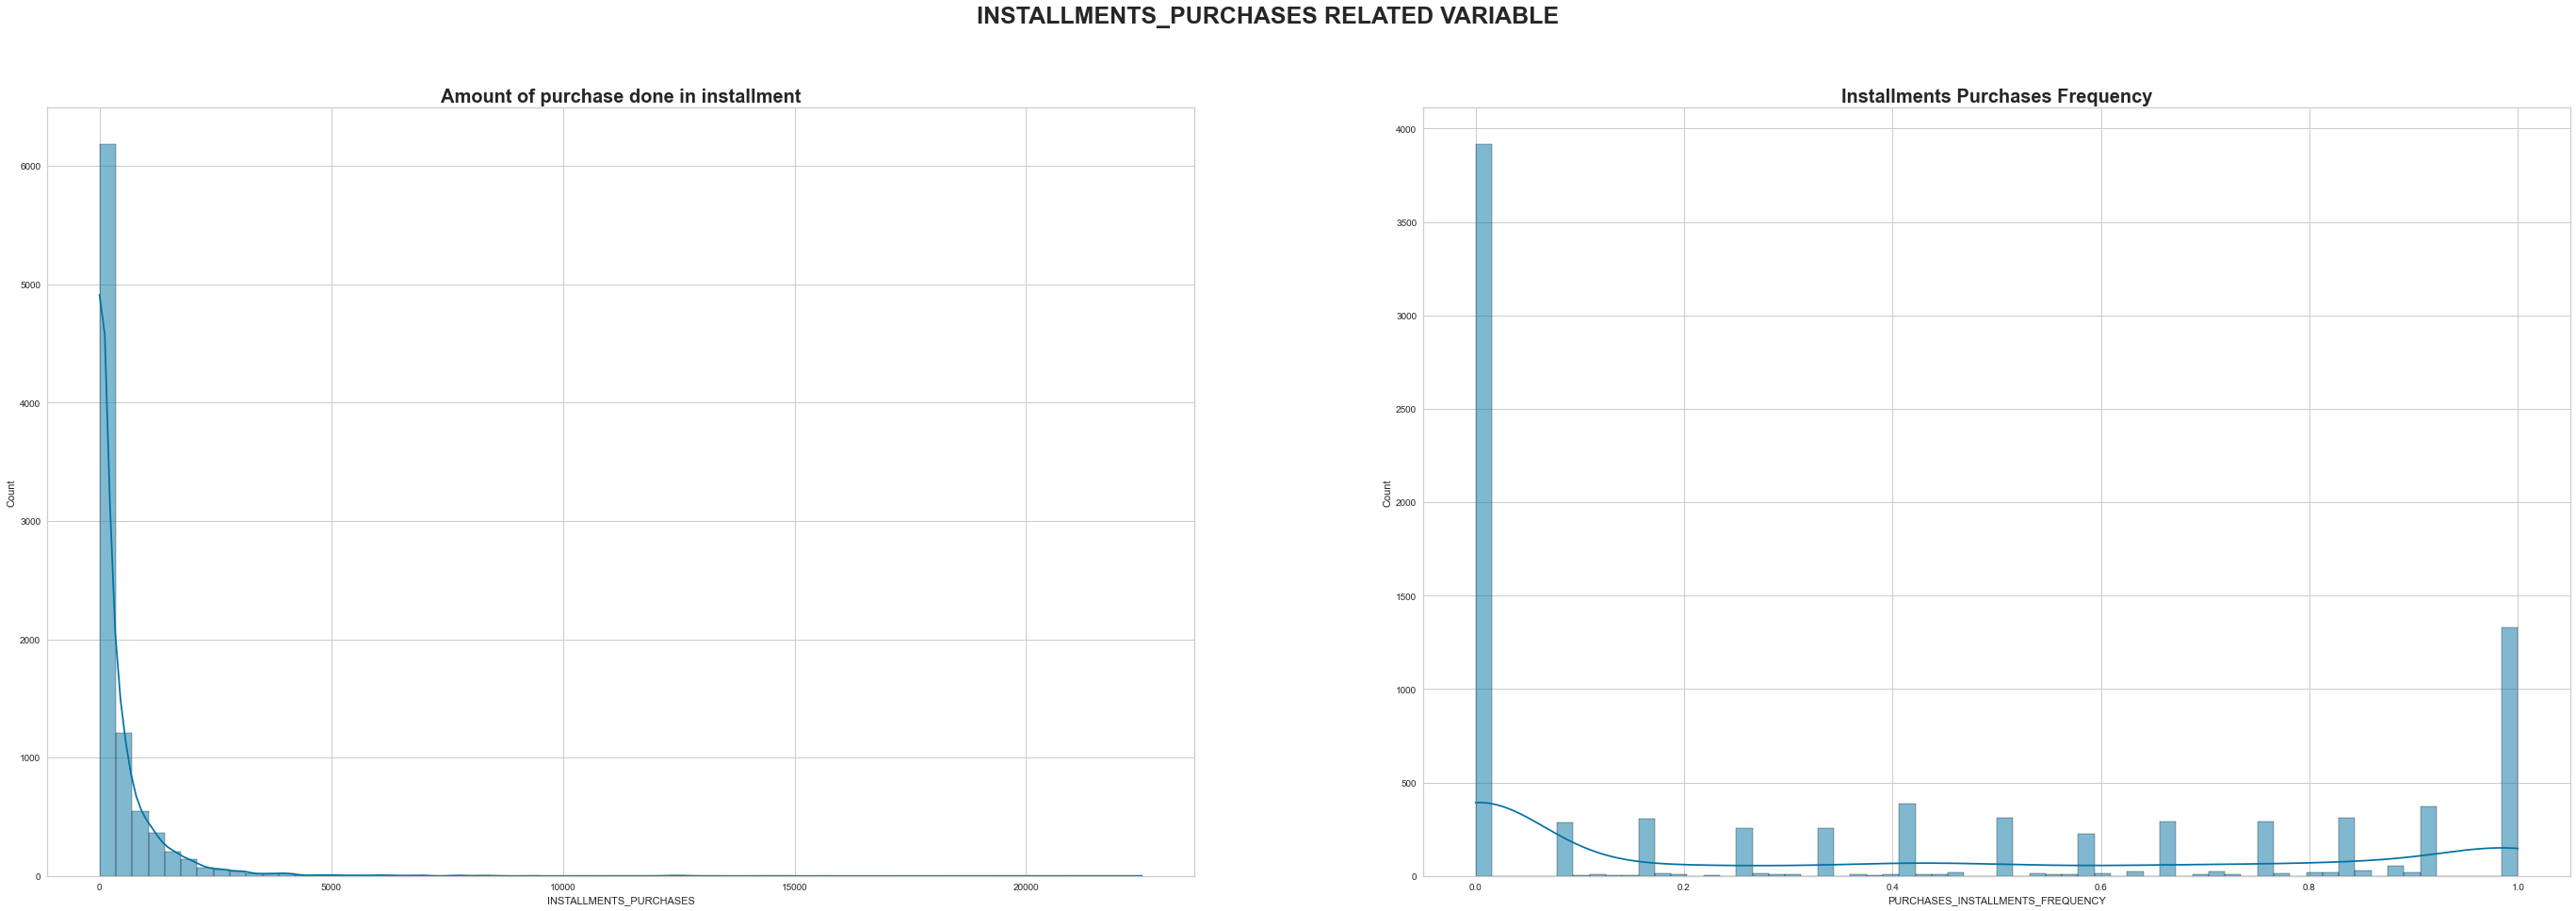

In [44]:
# Univariate Analysis
fig, ax = plt.subplots(1,2, figsize=(24 * 2, 15))
fig.suptitle('INSTALLMENTS_PURCHASES RELATED VARIABLE', fontsize=25, weight='bold')
bins= 64

sns.histplot(df.INSTALLMENTS_PURCHASES, kde=True, ax=ax[0], bins=bins)
ax[0].set_title('Amount of purchase done in installment', weight='bold', fontsize=20)

sns.histplot(df.PURCHASES_INSTALLMENTS_FREQUENCY, kde=True, ax=ax[1], bins=bins)
ax[1].set_title('Installments Purchases Frequency', weight='bold', fontsize=20)

plt.show()

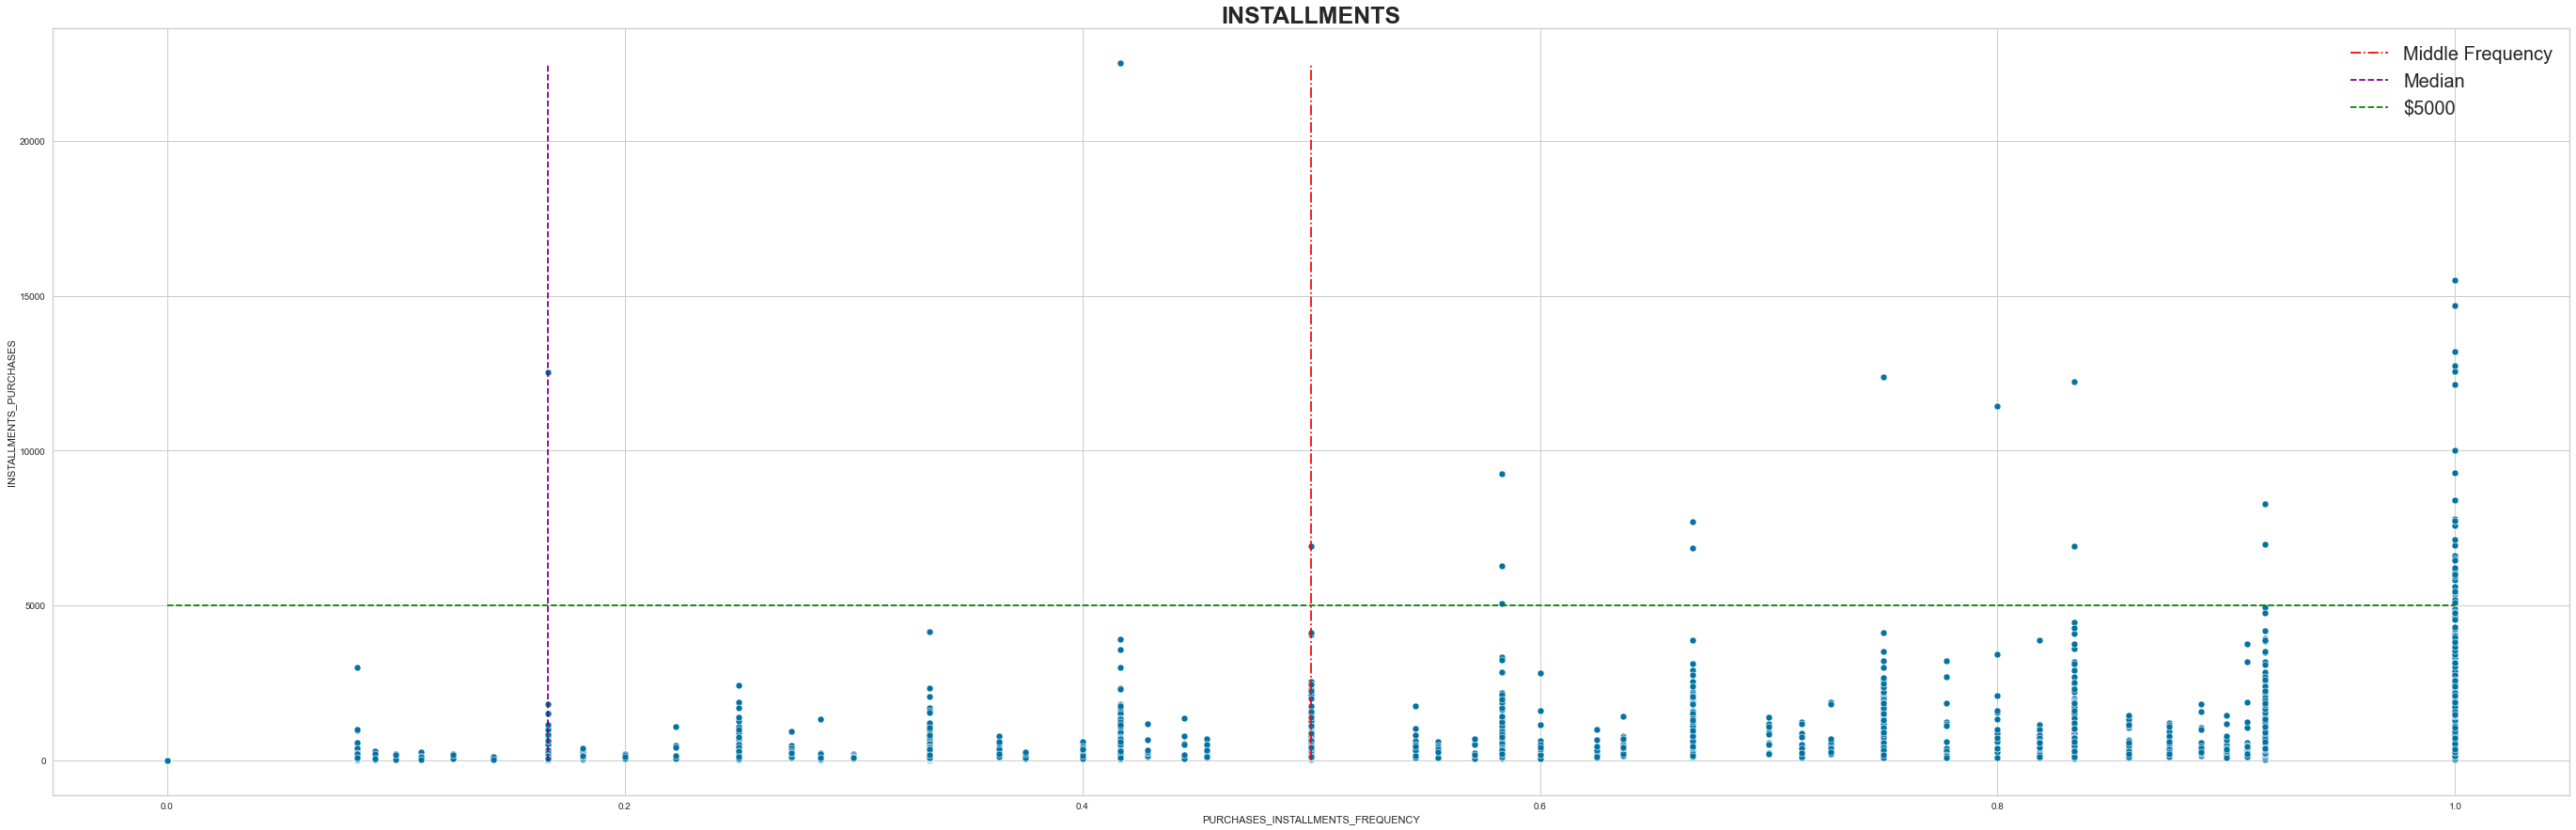

In [45]:
# Bivariate Analysis
plt.figure(figsize=(24 * 2, 15))
plt.title('INSTALLMENTS', weight='bold', fontsize=25)

sns.scatterplot(data=df, x='PURCHASES_INSTALLMENTS_FREQUENCY', y='INSTALLMENTS_PURCHASES')
plt.vlines(x=0.5, ymin=0, ymax=df['INSTALLMENTS_PURCHASES'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['PURCHASES_INSTALLMENTS_FREQUENCY'].quantile(0.5), ymin=0, ymax=df['INSTALLMENTS_PURCHASES'].max(), color='purple', linestyle='dashed', label='Median')
plt.hlines(xmin=0, xmax=df['ONEOFF_PURCHASES_FREQUENCY'].max(), y=5000, color='green', linestyle='dashed', label='$5000')

plt.legend(fontsize=20)
plt.show()

**Univariate Analysis**
- From graph on the left We can see that the `INSTALLMENTS_PURCHASES` is extremely skewed to the right. We can see that the majority of people who made purchases through `INSTALLMENTS_PURCHASES` are purchases that cost less than $2500 and there are handful of people who made purchase above $2500.
- From graph on the right We can see that the `PURCHASES_INSTALLMENTS_FREQUENCY` is extremely skewed to the right. This means most customer seldomly made purchases using `INSTALLMENTS_PURCHASES`

**Bivariate Analysis**
- If we take a quick look, We can see that more plot is scattered to the right of `Middle Frequency`, but if We look at where `Median` line situtated, I can say that most customer rarely used `INSTALLMENTS_PURCHASES` service.
- We can see that majority of transaction made is below $5000 and there are handful of people who made purchase above $5000.

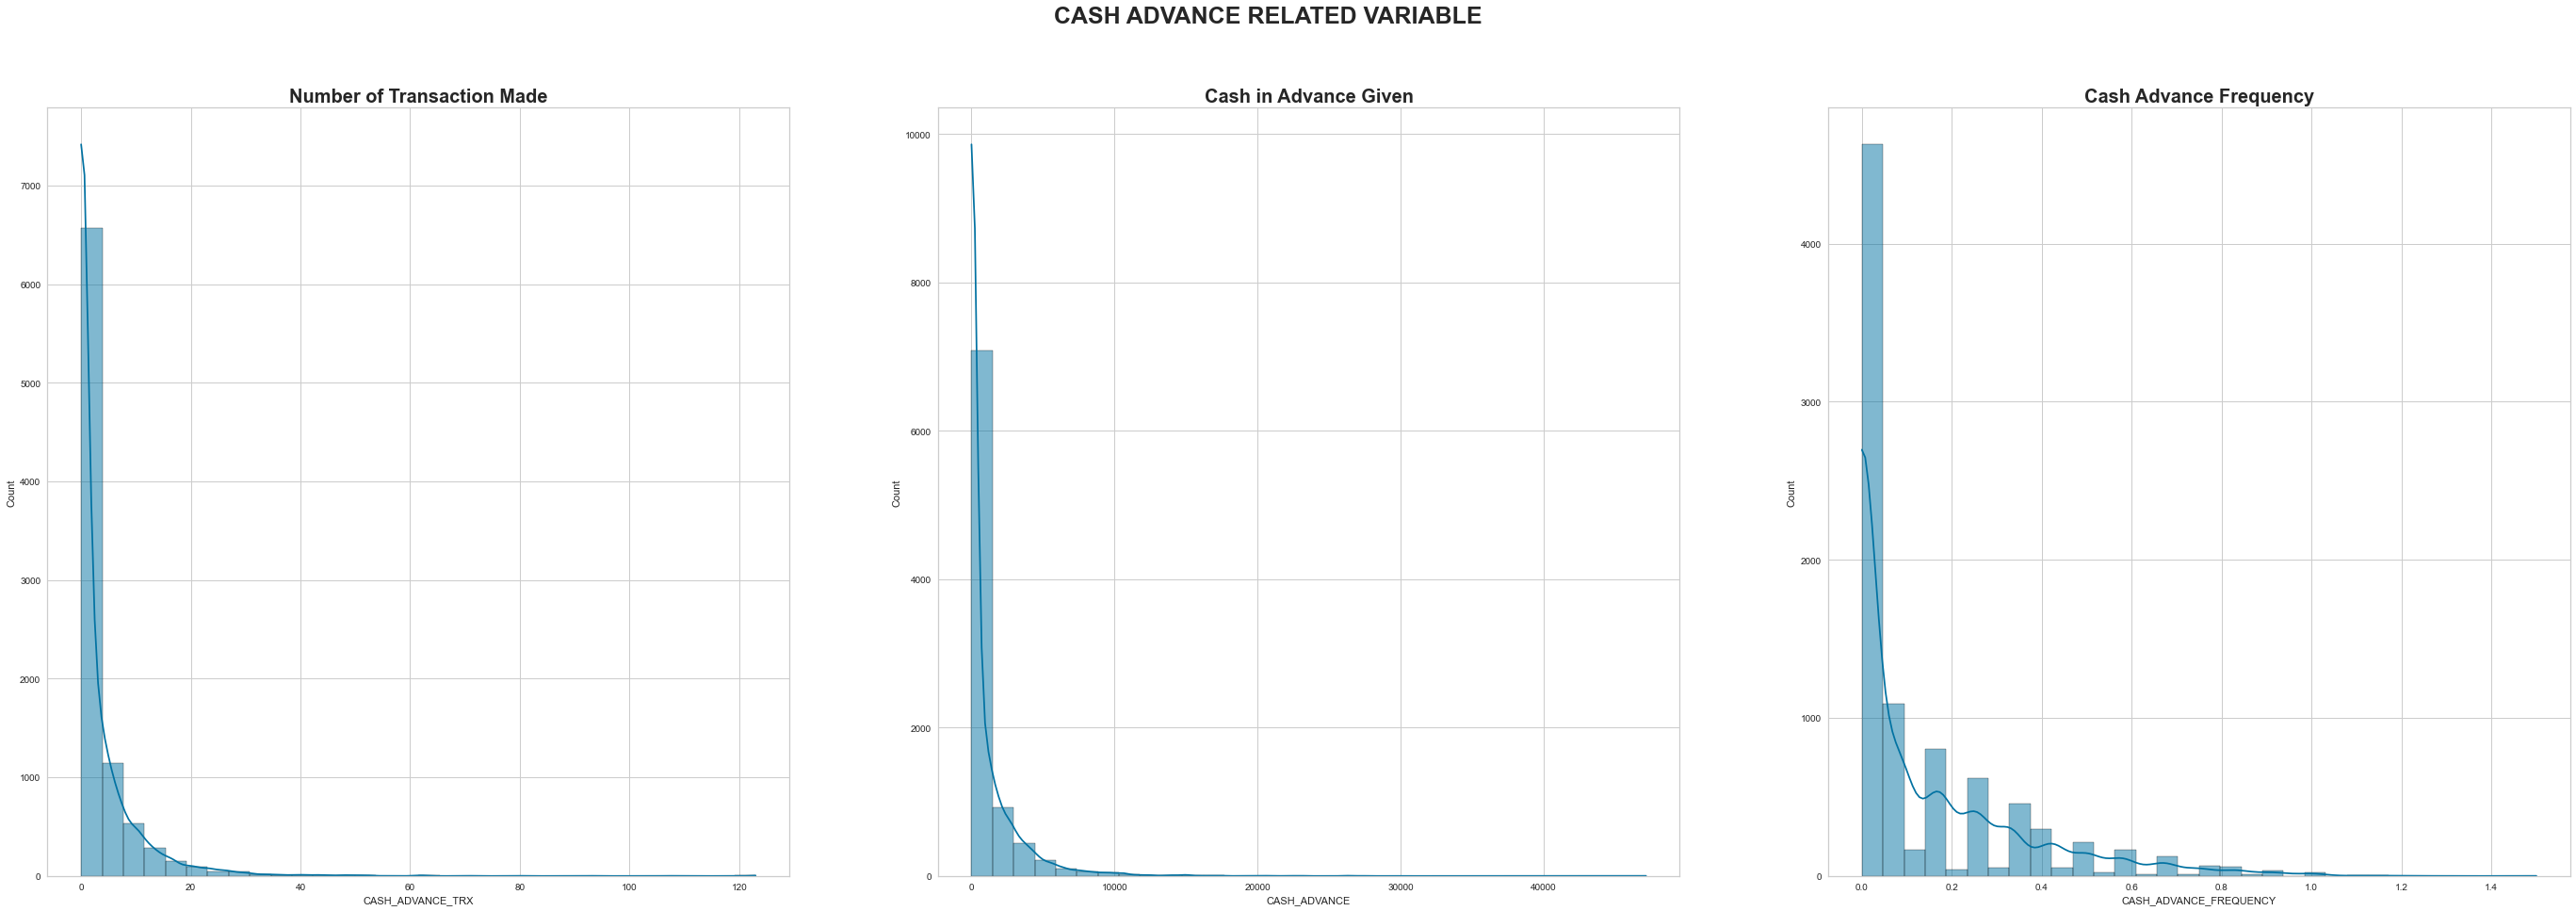

In [46]:
# Univariate Analysis
fig, ax = plt.subplots(1,3, figsize=(24 * 2, 15))
fig.suptitle('CASH ADVANCE RELATED VARIABLE', fontsize=25, weight='bold')
bins= 32

sns.histplot(df.CASH_ADVANCE_TRX, kde=True, ax=ax[0], bins=bins)
ax[0].set_title('Number of Transaction Made', weight='bold', fontsize=20)

sns.histplot(df.CASH_ADVANCE, kde=True, ax=ax[1], bins=bins)
ax[1].set_title('Cash in Advance Given', weight='bold', fontsize=20)

sns.histplot(df.CASH_ADVANCE_FREQUENCY, kde=True, ax=ax[2], bins=bins)
ax[2].set_title('Cash Advance Frequency', weight='bold', fontsize=20)

plt.show()

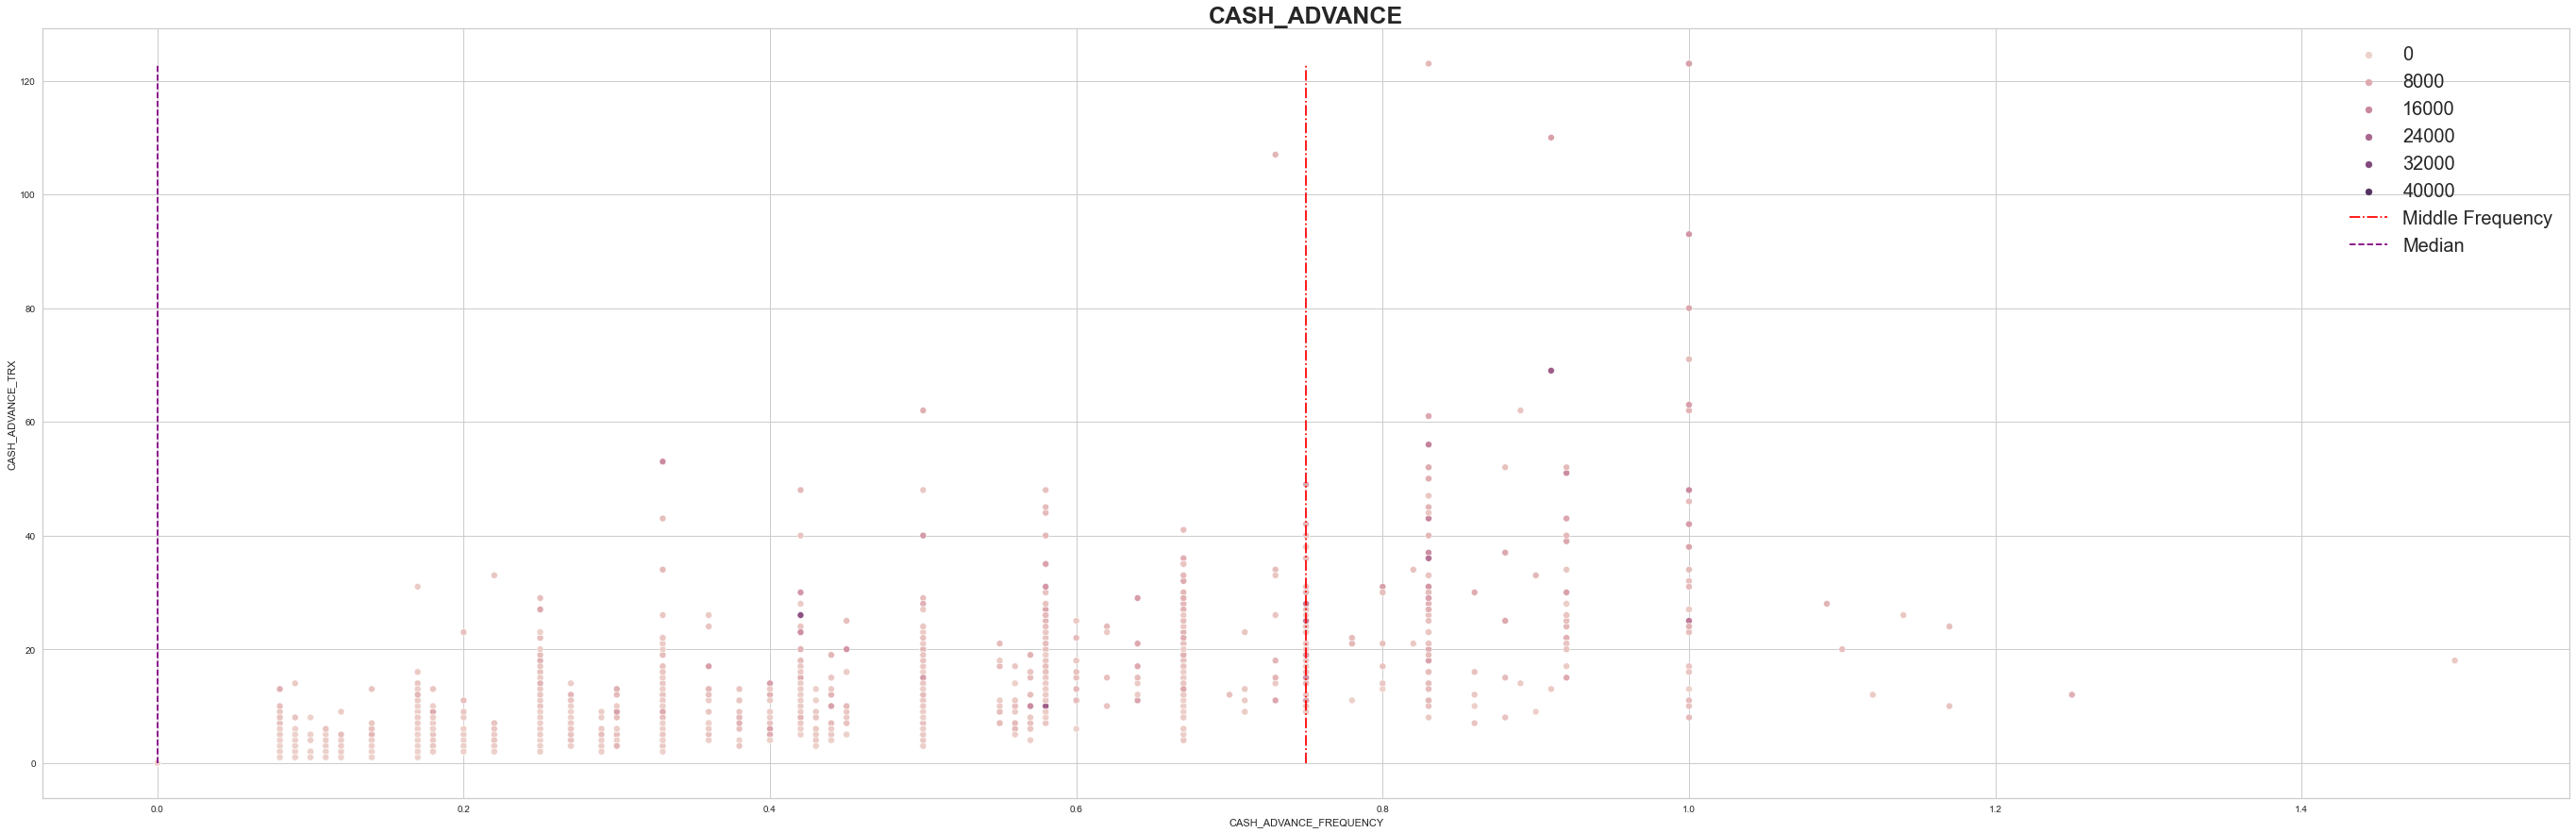

In [47]:
# Bivariate Analysis
plt.figure(figsize=(24 * 2, 15))
plt.title('CASH_ADVANCE', weight='bold', fontsize=25)

sns.scatterplot(data=df, x='CASH_ADVANCE_FREQUENCY', y='CASH_ADVANCE_TRX', hue='CASH_ADVANCE')
plt.vlines(x=0.75, ymin=0, ymax=df['CASH_ADVANCE_TRX'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['CASH_ADVANCE_FREQUENCY'].quantile(0.5), ymin=0, ymax=df['CASH_ADVANCE_TRX'].max(), color='purple', linestyle='dashed', label='Median')

plt.legend(fontsize=20)
plt.show()

**Univariate Analysis**
- From the graph on the left We can see that the `CASH_ADVANCE_TRX` is extremely skewed to the right. This means there is not much customer uses `CASH_ADVANCE` service.
- From the graph on the middle We can see that the `CASH_ADVANCE` is extremely skewed to the right. This means most customer that use `CASH_ADVANCE` is borrowing money that is less than $5000, but there are also handful of people who borrowed money above $5000.
- From the graph on the right We can see that the `CASH_ADVANCE_FREQUENCY` is extremely skewed to the right. This means most customer seldomly using `CASH_ADVANCE` service

**Bivariate Analysis**
- If we take a quick look, we can see that the frequency is spanning from 0 to 1.5, with middle-frequency value in 0.75.
- I am not sure yet why there are frequency that is higher than 1, but since there is no explanation that limit the value, I guess I'll left them be.
- We can see that the majority of plot is on the left of the red line, which means most customer rarely use `CASH_ADVANCE` service. This also confirmed by the `Median` lines that is positioned on the far left.

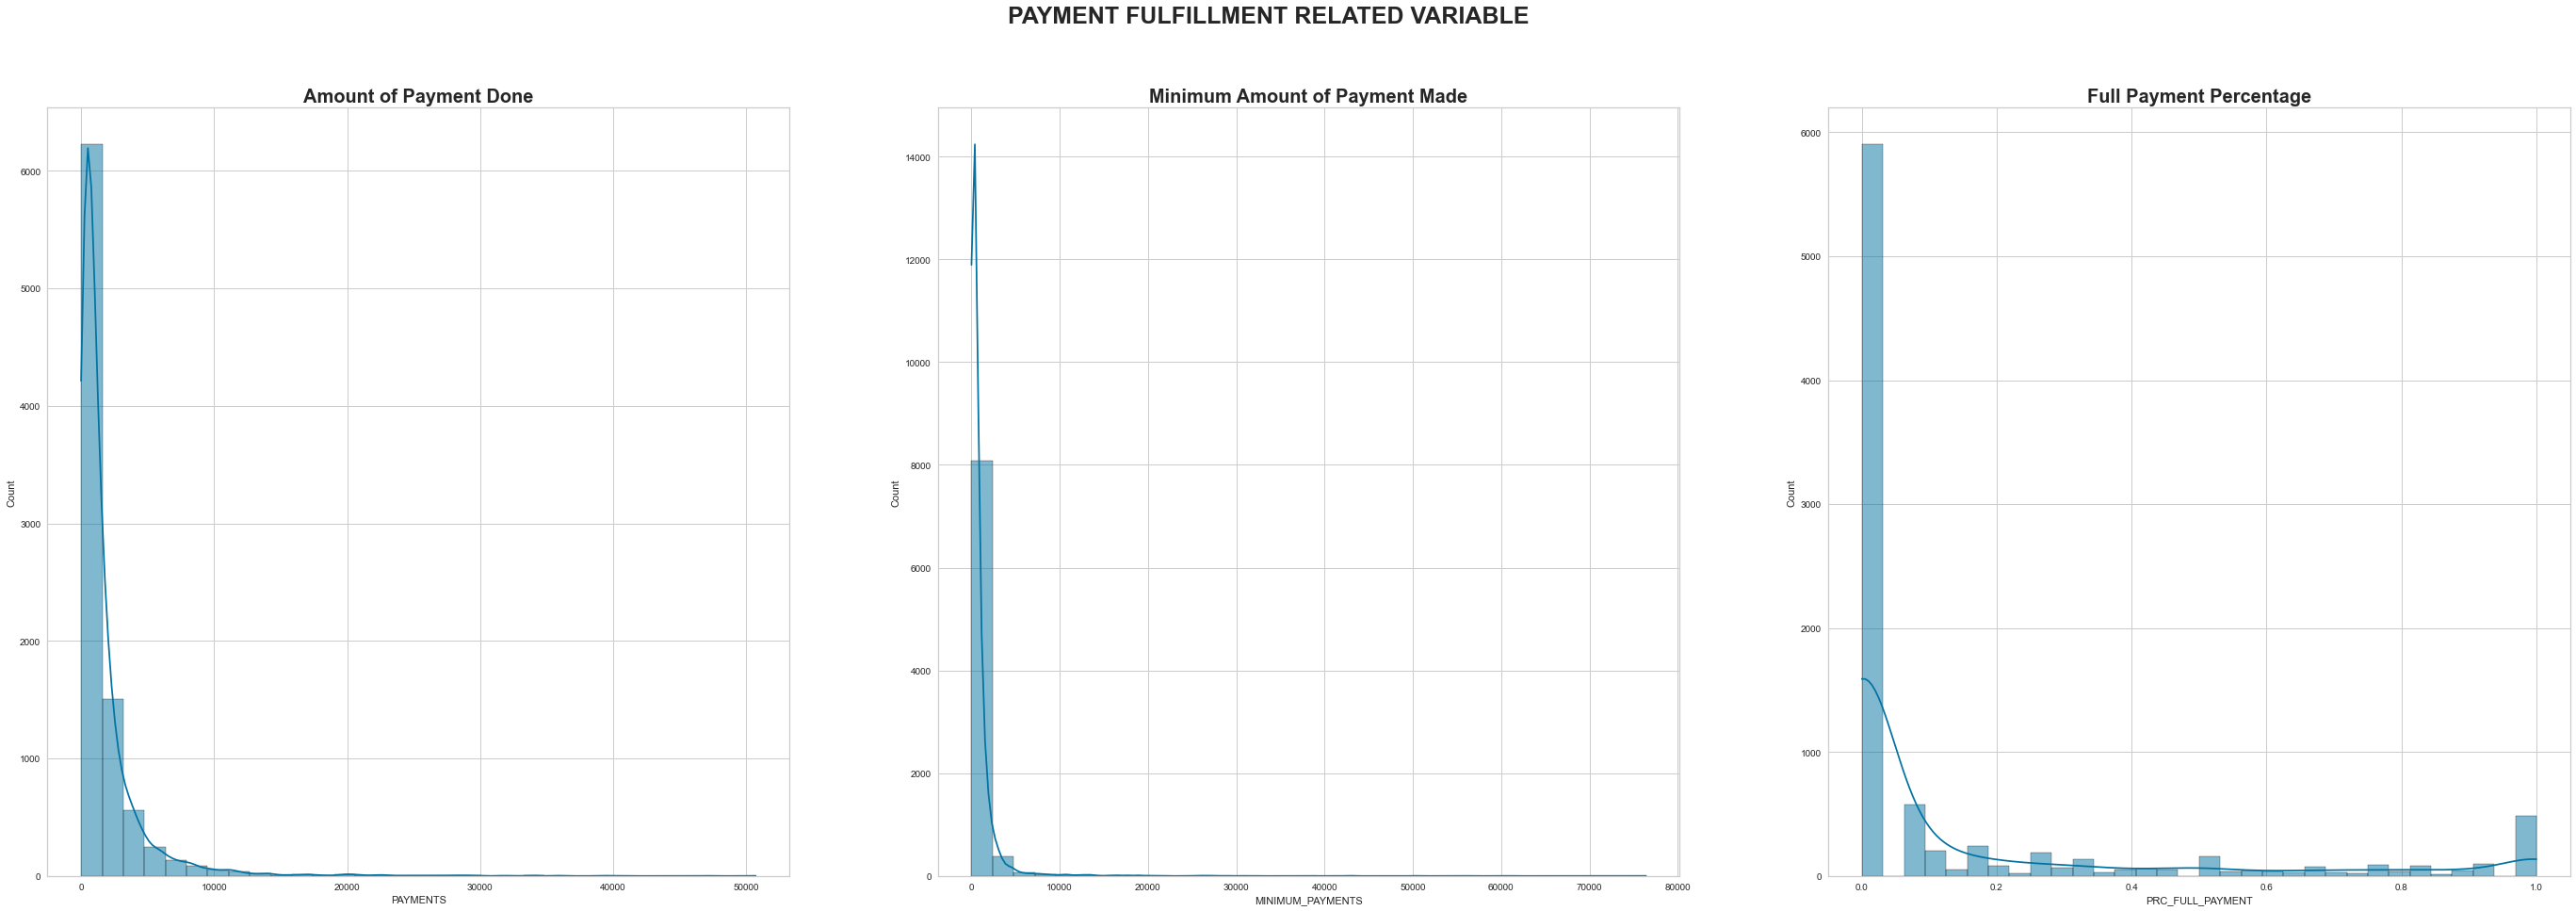

In [48]:
# Univariate Analysis
fig, ax = plt.subplots(1,3, figsize=(24 * 2, 15))
fig.suptitle('PAYMENT FULFILLMENT RELATED VARIABLE', fontsize=25, weight='bold')
bins= 32

sns.histplot(df.PAYMENTS, kde=True, ax=ax[0], bins=bins)
ax[0].set_title('Amount of Payment Done', weight='bold', fontsize=20)

sns.histplot(df.MINIMUM_PAYMENTS, kde=True, ax=ax[1] , bins=bins)
ax[1].set_title('Minimum Amount of Payment Made', weight='bold', fontsize=20)

sns.histplot(df.PRC_FULL_PAYMENT, kde=True, ax=ax[2] , bins=bins)
ax[2].set_title('Full Payment Percentage', weight='bold', fontsize=20)

plt.show()

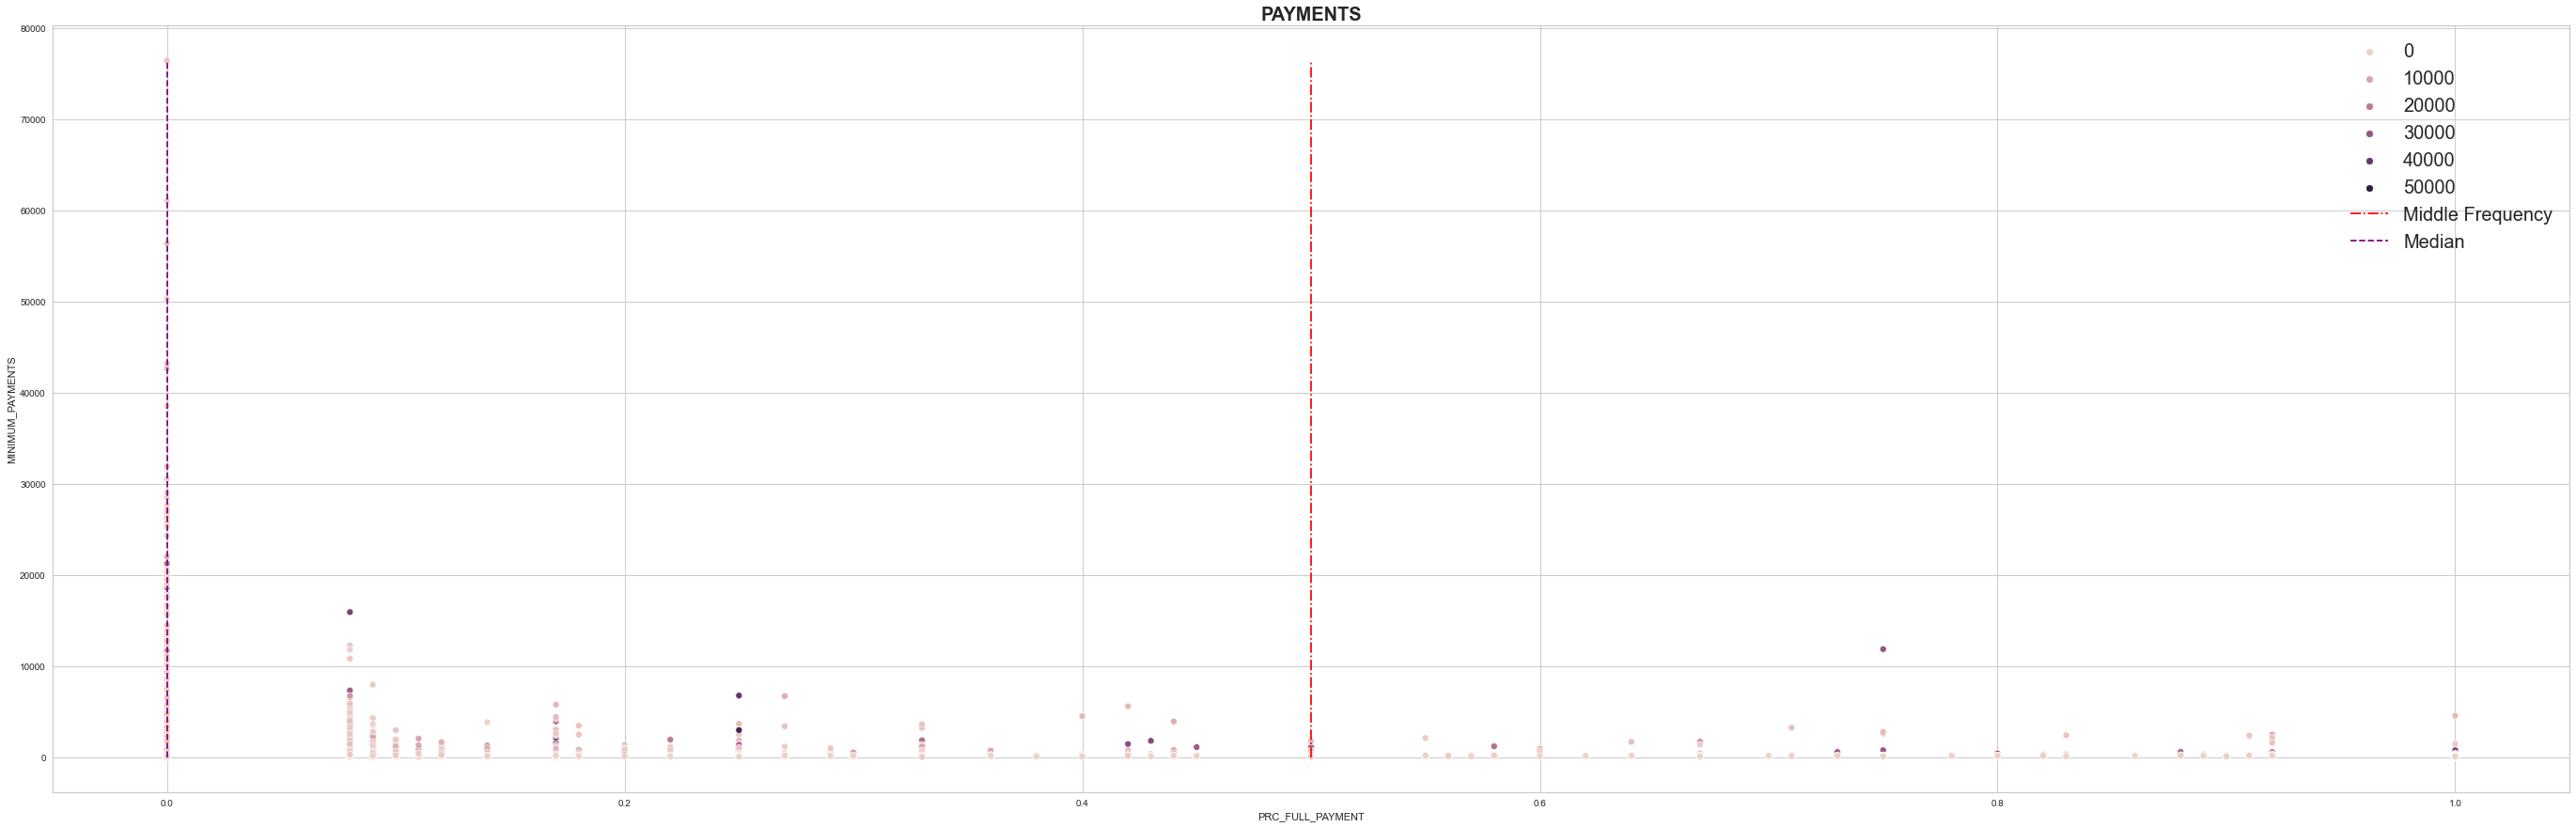

In [49]:
# Bivariate Analysis
plt.figure(figsize=(24 * 2, 15))
plt.title('PAYMENTS', weight='bold', fontsize=20)

sns.scatterplot(data=df, x='PRC_FULL_PAYMENT', y='MINIMUM_PAYMENTS', hue='PAYMENTS')
plt.vlines(x=0.5, ymin=0, ymax=df['MINIMUM_PAYMENTS'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['PRC_FULL_PAYMENT'].quantile(0.5), ymin=0, ymax=df['MINIMUM_PAYMENTS'].max(), color='purple', linestyle='dashed', label='Median')

plt.legend(fontsize=20)
plt.show()

**Univariate Analysis**
- From the graph on the left We can see that the `PAYMENTS` is extremely skewed to the right.
- From the graph on the middle We can see that the `MINIMUM_PAYMENTS` is extremely skewed to the right.
- From the graph on the right We can see that the `PRC_FULL_PAYMENT` is extremely skewed to the right. This simply means that most percentage is around 0-10%.

**Bivariate Analysis**
- We can see that the majority of plot is on the left of the red line, which means there a lot of payment that is not fully paid yet.


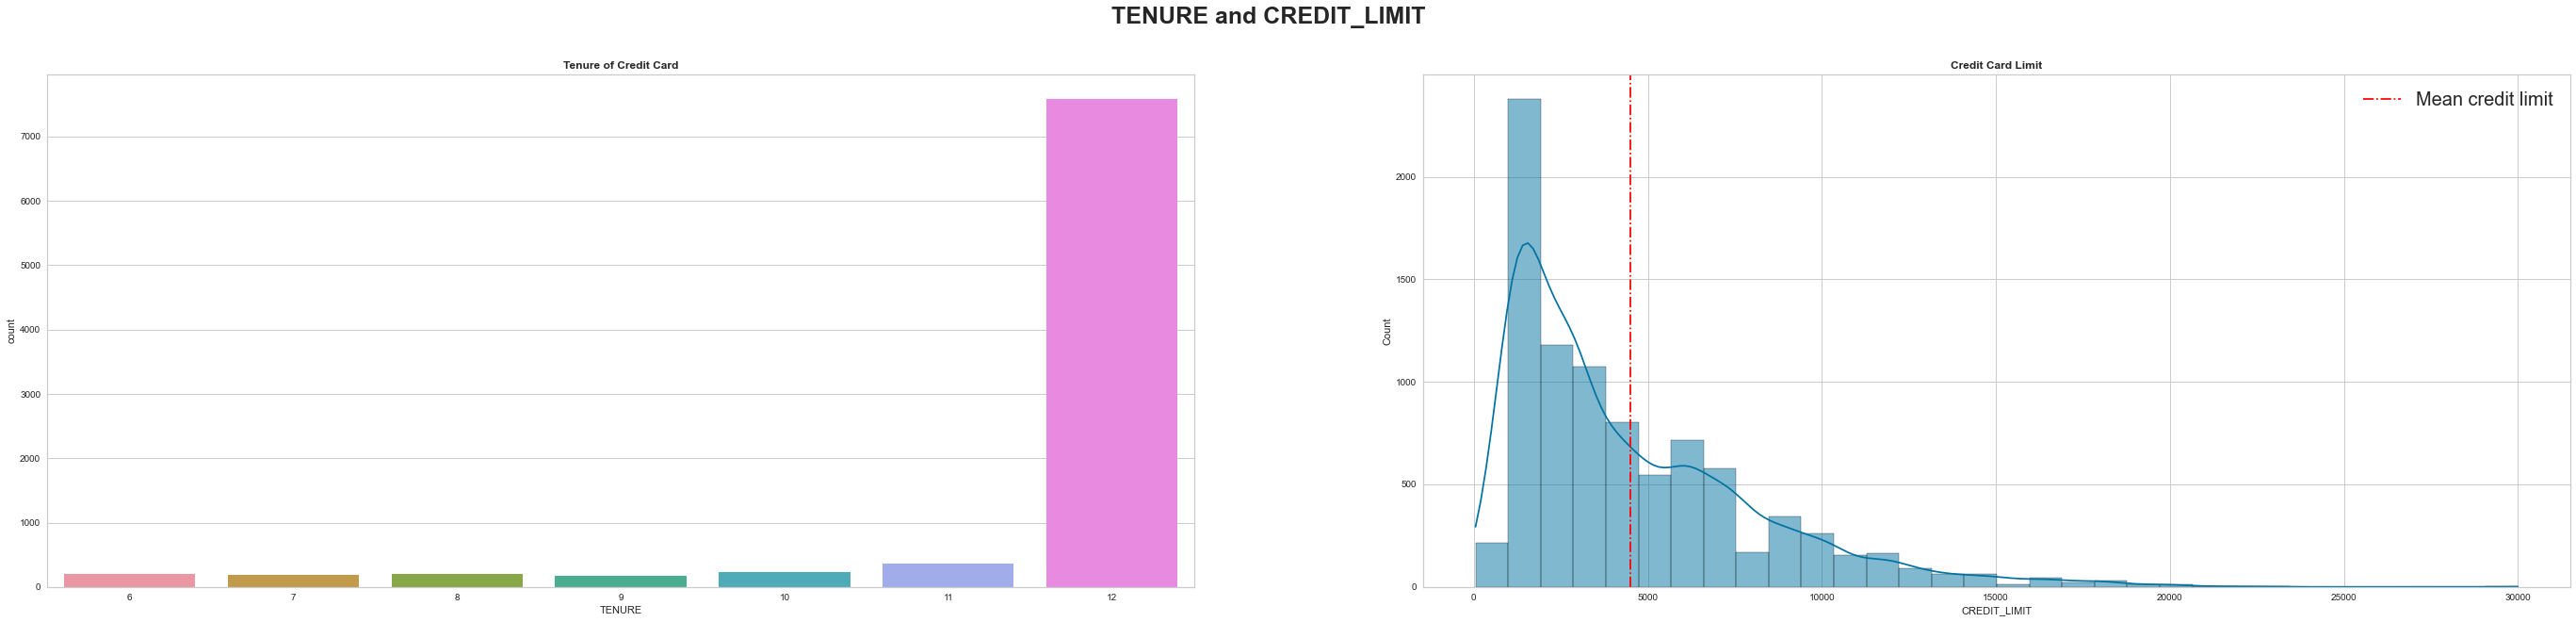

In [50]:
# Univariate Analysis
fig, ax = plt.subplots(1,2, figsize=(24 * 2, 10))
fig.suptitle('TENURE and CREDIT_LIMIT', fontsize=25, weight='bold')
bins = 32

sns.countplot(df.TENURE, ax=ax[0])
ax[0].set_title('Tenure of Credit Card', weight='bold')

sns.histplot(df.CREDIT_LIMIT, kde=True, ax=ax[1], bins=bins)
ax[1].set_title('Credit Card Limit', weight='bold')
ax[1].axvline(x=df['CREDIT_LIMIT'].mean(), color='red', linestyle='dashdot', label='Mean credit limit')

plt.legend(fontsize=20)
plt.show()

**Tenure and Credit_Limit Analysis**

- From graph on the left, We can see that majority of people has 12 months for their credit card `TENURE`.
- From graph on the right, We can see that majority of people (63%) has `CREDIT_LIMIT` between $0 to $4500, only several of people (37%) has credit limit above $4500.

**Note:** Percentage calculation is not shown

## V. Data Preprocessing

In this process, I will split my dataset into two different set. One is `Train Set` and the other is `Inference Set`.\
`Train Set` will be used to train the model and `Inference Set` will be used to test the model.

### Dataset Splitting

1. Train Set : Will be used to `train` the `machine learning` model.
2. Test Set : Will be used to `test` the `machine learning` model.

I will only take handfull sample for my Inference Set and use the rest for my Train Set.

all of those entries will be randomly selected from the dataset.

In [51]:
#Set Random State
random_state = 42

In [52]:
# Inference Set Preparation

inf_set = df.sample(32, random_state=random_state)
inf_set.shape

(32, 18)

In [53]:
# Exclude Inference Set from main dataset
train_set = df.drop(inf_set.index)
train_set.reset_index(drop=True, inplace=True)

train_set.shape

(8918, 18)

In [54]:
# Size Summary
print('Train Set shape : ', train_set.shape)
print('Test Set shape : ', inf_set.shape)

Train Set shape :  (8918, 18)
Test Set shape :  (32, 18)


### Outliers Detection

In this sub-process, I will try to identify any outliers inside each `numerical` features. Before doing the checking, I'll seperate the features into `numerical` and `categorical` features and then:

- I'll check the distribution of each variable, using skewness value. Any skewness value outside `-0.5 to 0.5` will be considered as `Skewed Distribution`, while any skewness value inside `-0.5 to 0.5` will be considered as `Normal Distribution`.
- I'll count how many outliers there in each variable. For `Normal Distribution`, I'll use `Z-score` to determine the outliers threshold. For `Skewed Distribution`, I'll use `IQR` to determine the outliers threshold.
- Summarize all the information above.

In [55]:
# column categorization
def col_categorization(df):
    global train_num, train_cat
    train_num = df[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']]
    train_cat = df['TENURE']
    print("Generate 'train_num' and 'train_cat'")

# column categorization
col_categorization(train_set)

Generate 'train_num' and 'train_cat'


In [56]:
# Confirmation Check
train_num.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.90               0.82      95.40              0.00   
1  3202.47               0.91       0.00              0.00   
2  2495.15               1.00     773.17            773.17   
3  1666.67               0.64    1499.00           1499.00   
4   817.71               1.00      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4          0.00                 0.17   
1                     0.0       6442.95                 0.00   
2                     0.0          0.00                 1.00   
3                     0.0        205.79                 0.08   
4                     0.0          0.00                 0.08   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                        0.00                          0.083333   
1                        0.00                          0.000000   
2                        1.00                          0.000000   
3                        0.08                          0.000000   
4                        0.08                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                    0.00                 0              2        1000.0   
1                    0.25                 4              0        7000.0   
2                    0.00                 0             12        7500.0   
3                    0.08                 1              1        7500.0   
4                    0.00                 0              1        1200.0   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  
0    201.80            139.51              0.00  
1   4103.03           1072.34              0.22  
2    622.07            627.28              0.00  
3      0.00               NaN              0.00  
4    678.33            244.79              0.00

In [57]:
# create function to detect outliers based on distribution
def detect_outliers(df, k=1.5):
    #create dataframe with columns name : feature, distribution, outlier
    global df_outliers
    df_outliers = pd.DataFrame(columns=['col_name','distribution','bottom_limit', 'upper_limit', 'left_tail','right_tail','outliers_count','percentage'])
    #create loop for each feature
    for i in range(len(df.columns)):
        #create if statement for each distribution
        if df.iloc[:,i].skew() > -0.5 and df.iloc[:,i].skew() < 0.5 :
            #count outlier for normal distribution based on z-score
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'normal', # distribution,
                                round(stats.zscore(df.iloc[:,i]).min()), # bottom limit
                                round(stats.zscore(df.iloc[:,i]).max()), # upper limit
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))<-3].count(), # left_tail
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # right_tail
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # outliers_count
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count()/len(df.iloc[:,i])*100] # percentage
        else:
            #count outlier for skew distribution based on IQR
            Q1 = df.iloc[:,i].quantile(0.25)
            Q3 = df.iloc[:,i].quantile(0.75)
            IQR = Q3 - Q1
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'skew', # distribution,
                                Q1-k*IQR, # bottom limit
                                Q1+k*IQR, # upper limit
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))].count(), # left_tail
                                df.iloc[:,i][(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # right_tail
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # outliers_count
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count()/len(df.iloc[:,i])*100] # percentage
    print('Generate df_outliers')


In [58]:
# Outliers Summary
detect_outliers(train_num)
df_outliers.sort_values(by='percentage',ascending=False)

Generate df_outliers


col_name distribution  bottom_limit  upper_limit  \
1                  BALANCE_FREQUENCY         skew       0.72500      1.05500   
15                  PRC_FULL_PAYMENT         skew      -0.21000      0.21000   
5                       CASH_ADVANCE         skew   -1670.73375   1670.73375   
3                   ONEOFF_PURCHASES         skew    -861.72750    861.72750   
4             INSTALLMENTS_PURCHASES         skew    -702.95625    702.95625   
14                  MINIMUM_PAYMENTS         skew    -815.53500   1153.69500   
13                          PAYMENTS         skew   -1892.50875   2659.05375   
2                          PURCHASES         skew   -1565.11375   1644.72875   
10                  CASH_ADVANCE_TRX         skew      -6.00000      6.00000   
7         ONEOFF_PURCHASES_FREQUENCY         skew      -0.45000      0.45000   
11                     PURCHASES_TRX         skew     -23.00000     25.00000   
0                            BALANCE         skew   -2759.93750   3015.78250   
9             CASH_ADVANCE_FREQUENCY         skew      -0.33000      0.33000   
12                      CREDIT_LIMIT         skew   -5750.00000   8950.00000   
6                PURCHASES_FREQUENCY       normal      -1.00000      1.00000   
8   PURCHASES_INSTALLMENTS_FREQUENCY         skew      -1.12500      1.12500   

    left_tail  right_tail  outliers_count  percentage  
1        1489           0            1489   16.696569  
15          0        1471            1471   16.494730  
5           0        1024            1024   11.482395  
3           0        1014            1014   11.370262  
4           0         862             862    9.665844  
14          0         838             838    9.396726  
13          0         806             806    9.037901  
2           0         803             803    9.004261  
10          0         801             801    8.981834  
7           0         781             781    8.757569  
11          0         762             762    8.544517  
0           0         693             693    7.770801  
9           0         522             522    5.853330  
12          0         246             246    2.758466  
6           0           0               0    0.000000  
8           0           0               0    0.000000

From the result above, We can see that there are lots of outliers in the dataset. Here are what I'll do:
- I'll `trim` any outliers that has `outliers percentage below 5%`
- I'll `cap` any outliers that has `outliers percentage between 5% to 15%`
- I'll let be any outliers that has `outliers percentage above 15%`

In [59]:
#create function to handling outliers
def handling_outliers(exception_list):
   global train_set,y_train, norm_under_5, norm_5to15, skew_under_5, skew_5to15
   exception_list = exception_list

   norm_under_5 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']<5]['col_name'].tolist()
   norm_5to15 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']>5][df_outliers['percentage']<15]['col_name'].tolist()
   skew_under_5 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']<5]['col_name'].tolist()
   skew_5to15 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']>5][df_outliers['percentage']<15]['col_name'].tolist() 

   norm_under_5 = [x for x in norm_under_5 if x not in exception_list]
   norm_5to15 = [x for x in norm_5to15 if x not in exception_list]
   skew_under_5 = [x for x in skew_under_5 if x not in exception_list]
   skew_5to15 = [x for x in skew_5to15 if x not in exception_list]


   custom_list = ['norm_under_5','norm_over_5','skew_under_5','skew_over_5']

   for i in custom_list: 
      if i == 'norm_under_5' and len(norm_under_5)!= 0:
         
         trim_norm = OutlierTrimmer(capping_method='gaussian',
                                    tail='both', # left/right/both
                                    fold=3, # for gaussian 2 or 3
                                    variables=norm_under_5,
                                    missing_values='ignore')    
         trim_norm.fit(train_set)

         df = trim_norm.transform(train_set)
         
         # #intersection of y_train and train_set index location
         # y_train = y_train.loc[y_train.index.intersection(train_set.index)]

      elif i == 'norm_over_5' and len(norm_5to15)!= 0:

         winsorizer_norm = Winsorizer(capping_method='gaussian',
                                    tail='both', # left/right/both
                                    fold=3, # for gaussian 2 or 3
                                    variables=norm_5to15,
                                    missing_values='ignore')    
         winsorizer_norm.fit(train_set)

         train_set = winsorizer_norm.transform(train_set)
       
   
      elif i == 'skew_under_5'and len(skew_under_5)!= 0:
         
         trim_skew = OutlierTrimmer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_under_5,
                                    missing_values='ignore')    
         trim_skew.fit(train_set)

         train_set = trim_skew.transform(train_set)

         # #intersection of y_train and train_set
         # y_train = y_train.loc[y_train.index.intersection(train_set.index)]
   
      elif i == 'skew_over_5' and len(skew_5to15)!= 0:

         winsorizer_skew = Winsorizer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_5to15,
                                    missing_values='ignore')    
         winsorizer_skew.fit(train_set)

         train_set = winsorizer_skew.transform(train_set)

In [60]:
# Outliers Handling Summary
print('Train_Set Before', train_set.shape)
handling_outliers(exception_list=[])
print('Train_Set After', train_set.shape)

Train_Set Before (8918, 18)
Train_Set After (8672, 18)


From result above, We can see that the amount of samples in the dataset is reduced from `8918` to `8672` or decreased 2.76%.

### Missing Value Detection

In this sub-process, I will handle any missing value inside the dataset. Let's check the missing value in each parameter.

In [61]:
# create function to detect missing values

def detect_missval(df):
    global df_missval
    df_missval = pd.DataFrame(columns=['col_name','missing_count','missing_percentage'])
    for i in range(len(df.columns)):
        if df.iloc[:,i].isnull().sum() != 0:
            df_missval.loc[i] = [df.columns[i], # col_name
                                df.iloc[:,i].isnull().sum(), # missing_count
                                df.iloc[:,i].isnull().sum()/len(df.iloc[:,i])*100] # missing_percentage
    print('Generate df_missval')
    return df_missval

In [62]:
# Missing Value check
# Train Set
detect_missval(train_set)

Generate df_missval


col_name  missing_count  missing_percentage
13      CREDIT_LIMIT              1            0.011531
15  MINIMUM_PAYMENTS            308            3.551661

In [63]:
# Missing Value check
# Test Set
detect_missval(inf_set)

Generate df_missval


Empty DataFrame
Columns: [col_name, missing_count, missing_percentage]
Index: []

From results above, We can see that `CREDIT_LIMIT` and `MINIMUM_PAYMENTS` have missing value. Let's check the missing value first.

In [64]:
# Missing Value check
# Feature : CREDIT_LIMIT

train_set[train_set['CREDIT_LIMIT'].isnull()]

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5184  C15349     18.4               0.17        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5184                     0.0        186.85                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5184                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5184                    0.17               1.0            0.0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5184      9.04             14.42               0.0       6

Based on information in the net regarding how a company determines customer's credit limit, it is stated like this:
> [Most companies check your credit reports and gross annual income level to determine your `credit limit`. Factors that issuers like to consider include your repayment history, the length of your credit history and the number of credit accounts on your report.](https://www.investopedia.com/articles/credit-loans-mortgages/081516/how-credit-card-companies-determine-credit-limit-expn.asp#:~:text=Most%20companies%20check%20your%20credit,credit%20accounts%20on%20your%20report.)

Based on the explanation, there is no such information regarding `annual income level, repayment history, and credit history` in the dataset. Hence I'll consider this missing value as `Missing Completly at Random.` Since the missing value is only one, I'll just discard the entry.  

In [65]:
# Discard the entry
train_set = train_set.drop(train_set[train_set['CREDIT_LIMIT'].isnull()].index)

In [66]:
# Missing Value check
# Feature : MINIMUM_PAYMENTS
train_set[train_set['MINIMUM_PAYMENTS'].isnull()]

CUST_ID  BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     C10004  1666.67               0.64    1499.00        1351.15625   
45    C10047  2242.31               1.00     437.00          97.00000   
47    C10049  3910.11               1.00       0.00           0.00000   
54    C10056     6.66               0.64     310.00           0.00000   
55    C10057  1312.00               1.00    1283.90        1283.90000   
...      ...      ...                ...        ...               ...   
8887  C19160    14.52               0.33     152.00         152.00000   
8897  C19170   371.53               0.33       0.00           0.00000   
8903  C19176   183.82               1.00     465.90           0.00000   
8912  C19185   193.57               0.83    1012.73        1012.73000   
8914  C19187    19.18               1.00     300.00           0.00000   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0        205.79                 0.08   
45                     340.0        184.65                 0.33   
47                       0.0       1980.87                 0.00   
54                     310.0          0.00                 0.67   
55                       0.0          0.00                 0.25   
...                      ...           ...                  ...   
8887                     0.0          0.00                 0.33   
8897                     0.0       1465.41                 0.00   
8903                   465.9          0.00                 1.00   
8912                     0.0          0.00                 0.33   
8914                   300.0          0.00                 1.00   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                           0.08                          0.000000   
45                          0.08                          0.333333   
47                          0.00                          0.000000   
54                          0.00                          0.666667   
55                          0.25                          0.000000   
...                          ...                               ...   
8887                        0.33                          0.000000   
8897                        0.00                          0.000000   
8903                        0.00                          0.833333   
8912                        0.33                          0.000000   
8914                        0.00                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                       0.08               1.0            1.0        7500.0   
45                      0.17               2.0            5.0        2400.0   
47                      0.50               7.0            0.0        4200.0   
54                      0.00               0.0            8.0        1000.0   
55                      0.00               0.0            6.0        6000.0   
...                      ...               ...            ...           ...   
8887                    0.00               0.0            2.0        1500.0   
8897                    0.17               5.0            0.0        1500.0   
8903                    0.00               0.0            6.0        1500.0   
8912                    0.00               0.0            2.0        4000.0   
8914                    0.00               0.0            6.0        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3         0.00               NaN               0.0      12  
45        0.00               NaN               0.0      12  
47        0.00               NaN               0.0      12  
54      417.02               NaN               0.0      12  
55        0.00               NaN               0.0      12  
...        ...               ...               ...     ...  
8887      0.00               NaN               0.0       6  
8897      0.00               NaN             

I see a pattern here, most `MINIMUM_PAYMENTS` that is missing has `PAYMENTS` with 0 value in it. Let's take closer into it.

In [67]:
# Confirmation
train_set[train_set['MINIMUM_PAYMENTS'].isnull()]['PAYMENTS'].value_counts()

0.0000       235
3985.0975      5
545.7600       1
861.7400       1
317.3500       1
            ... 
178.7100       1
556.0700       1
197.8500       1
165.7600       1
275.8600       1
Name: PAYMENTS, Length: 70, dtype: int64

From result above, We can see that there are 235 entries with 0 `PAYMENTS` and null in `MINIMUM_PAYMENTS`. I think this is logical because the customer has not made any `PAYMENTS` yet, hence the `MINIMUM_PAYMENTS` is null.\
For other entries that has already made `PAYMENTS` and is null in `MINIMUM_PAYMENTS`, I consider this as `Missing at Random.` This is because there no apparent reason why the value is null.

and here is what I gonna do:
- Replace null values in `MINIMUM_PAYMENTS` with 0 for any entries that has 0 `PAYMENTS`
- Impute missing values in `MINIMUM_PAYMENTS` with median of `MINIMUM_PAYMENTS` for any entries that has  `non-zero PAYMENTS value`

Specifically for value imputation of `MINIMUM_PAYMENTS` in `Test Set`, I'll use the median of `MINIMUM_PAYMENTS` from `Train Set` as the imputed value. This is done to avoid any `information leakage.`

In [68]:
# Replacing the missing values with 0

# Train Set
filtered = train_set['MINIMUM_PAYMENTS'].isnull() & train_set['PAYMENTS']==0 # filter null values with `PAYMENTS`==0

train_set.loc[filtered, 'MINIMUM_PAYMENTS'] = train_set.loc[filtered, 'MINIMUM_PAYMENTS'].fillna(0) # Replace missing value with 0

In [69]:
# Replacing the missing values with median
# Train Set
train_set['MINIMUM_PAYMENTS'].fillna(train_set['MINIMUM_PAYMENTS'].median(), inplace=True)


In [70]:
# Confirmation
train_set.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

I can confirm that our dataset is now free of missing value.

### Feature Engineering (Scaling & Encoding)
In this part of process, I will select the features that I want to use in my model. In this process I will categorize my features into `numerical`, `numerical_range` and `categorical` features.\
`Numerical features` consist of feature that has `numerical values` in it, `Numerical_range` features consist of features that has `numerical values between 0-1` in it, but the values are not in the range of 0 to 1. `Categorical features` consist of features that has `categorical values` in it.\
Then here are what I gonna do:

- I'll scale the `numerical` features using `Standard Scaller`, this is because most of the features are `skew distributed`.
- I'll power-transform the `numerical_range` features using `Box-Cox Transformation`, this is because most of the features are `skew distributed`.
- I'll encode the `categorical` features using `Label Encoder.`

**Note:**
I will not include `CUST_ID` in my features due to it has unique value in each of the entries.

**References Used**

https://www.researchgate.net/post/Can-I-fit-PCA-algorithm-with-positive-skewed-data


In [71]:
# Features Categorization
num_col = ['BALANCE','PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS']

num_range_col = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

cat_col = ['TENURE']

In [72]:
# Split the dataset based on column categories
train_set_num = train_set[num_col]
train_set_range = train_set[num_range_col]
train_set_cat = train_set[cat_col]

inf_set_num = inf_set[num_col]
inf_set_range = inf_set[num_range_col]
inf_set_cat = inf_set[cat_col]

In [73]:
# Define the scaler, transformer, and encoder
scaler = StandardScaler()
power = PowerTransformer()
encoder = LabelEncoder()

In [74]:
# Scaling Process
train_scaled = scaler.fit(train_set_num)
train_scaled = scaler.transform(train_set_num)

In [75]:
# Power Transform Process
train_Powered = power.fit(train_set_range)
train_Powered = power.transform(train_set_range)

In [76]:
# Encoding Process
train_encoded = encoder.fit(train_set_cat)
train_encoded = encoder.transform(train_set_cat)

In [77]:
# Concatenate the scaled and transformed data
train_scaled = np.concatenate((train_scaled, train_Powered), axis=1)

In [78]:
# Normalize the dataset
normalizer = Normalizer()
train_scaled = normalizer.fit_transform(train_scaled)

### Variance Inflation Factor

In this sub-process, I will check the `multicolinearity` between features. I'll use the `Variance Inflation Factor` for it. For this process, I'll use 5 as my threshold level, where:
- Any feature that has `Variance Inflation Factor` above 5 will be considered as `highly multicolinear`
- Any feature that has `Variance Inflation Factor` below 5 will be considered as `not multicolinear`

`High Multicolinearity` means that the features are highly correlated or `dependent` on each other. `Low Multicolinearity` means that the features are not correlated or `independent` from each other.\
I'll consider to use any features that has low multicolinearity in my model.

In [79]:
# Concate train_set_num and train_set_range
train_set_numrange = train_set[num_col + num_range_col]

In [80]:
#  Variance Inflation Factor Check
vif_data = pd.DataFrame(columns=['Feature','VIF'])

for i in range(len(train_set_numrange.columns)):
    # if variance_inflation_factor(train_set_numrange.values, i) <= 5:
        vif = variance_inflation_factor(train_set_numrange.values, i)
        vif_data.loc[i] = [train_set_numrange.columns[i], vif]

vif_data.sort_values(by='VIF').reset_index(drop=True)

Feature        VIF
0                   PRC_FULL_PAYMENT   1.782036
1                           PAYMENTS   4.071385
2                       CREDIT_LIMIT   4.383895
3                       CASH_ADVANCE   5.094422
4                  BALANCE_FREQUENCY   6.530407
5                   MINIMUM_PAYMENTS   6.857229
6                            BALANCE   9.006084
7         ONEOFF_PURCHASES_FREQUENCY  10.234557
8             INSTALLMENTS_PURCHASES  11.335922
9                      PURCHASES_TRX  11.547900
10            CASH_ADVANCE_FREQUENCY  12.565260
11                  CASH_ADVANCE_TRX  12.923023
12                  ONEOFF_PURCHASES  15.574170
13  PURCHASES_INSTALLMENTS_FREQUENCY  22.196112
14               PURCHASES_FREQUENCY  26.188755
15                         PURCHASES  26.313306

Based on result above, there are only three features that has `VIF` score below 5. Hence from 16 features, I'll probably use `3+1` features in my model.\
To validate the judgement, I'll check the `Explained Variance Ratio` of the features in the following sub-process.

### Explained Variance Ratio

In this sub-process, I will verify wether use features said in `Variance Inflation Factor` is good or not.

In [81]:
# First PCA Trial
pca_trial = PCA(n_components=0.8)
pca_trial.fit(train_scaled)

# Result
train_reduced = pca_trial.transform(train_scaled)

In [82]:
# First PCA Result
pca_trial.n_components_

5

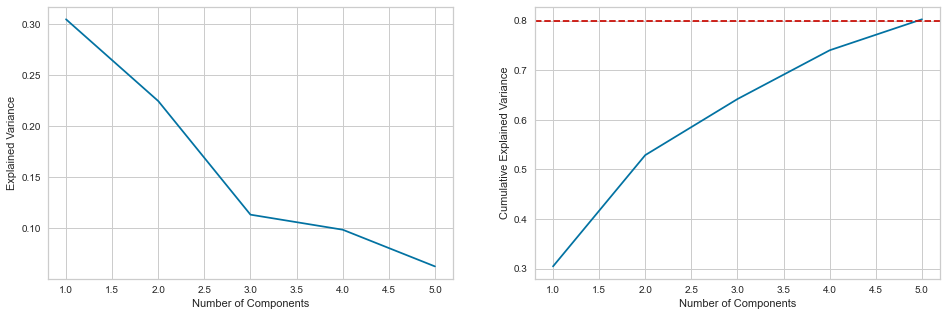

In [83]:
# EVR
fig,ax=plt.subplots(ncols=2,figsize=(16,5))

ax[0].plot(range(1,pca_trial.n_components_+1),pca_trial.explained_variance_ratio_)
ax[0].set_xlabel('Number of Components')
ax[0].set_ylabel('Explained Variance')

ax[1].plot(range(1,pca_trial.n_components_+1),np.cumsum(pca_trial.explained_variance_ratio_))
ax[1].set_xlabel('Number of Components')
ax[1].set_ylabel('Cumulative Explained Variance')
ax[1].axhline(y=0.8 ,linestyle='--', color='r')

plt.show()

From result above, I can say it is better to use 5 features in my model rather than 4 features as said in `Variance Inflation Factor` process.\
By using 5 features, I can keep 80% of the variance in the dataset.

## VI. Model Definition

### Model
For this initial model, features that will be used in my model will be based on `variation inflation factor` and `explained variance ratio` process.

### Algortihm

For this project, I'll use these algorithms:
- K-Means Clustering
- Birch Clustering
- Agglomerative Clustering

I'll compare the result of each algorithm and choose the best one as my main model.

In [84]:
# K-Means Clustering
km = KMeans(random_state=random_state, init='k-means++', n_init=100)

In [85]:
# Birch Clustering
bir = Birch(threshold=0.5, branching_factor=50)

In [86]:
# Agglomerative Clustering
agl = AgglomerativeClustering()

### Evaluation Method

For evaluating my model performance, I'll utilize method like `Elbow Method` and `Silhouette Method.`

## VII. Model Training

In this part of process, I will train my model using the `train_reduced` dataset.

In [87]:
# K-Means
km.fit(train_reduced)

KMeans(n_init=100, random_state=42)

In [88]:
# Birch
bir.fit(train_reduced)

Birch()

In [89]:
# Agglomerative Clustering
agl.fit(train_reduced)

AgglomerativeClustering()

## VIII. Model Evaluation

In this part of process, I will evaluate the model performance between each algorithm and pick one that has the best performance, after that I'll try to describe the clustering results.

### K-Means Evaluation

Text(0, 0.5, 'Inertia')

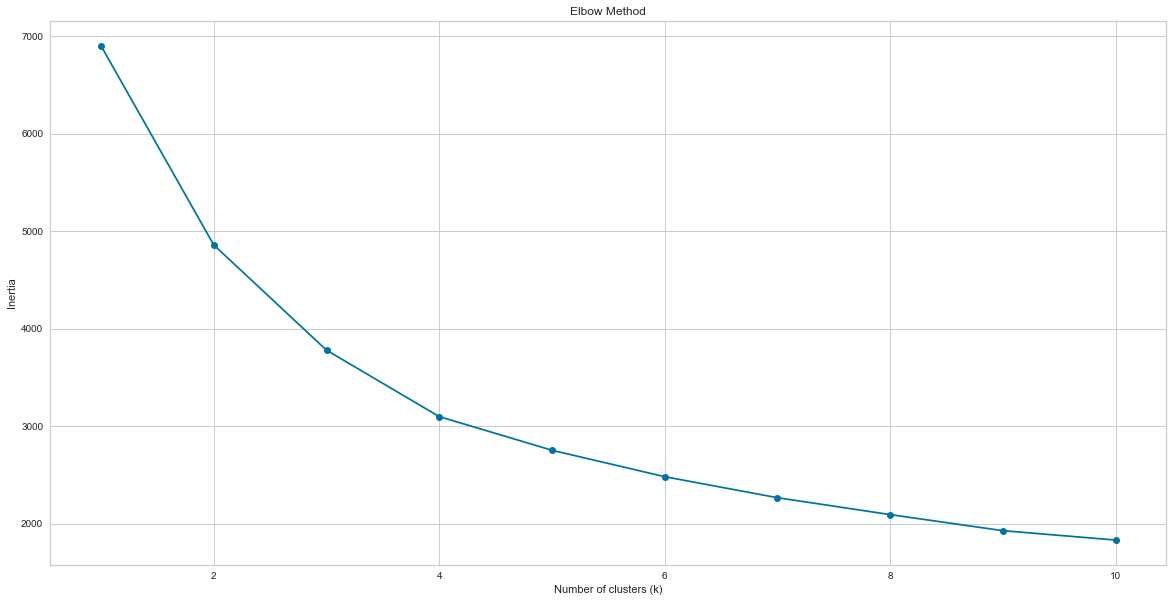

In [90]:
# K-Means Clustering
k_range = range(1,11)
inertias = []

for n_cluster in k_range:
    km = KMeans(n_clusters=n_cluster, random_state=42, init='k-means++', n_init=100).fit(train_reduced)
    inertias.append(km.inertia_)

# Visualitation of the inertia
plt.figure(figsize=(20,10))    
plt.title("Elbow Method")
plt.plot(k_range, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

Based on result above, I can say the optimal number of clusters is between 2 to 4 clusters, let's see the `silhoutte score` for second opinion.

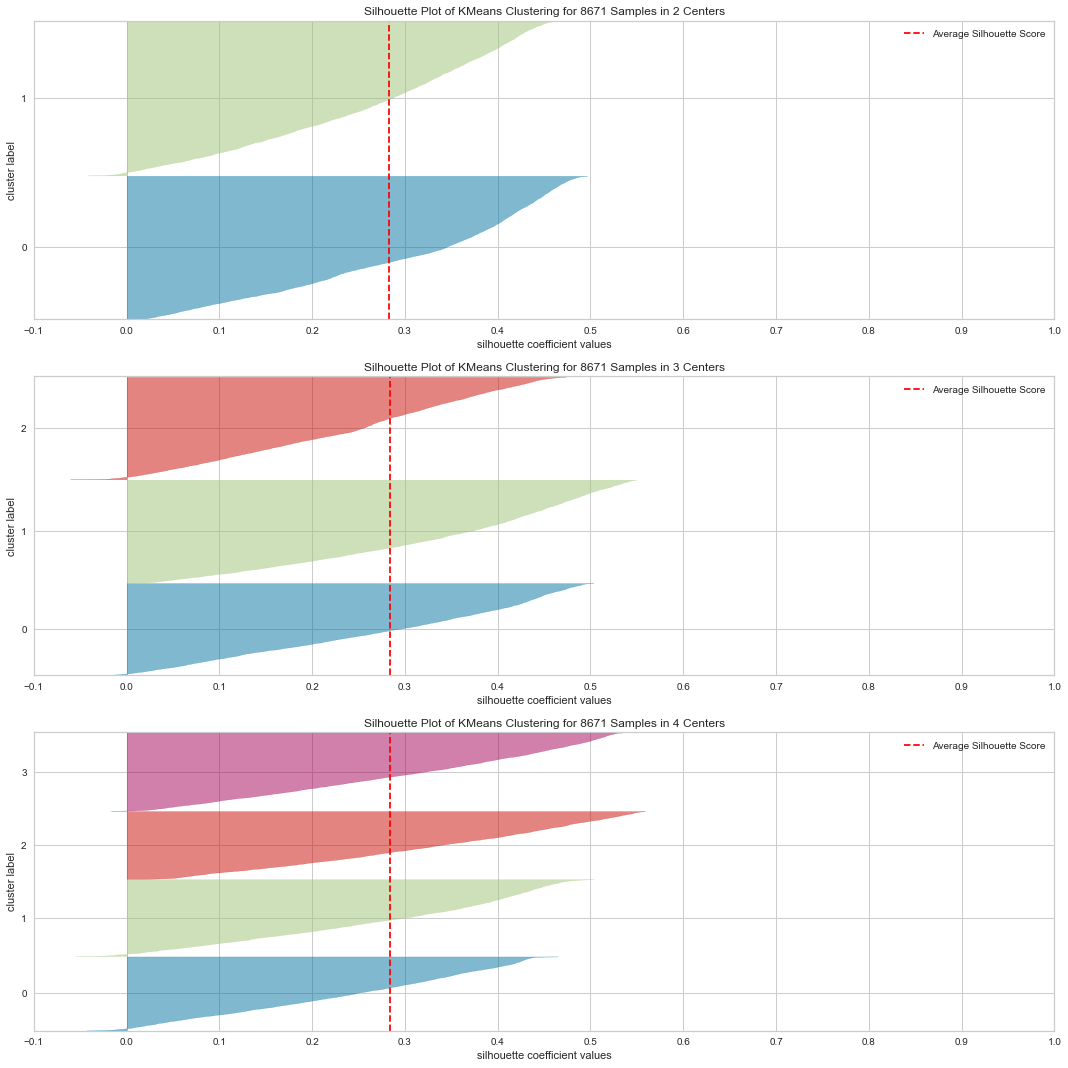

In [91]:
# Silhoutte Score for K-means
k_range = range(2,5)
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for n_cluster in k_range:
    km = KMeans(n_clusters=n_cluster, random_state=42, init='k-means++', n_init=100).fit(train_reduced)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=axes[n_cluster-2])
    visualizer.fit(train_reduced)
    visualizer.finalize()
    axes[n_cluster-2].set_xlim(-0.1, 1)
    
plt.tight_layout()

Based from `silhoutte score` above, I can say that number of clusters 2 to 4, gives equally good results. For this time, I'll choose to use 3 clusters.\
Now let's see the clustering results.

In [92]:
# Clustering the Dataset
km = KMeans(n_clusters=3, random_state=random_state, init='k-means++', n_init=100)
km.fit(train_reduced)

pred_km = km.predict(train_reduced)

km_clustered = train_set.copy()
km_clustered['Cluster'] = pred_km + 1

In [93]:
# Visualization of the clusters
pca = PCA(n_components=3)
pca_data_km = pca.fit_transform(train_reduced)
pca_df_km = pd.DataFrame(data=pca_data_km, columns=['PCA1','PCA2', 'PCA3'])
pca_df_km['Cluster'] = pred_km + 1

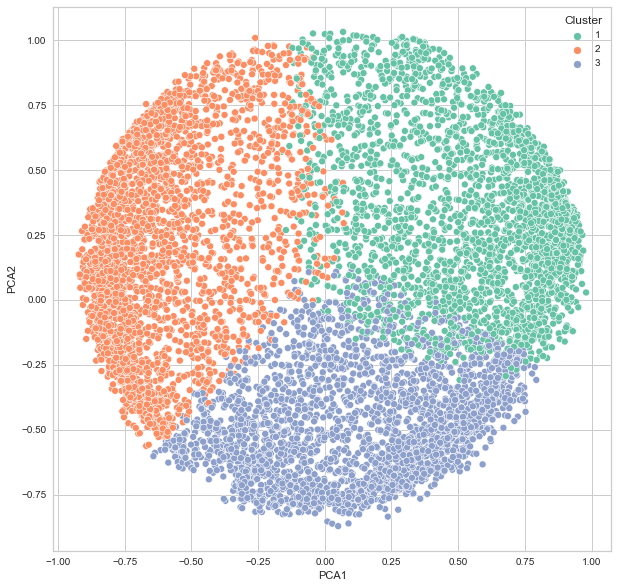

In [94]:
# Result Visualization
plt.figure(figsize=(10,10))

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df_km, legend='full', palette='Set2')

plt.show()

Based on clustering result above, I can say that `K-Means Clustering` successfully clusters the data into 3 clusters.

### Birch Evaluation

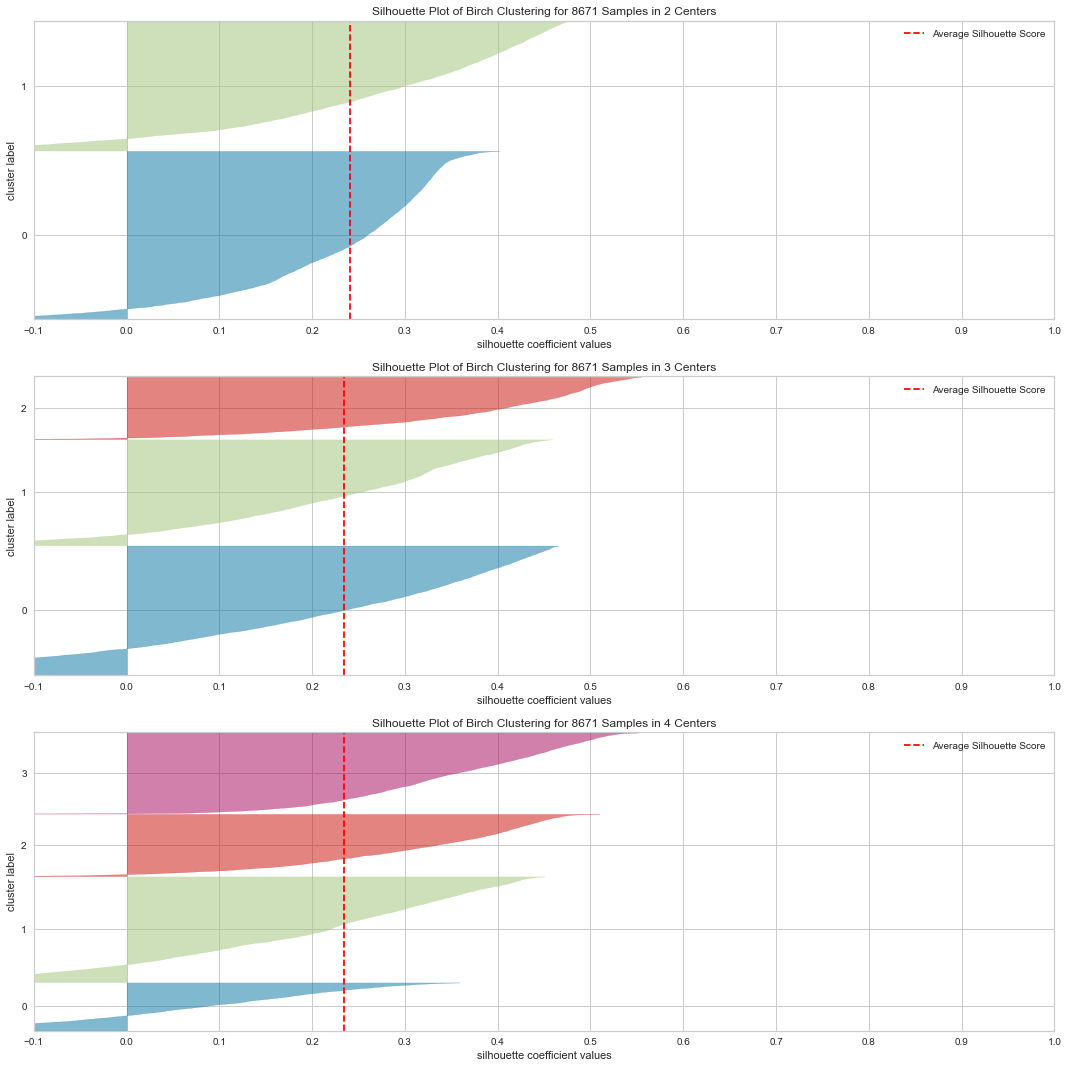

In [95]:
# Silhoutte Score for Birch
k_range = range(2,5)
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for n_cluster in k_range:
    bir = Birch(n_clusters=n_cluster, threshold=0.5, branching_factor=50).fit(train_reduced)
    visualizer = SilhouetteVisualizer(bir, colors='yellowbrick', ax=axes[n_cluster-2])
    visualizer.fit(train_reduced)
    visualizer.finalize()
    axes[n_cluster-2].set_xlim(-0.1, 1)
    
plt.tight_layout()

Based from `silhoutte score` above, I can say that number of clusters 2 or 3 gives the least acceptable result compared to other cluster number. I'll just choose to use 3 clusters too.\
Now let's see the clustering results.

In [96]:
# Clustered Data
bir = Birch(n_clusters=3, threshold=0.5, branching_factor=50)
bir.fit(train_reduced)

pred_bir = bir.predict(train_reduced)

bir_clustered = train_set.copy()
bir_clustered['Cluster'] = pred_bir + 1

In [97]:
# Visualization of the clusters
pca = PCA(n_components=3)
pca_data_bir = pca.fit_transform(train_reduced)
pca_df_bir = pd.DataFrame(data=pca_data_bir, columns=['PCA1','PCA2', 'PCA3'])
pca_df_bir['Cluster'] = pred_bir + 1

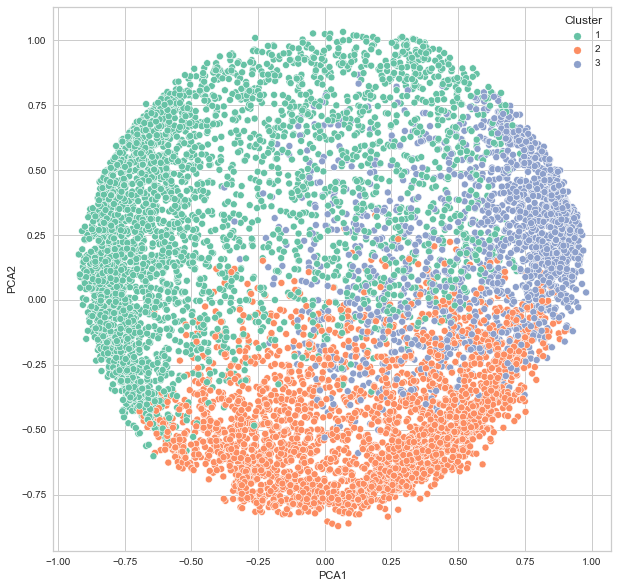

In [98]:
# Result Visualization
plt.figure(figsize=(10,10))

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df_bir, legend='full', palette='Set2')

plt.show()

Based on clustering result above, I can say that `Birch Clustering` quite successfully clusters the data into 3 clusters, but it doesn't perform quite well compared to `K-Means Clustering`.

### Agglomerative Evaluation

In [99]:
# Silhoutte Score for Agglomerative Clustering
sil_agl = []
for i in range(2,5):
  agg = AgglomerativeClustering(n_clusters=i)
  agg.fit(train_reduced)
  sil_score= silhouette_score(train_reduced, agg.labels_)
  sil_agl.append((i, sil_score))

pd.DataFrame(sil_agl, columns=['n_cluster', 'Silhouette Score'])

n_cluster  Silhouette Score
0          2          0.244015
1          3          0.225366
2          4          0.211924

Based from above result, for Agglomerative Clustering, the optimal cluster number is 2 because it has the highest silhouette score.

In [100]:
# Clustering the Dataset
agl = AgglomerativeClustering(n_clusters=2)

pred_agl = agl.fit_predict(train_reduced)

agl_clustered = train_set.copy()
agl_clustered['Cluster'] = pred_agl + 1

In [101]:
# Visualization of the clusters
pca = PCA(n_components=2)
pca_data_agl = pca.fit_transform(train_reduced)
pca_df_agl = pd.DataFrame(data=pca_data_agl, columns=['PCA1','PCA2'])
pca_df_agl['Cluster'] = pred_agl + 1

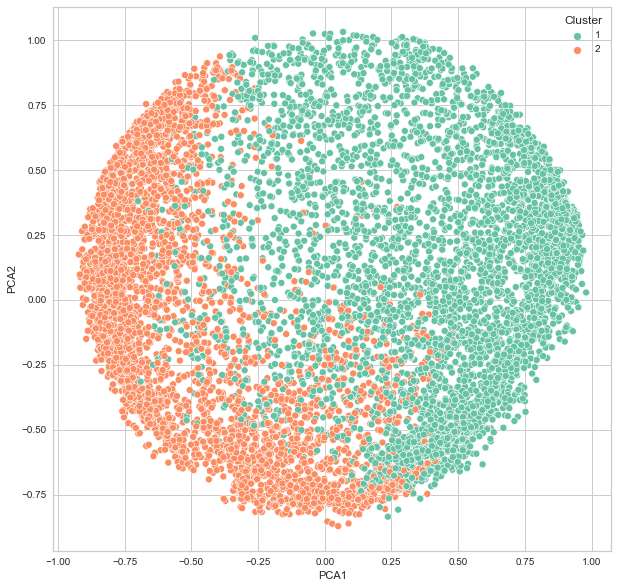

In [102]:
# Result Visualization
plt.figure(figsize=(10,10))

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df_agl, legend='full', palette='Set2')

plt.show()

From result above, I think `Agglomerative Clustering` quite able to cluster the data into 2 clusters, but it's performance is not as good as the other two algorithms. If We take a closer looks, We can find cluster 1 and 2 are spreadout into area of other clusters (outliers).

### Model Analysis Conclusion

Based on process above, I can say that those three algorithm succesfully cluster the dataset, but `Birch Clustering` and `Agglomerative Clustering` failed to `evenly cluster` the dataset.\
Hence, I'll use `K-Means Clustering` as my main model and proceed to inference set.

## IX. Clusters Analysis
In this part of process, I will try to describe the characteristics of each cluster. Each cluster will determine different customer segmentation.\
To make my analysis more easy to understand, I'll just focus on these following features to describe each cluster charachteristics:
- BALANCE
- PURCHASES
- ONEOFF_PURCHASES
- INSTALLMENT_PURCHASE
- CASH_ADVANCE
- CREDIT_LIMIT
- PAYMENTS

In [103]:
# Dataframe Preaparation
df_EDA = km_clustered[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
                        'INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'CREDIT_LIMIT', 
                        'PAYMENTS', 'Cluster']]

# Dataframe Check
df_EDA

BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0       40.90      95.40           0.00000                   95.40   
1     3202.47       0.00           0.00000                    0.00   
2     2495.15     773.17         773.17000                    0.00   
3     1666.67    1499.00        1351.15625                    0.00   
4      817.71      16.00          16.00000                    0.00   
...       ...        ...               ...                     ...   
8913    28.49     291.12           0.00000                  291.12   
8914    19.18     300.00           0.00000                  300.00   
8915    23.40     144.40           0.00000                  144.40   
8916    13.46       0.00           0.00000                    0.00   
8917   372.71    1093.25        1093.25000                    0.00   

      CASH_ADVANCE  CREDIT_LIMIT   PAYMENTS  Cluster  
0             0.00        1000.0   201.8000        3  
1          2735.50        7000.0  3985.0975        2  
2             0.00        7500.0   622.0700        1  
3           205.79        7500.0     0.0000        3  
4             0.00        1200.0   678.3300        3  
...            ...           ...        ...      ...  
8913          0.00        1000.0   325.5900        3  
8914          0.00        1000.0   275.8600        3  
8915          0.00        1000.0    81.2700        3  
8916         36.56         500.0    52.5500        3  
8917        127.04        1200.0    63.1700        1  

[8671 rows x 8 columns]

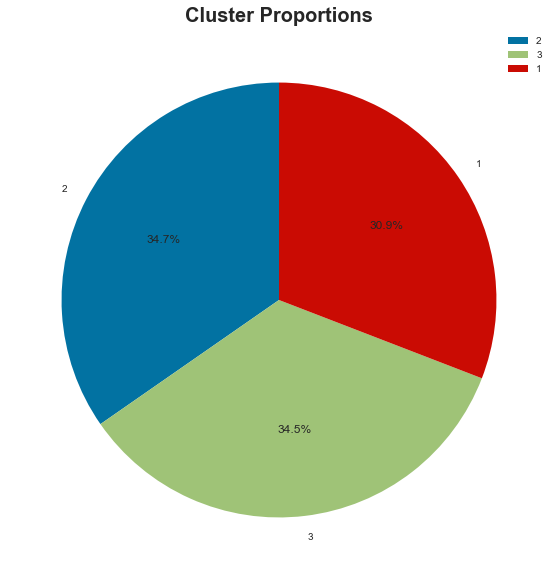

In [104]:
# Cluster Proportions
plt.figure(figsize=(10,10))
plt.title('Cluster Proportions', weight='bold', size=20)

plt.pie(df_EDA['Cluster'].value_counts(), labels=df_EDA['Cluster'].value_counts().index, autopct='%1.1f%%', startangle=90)

plt.legend()
plt.show()

We can see that each cluster is almost evenly distributed in the dataset.

In [105]:
# Agregated Dataframe
df_EDA_ = pd.DataFrame(df_EDA.groupby('Cluster').mean().round(2))
df_EDA_.reset_index(inplace=True)
df_EDA_

Cluster  BALANCE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  \
0        1  1604.25    1713.03            841.26                  600.91   
1        2  2109.57     129.19             86.15                   40.61   
2        3   309.22     380.81            123.12                  248.79   

   CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  
0        433.65       5425.39   2015.47  
1       1470.81       4167.11   1333.66  
2         41.45       2992.38    587.55

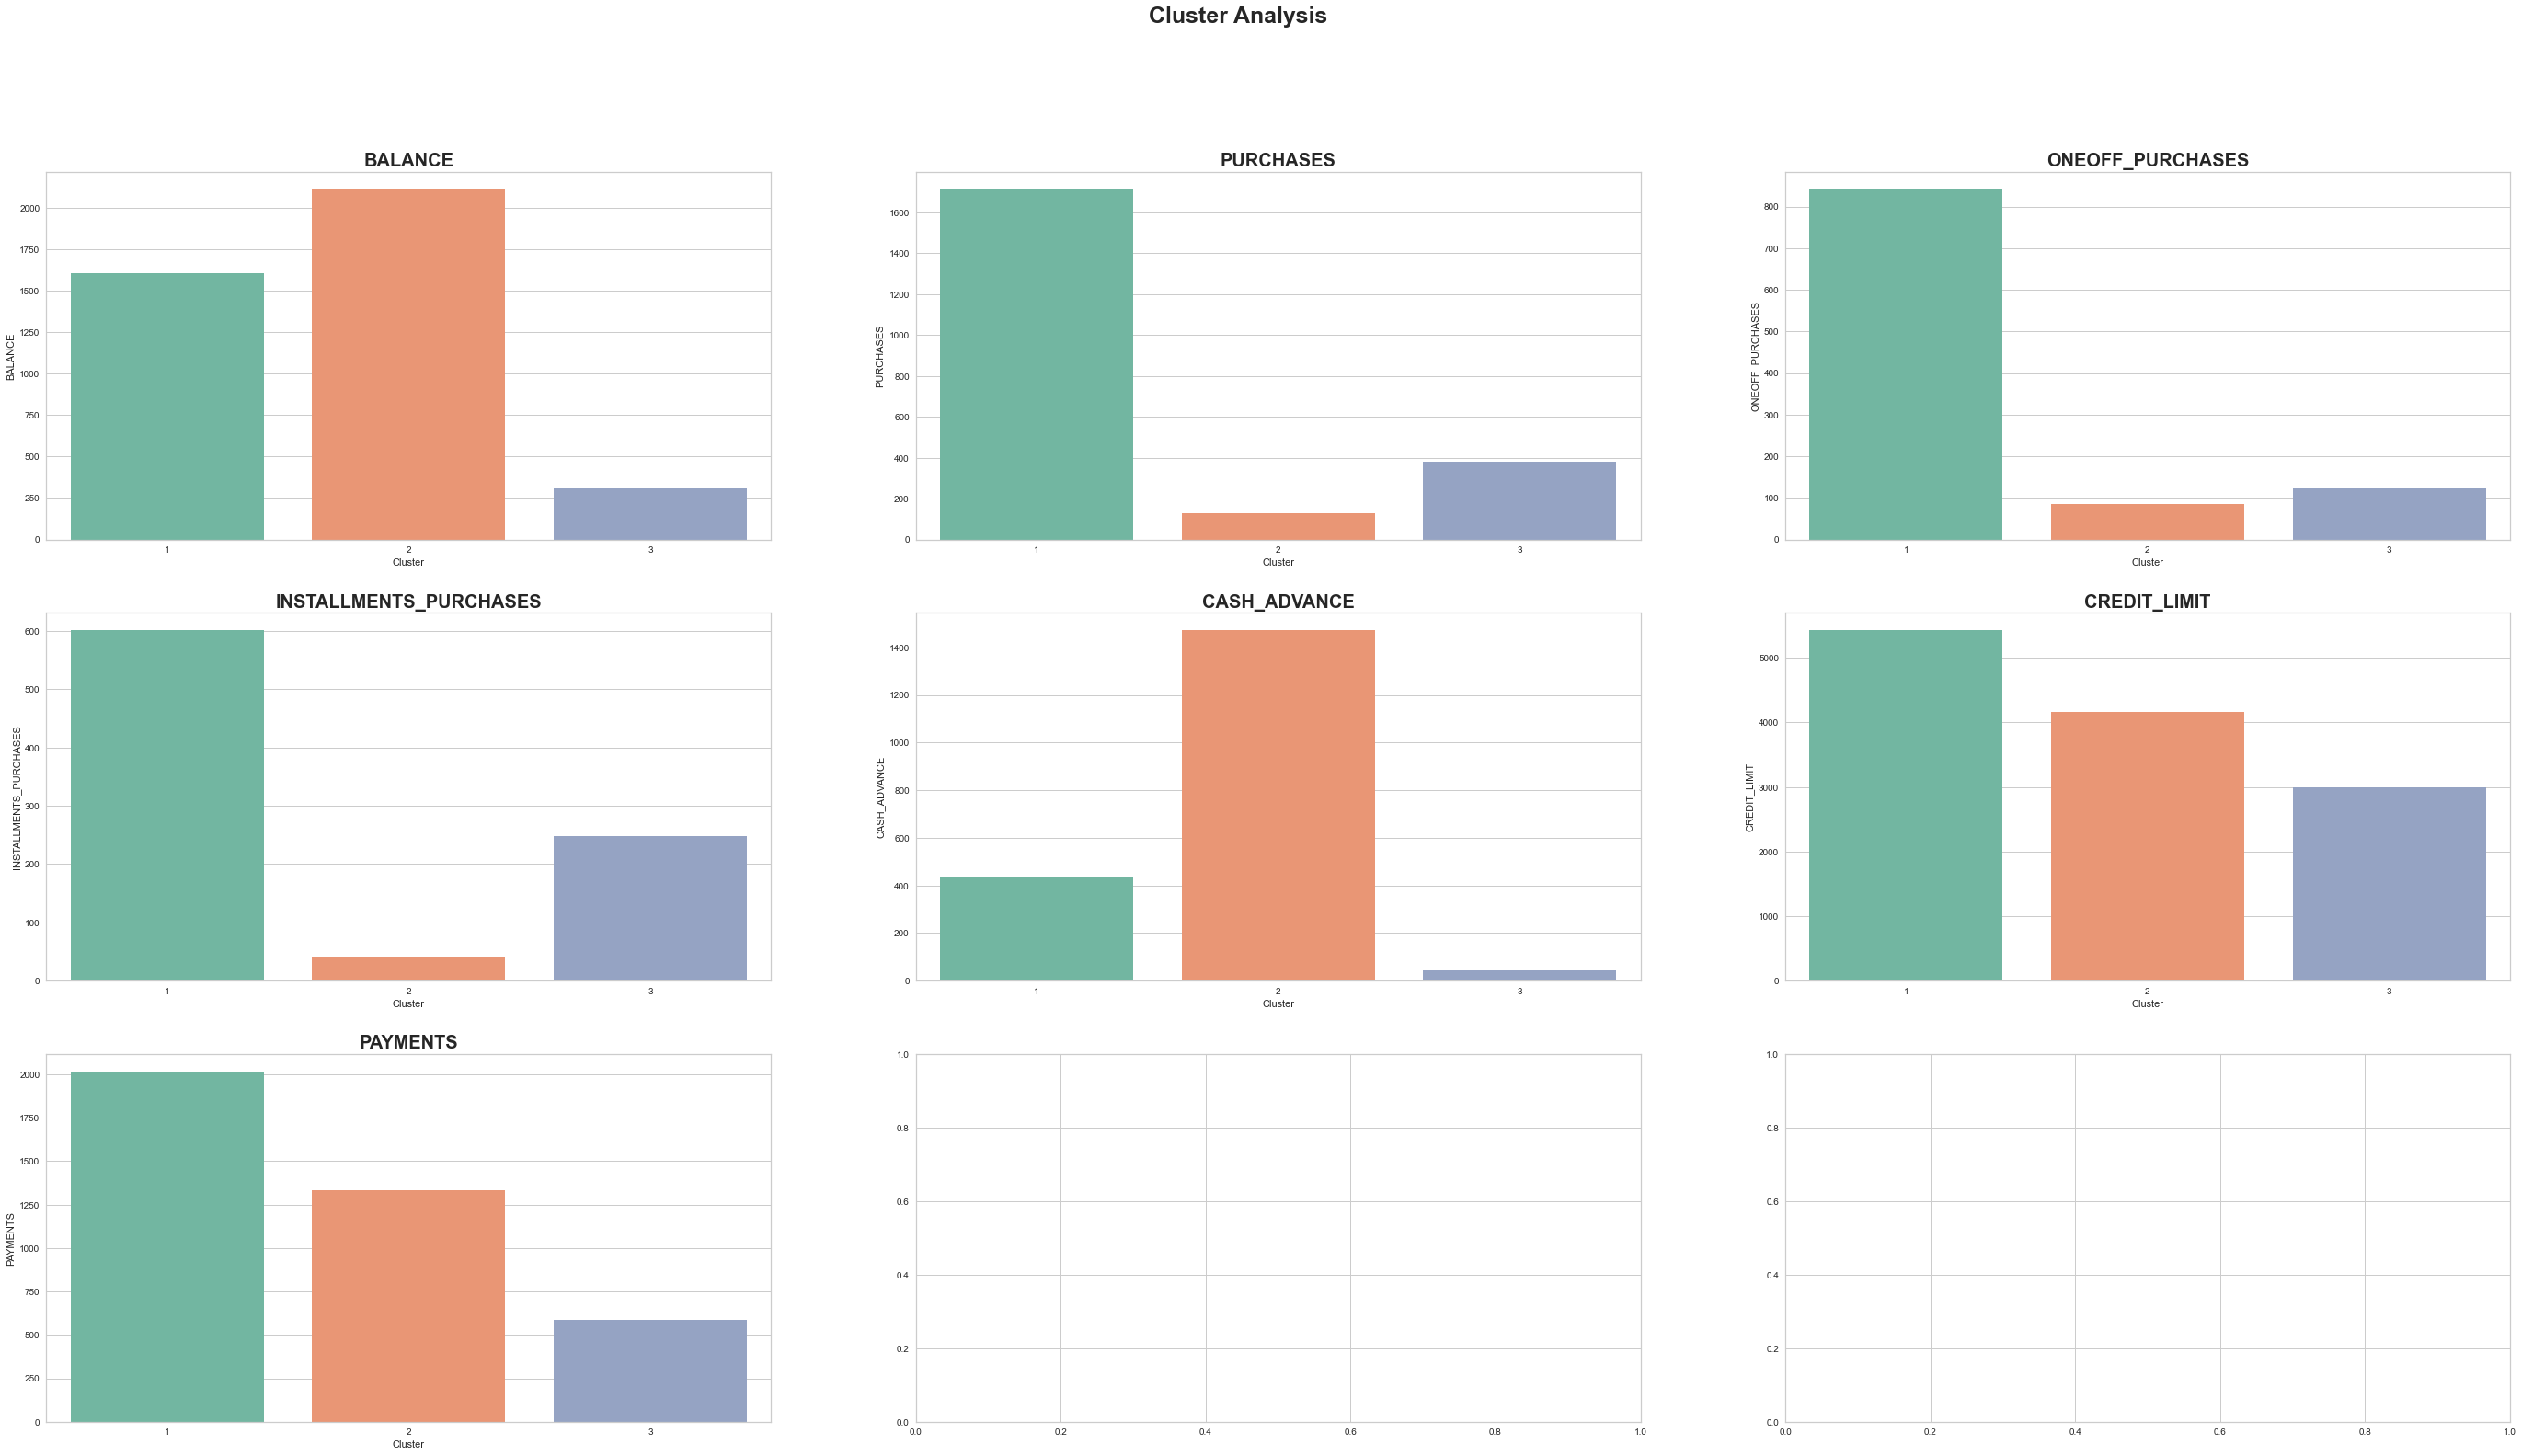

In [106]:
# Cluster Visualizations
fig, ax = plt.subplots(3,3, figsize=(24 * 2, 25))
fig.suptitle('Cluster Analysis', fontsize=25, weight='bold')

sns.barplot(x='Cluster', y='BALANCE', data=df_EDA_, palette='Set2', ax=ax[0,0])
ax[0,0].set_title('BALANCE', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='PURCHASES', data=df_EDA_, palette='Set2', ax=ax[0,1])
ax[0,1].set_title('PURCHASES', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='ONEOFF_PURCHASES', data=df_EDA_, palette='Set2', ax=ax[0,2])
ax[0,2].set_title('ONEOFF_PURCHASES', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='INSTALLMENTS_PURCHASES', data=df_EDA_, palette='Set2', ax=ax[1,0])
ax[1,0].set_title('INSTALLMENTS_PURCHASES', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='CASH_ADVANCE', data=df_EDA_, palette='Set2', ax=ax[1,1])
ax[1,1].set_title('CASH_ADVANCE', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='CREDIT_LIMIT', data=df_EDA_, palette='Set2', ax=ax[1,2])
ax[1,2].set_title('CREDIT_LIMIT', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='PAYMENTS', data=df_EDA_, palette='Set2', ax=ax[2,0])
ax[2,0].set_title('PAYMENTS', fontsize=20, weight='bold')

plt.show()

**Cluster Analysis**

I decide to focus on `Median Value` of each features to describe each cluster charachteristics.

**Cluster 1 Characteristics**
- Medium to High `BALANCE` level in their account
- High `PURCHASES` amount 
- High `ONEOFF_PURCHASES` amount
- High `INSTALLMENT_PURCHASE` amount
- Medium `CASH_ADVANCE` amount
- High `CREDIT_LIMIT` level
- High `PAYMENTS` amount

**Cluster 2 Characteristics**
- High `BALANCE` level in their account
- Lowest `PURCHASES` amount
- Lowest `ONEOFF_PURCHASES` amount
- Lowest `INSTALLMENT_PURCHASE` amount
- High `CASH_ADVANCE` amount
- Medium `CREDIT_LIMIT` level
- Medium `PAYMENTS` amount

**Cluster 3 Characteristics**
- Low `BALANCE` level in their account
- Low `PURCHASES` amount
- Low `ONEOFF_PURCHASES` amount
- Medium `INSTALLMENT_PURCHASE` amount
- Lowest `CASH_ADVANCE` amount
- Low `CREDIT_LIMIT` level
- Low `PAYMENTS` amount

### Final Conclusion

Based on charachteristics above, I can say that:

**Cluster 1 is Power User**

- They `actively use credit card` to pay for their purchases, wether to pay it `using oneoff purchase or installments purchase`.
- They `sometimes borrow money` from cash advance service too.
- They have high credit limit and never forget to pay their credit cards.

**Cluster 2 is Borrower User**

- They `rarely use credit card` to pay for their purchases.
- They `mostly use credit card to borrow money` from cash advance service.
- They have medium credit limit and  pay their credit cards.

**Cluster 3 is Casual User**

- They `seldomly use credit card` to pay for their purchases, If they use it, they tends choose to use `via insallment purchase`.
- They `hardly use credit card to borrow money` from cash advance service.
- They have low to medium credit limit and pay their credit cards.

## X. Model Inference

Before use inference dataset into the model, I'll need to check any `missing values` and do `feature engineering` so the dataset is able to be put inside the model.

In [107]:
# Missing Values
inf_set.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

The dataset is free from any missing values. Now let's continue to `features engineering` process.

In [108]:
#  Scaling Process
inf_scaled = scaler.transform(inf_set_num)

# Power Transformation process
inf_Powered = power.transform(inf_set_range)

# Encoding Process
inf_encoded = encoder.transform(inf_set_cat)

# Concatenate the scaled and transformed data
inf_scaled = np.concatenate((inf_scaled, inf_Powered), axis=1)

In [109]:
# Normalize the dataset
inf_scaled = normalizer.transform(inf_scaled)

In [110]:
# PCA Process
inf_reduced = pca_trial.transform(inf_scaled)

In [111]:
# Concate train_set_num and train_set_range
inf_set_numrange = inf_set[num_col + num_range_col]

After completing the preparation step, let's see how's the result

In [112]:
# Clustering the Dataset
pred = km.predict(inf_reduced)

km_inf_clustered = inf_set_numrange.copy()
km_inf_clustered['Cluster'] = pred + 1

In [113]:
# Visualization of the clusters
pca = PCA(n_components=3)
pca_data = pca.fit_transform(inf_reduced)
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1','PCA2', 'PCA3'])
pca_df['Cluster'] = pred + 1

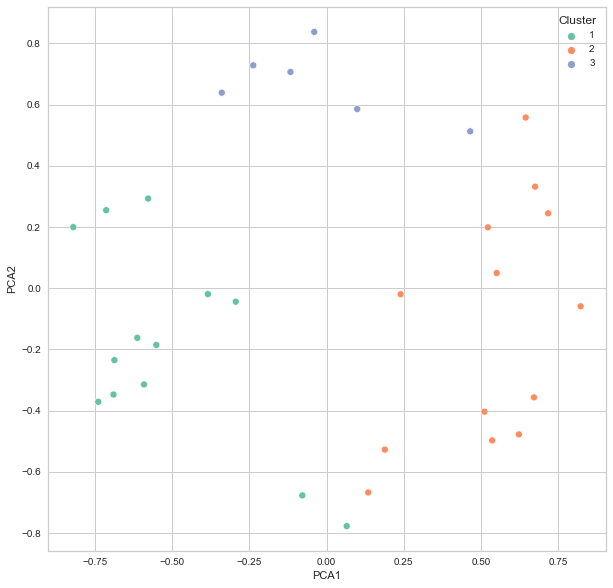

In [114]:
# Result Visualization
plt.figure(figsize=(10,10))

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, legend='full', palette='Set2')

plt.show()

Based from result above, the model is successfully able to cluster the dataset into 3 clusters.

## XI. Conclusion

Here are the recap of this project

## EDA Analysis

### **Univariate Analysis**


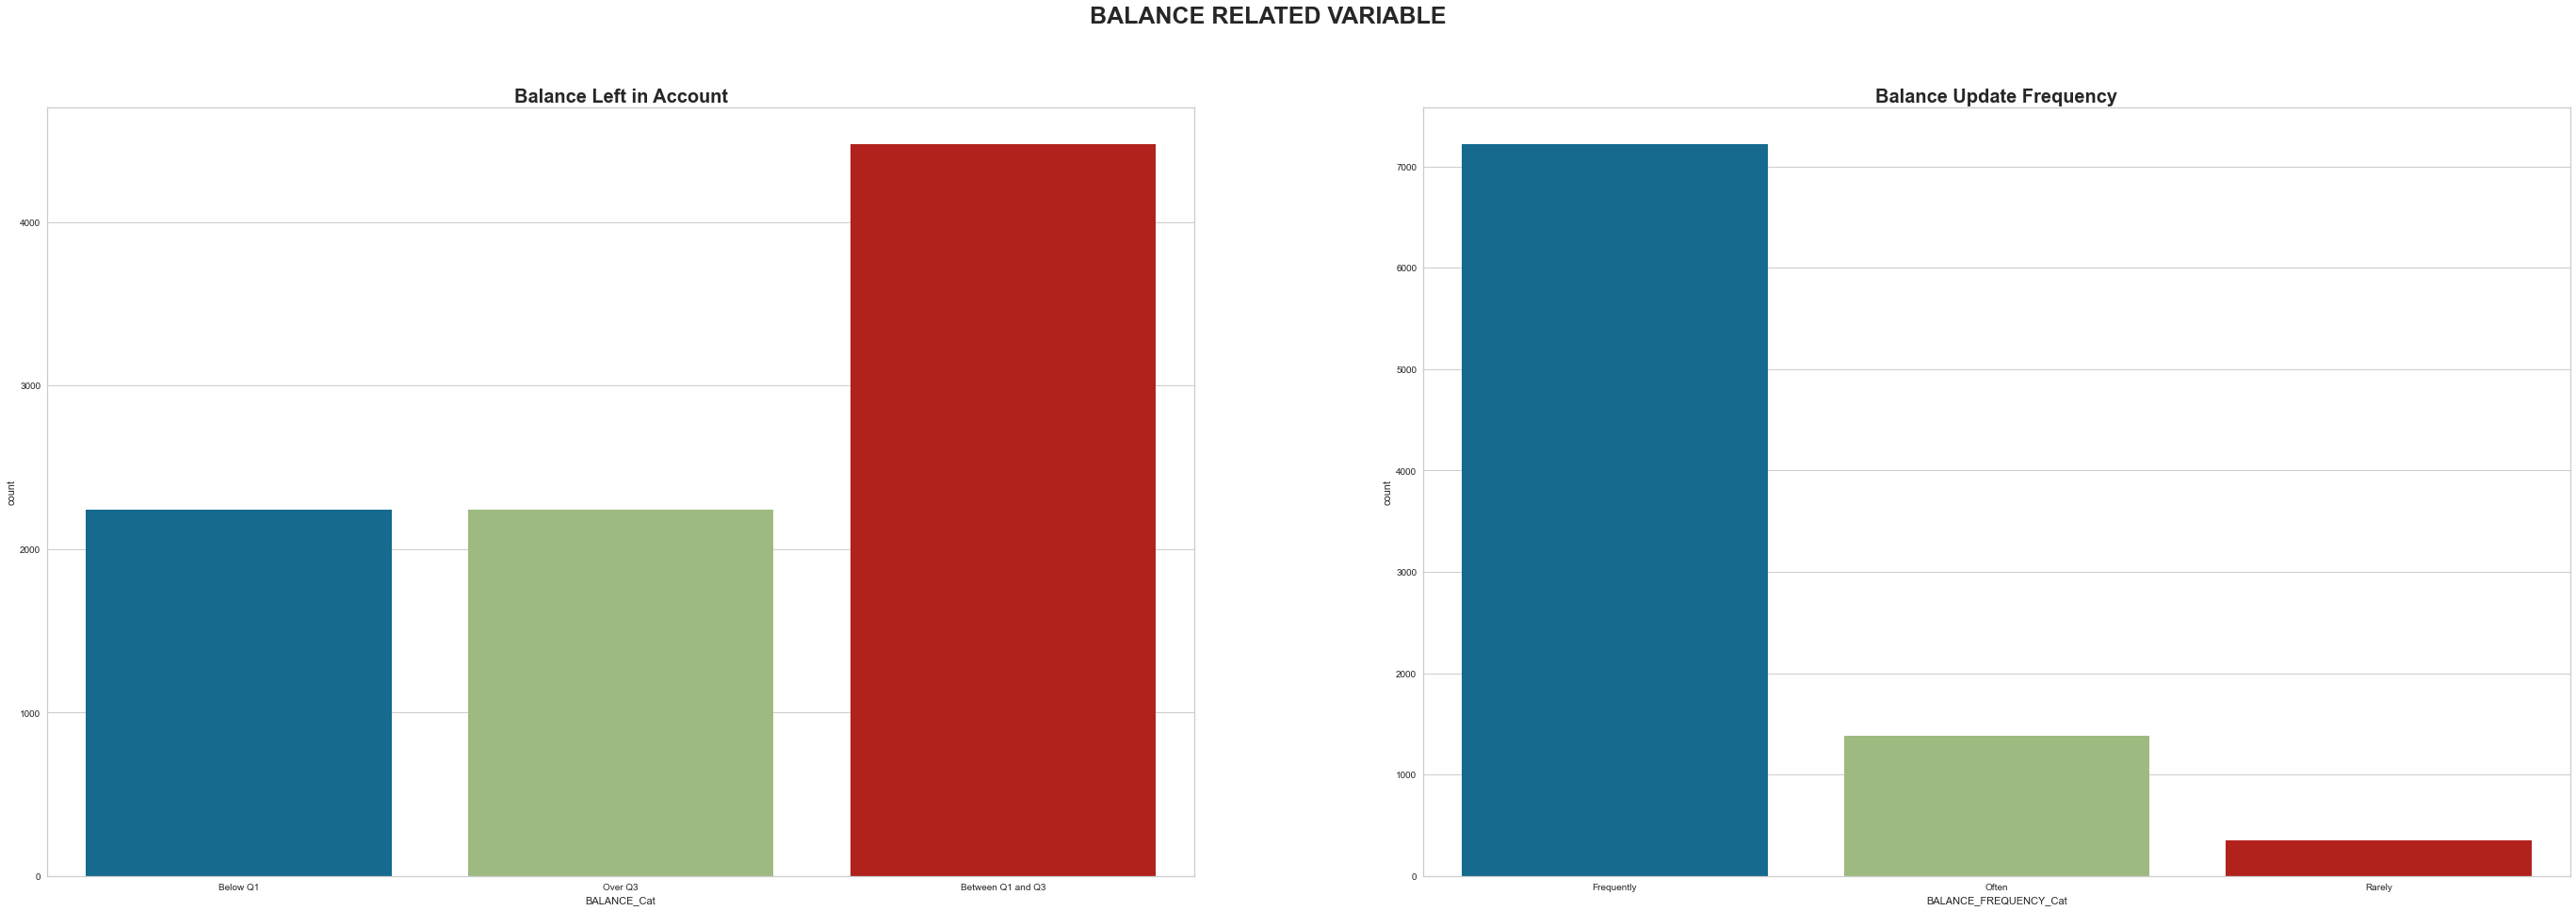

In [115]:
# Univariate Analysis
# Balance Related Variable
fig, ax = plt.subplots(1,2, figsize=(24 * 2, 15))
fig.suptitle('BALANCE RELATED VARIABLE', fontsize=25, weight='bold')

sns.countplot(x='BALANCE_Cat', data=df_temp, ax=ax[0])
ax[0].set_title('Balance Left in Account', weight='bold', fontsize=20)

sns.countplot(x='BALANCE_FREQUENCY_Cat', data=df_temp, ax=ax[1])
ax[1].set_title('Balance Update Frequency', weight='bold', fontsize=20)

plt.show()

- From graph on the left We can see that majority of the customer has balance in their account around $128.88 to $2054.14, also there are equal amount of customer with balance less than $128.88 and greater than $2054.14.
- From graph on the rigth we can see that the balance in the account is frequently updated, this could mean that customer is actively made transactions.

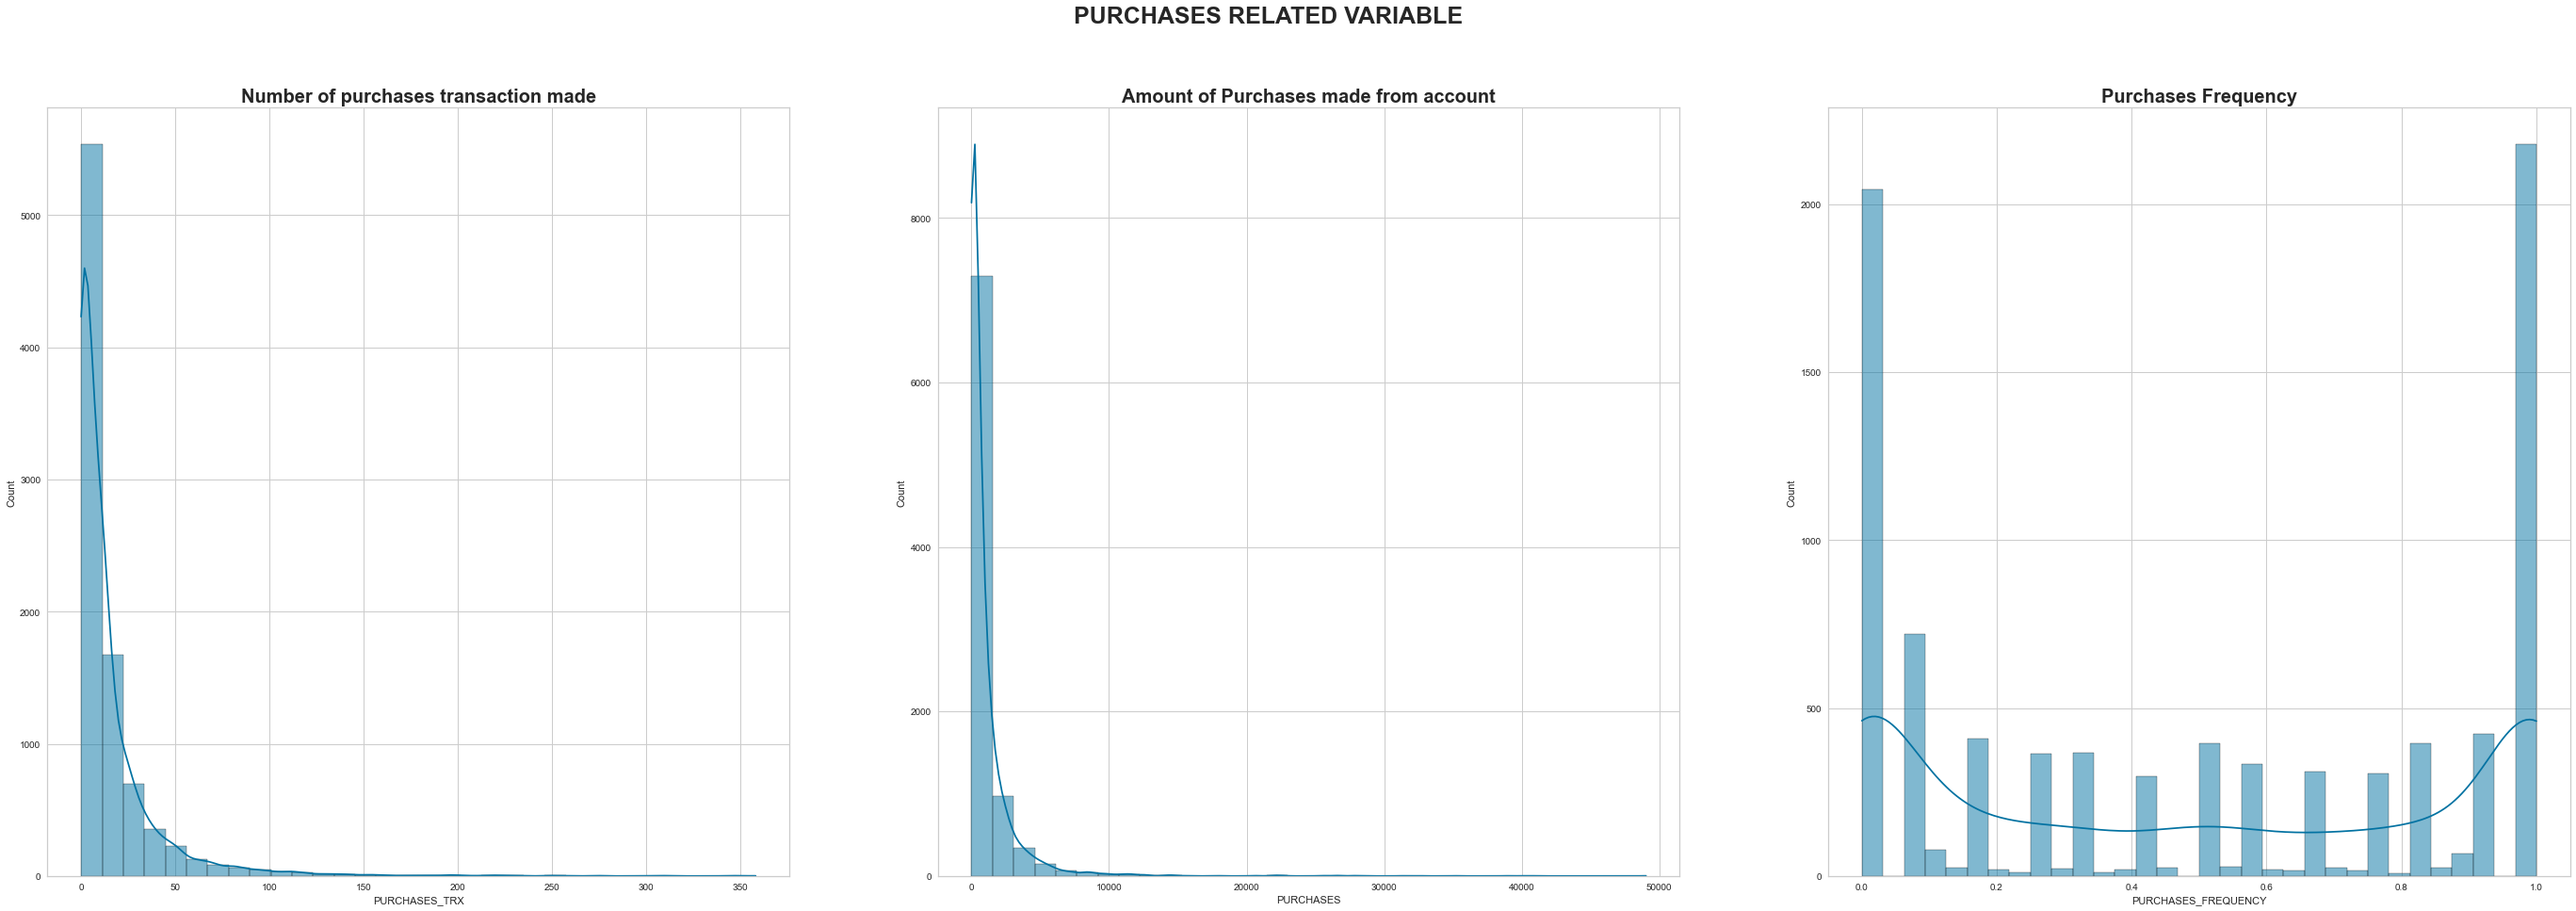

In [116]:
# Univariate Analysis
fig, ax = plt.subplots(1,3, figsize=(24 * 2, 15))
fig.suptitle('PURCHASES RELATED VARIABLE', fontsize=25, weight='bold')
bins= 32

sns.histplot(df.PURCHASES_TRX, kde=True, ax=ax[0], bins=bins)
ax[0].set_title('Number of purchases transaction made', weight='bold', fontsize=20)

sns.histplot(df.PURCHASES, kde=True, ax=ax[1], bins=bins)
ax[1].set_title('Amount of Purchases made from account', weight='bold', fontsize=20)

sns.histplot(df.PURCHASES_FREQUENCY, kde=True, ax=ax[2], bins=bins)
ax[2].set_title('Purchases Frequency', weight='bold', fontsize=20)

plt.show()

- From the graph in the left We can see that `PURCHASES_TRX` is extremely skewed to the right. We can see that the majority of people made purchase transaction below 50 times and there are handful of people who made purchase transaction above 50 times.
- From the graph in the middle We can see that `PURCHASES` is extremely skewed to the right. We can see that the majority of people made purchase below $500 and there are handful of people who made purchase above $500.
- From the graph in the right We can see that `Purchase Frequency` is simmetrically distributed

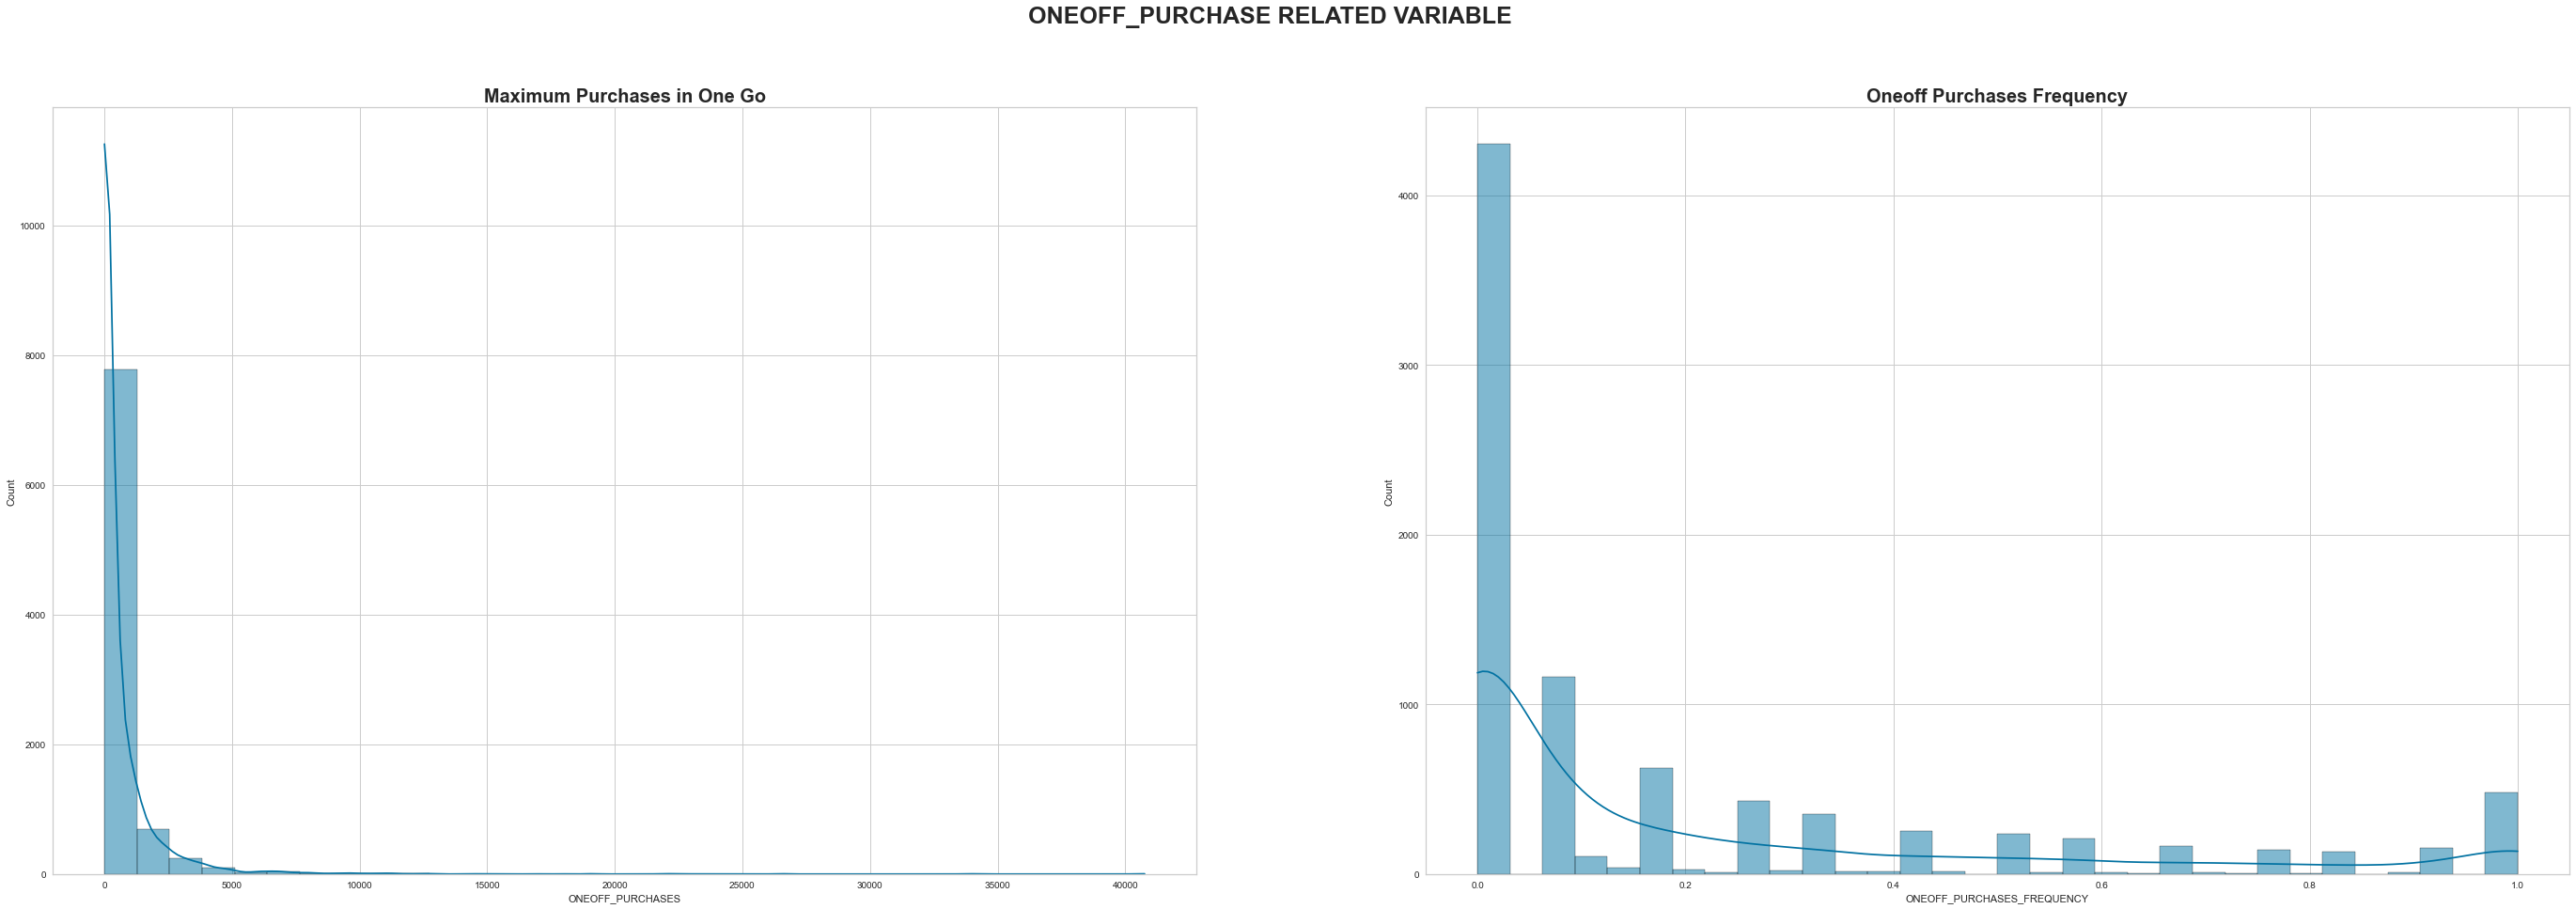

In [117]:
# Univariate Analysis
fig, ax = plt.subplots(1,2, figsize=(24 * 2, 15))
fig.suptitle('ONEOFF_PURCHASE RELATED VARIABLE', fontsize=25, weight='bold')
bins= 32

sns.histplot(df.ONEOFF_PURCHASES, kde=True, ax=ax[0], bins=bins)
ax[0].set_title('Maximum Purchases in One Go', weight='bold', fontsize=20)

sns.histplot(df.ONEOFF_PURCHASES_FREQUENCY, kde=True, ax=ax[1], bins=bins)
ax[1].set_title('Oneoff Purchases Frequency', weight='bold', fontsize=20)

plt.show()

- From graph on the left We can see that the `ONEOFF_PURCHASES` is extremely skewed to the right. We can see that the majority of people made oneoff_purchase transaction below $2500 and there are handful of people who made oneoff_purchase transaction above $2500.
- From graph on the right We can see that the `ONEOFF_PURCHASES_FREQUENCY` is extremely skewed to the right. This means most customer seldomly made purchases by `ONEOFF_PURCHASES`

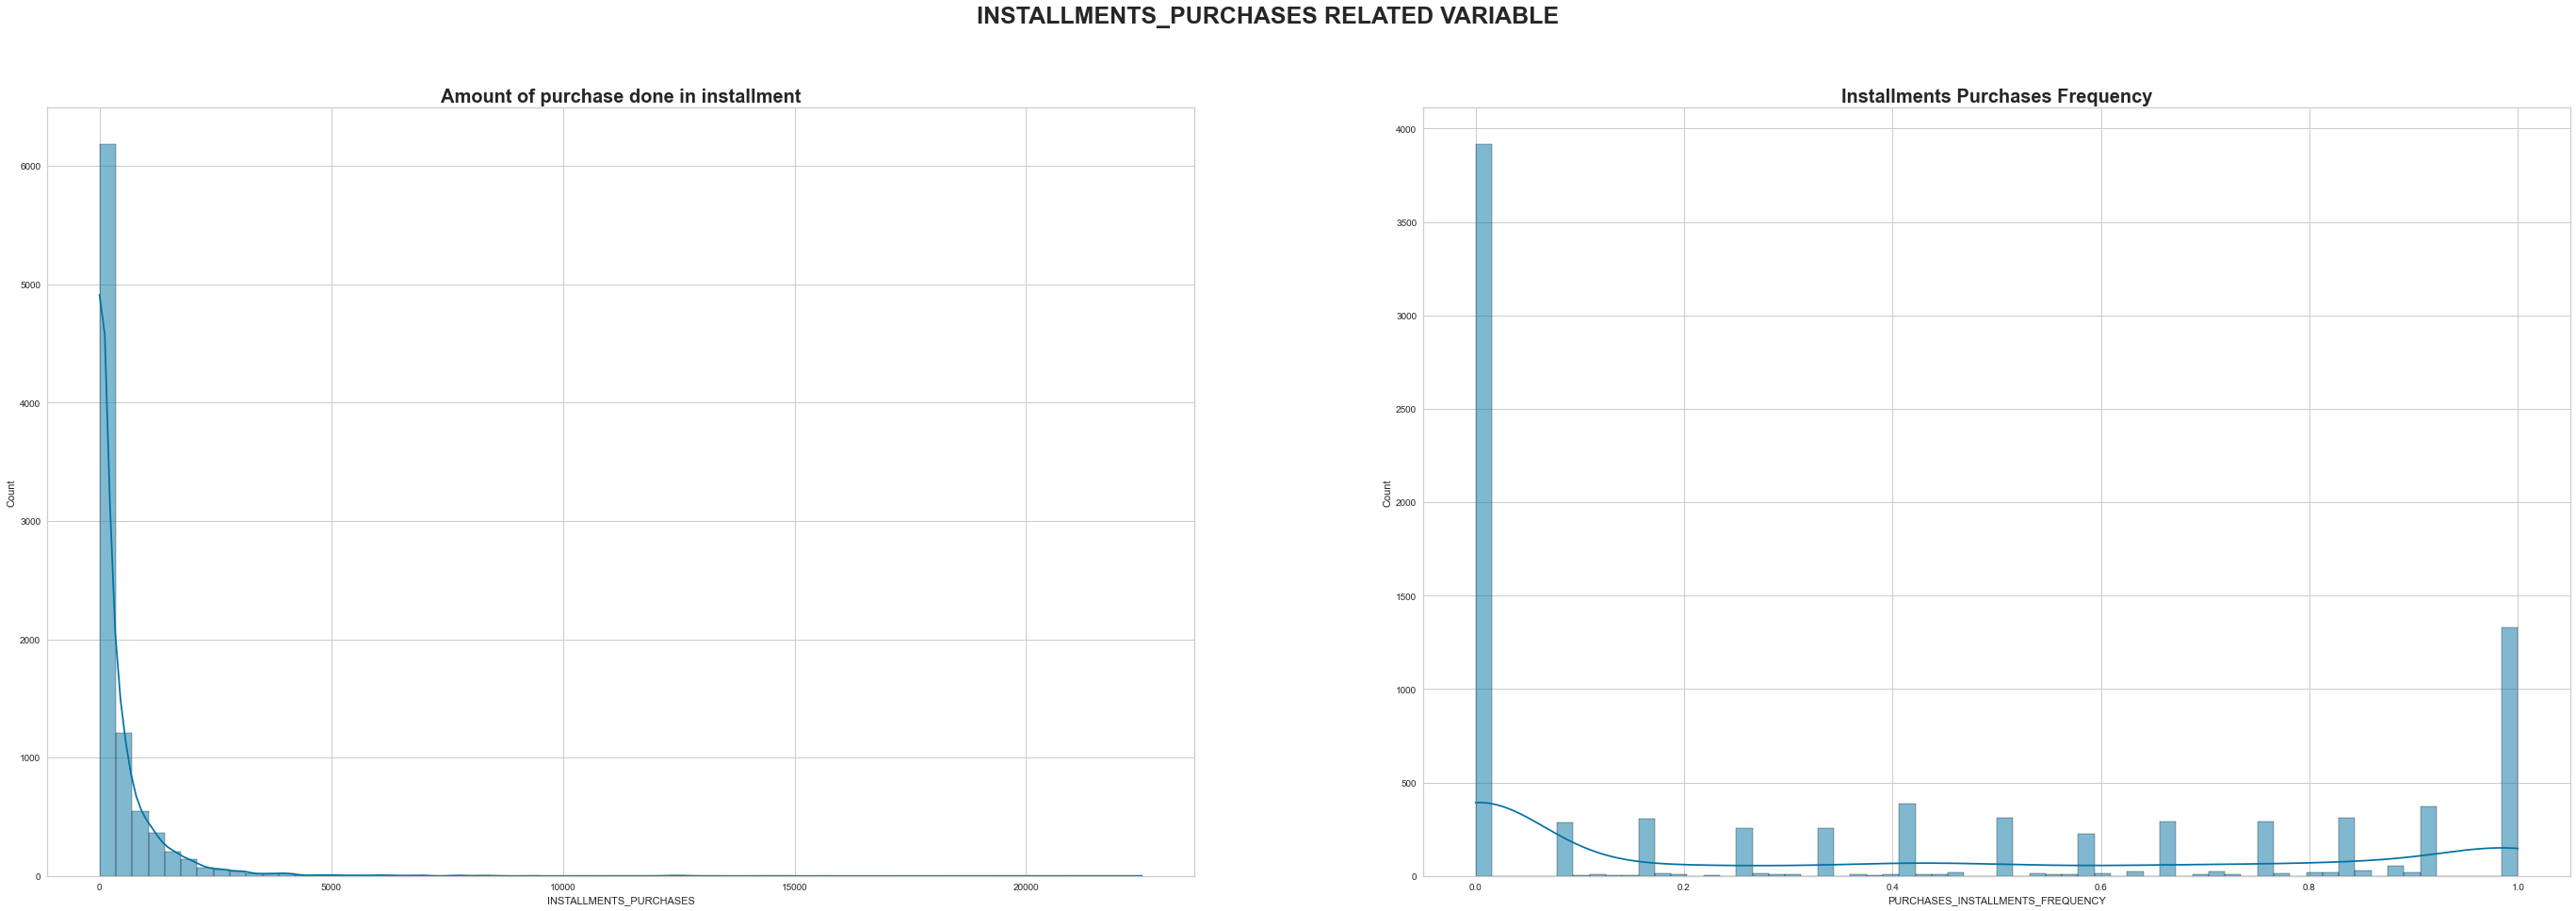

In [118]:
# Univariate Analysis
fig, ax = plt.subplots(1,2, figsize=(24 * 2, 15))
fig.suptitle('INSTALLMENTS_PURCHASES RELATED VARIABLE', fontsize=25, weight='bold')
bins= 64

sns.histplot(df.INSTALLMENTS_PURCHASES, kde=True, ax=ax[0], bins=bins)
ax[0].set_title('Amount of purchase done in installment', weight='bold', fontsize=20)

sns.histplot(df.PURCHASES_INSTALLMENTS_FREQUENCY, kde=True, ax=ax[1], bins=bins)
ax[1].set_title('Installments Purchases Frequency', weight='bold', fontsize=20)

plt.show()

- From graph on the left We can see that the `INSTALLMENTS_PURCHASES` is extremely skewed to the right. We can see that the majority of people who made purchases through `INSTALLMENTS_PURCHASES` are purchases that cost less than $2500 and there are handful of people who made purchase above $2500.
- From graph on the right We can see that the `PURCHASES_INSTALLMENTS_FREQUENCY` is extremely skewed to the right. This means most customer seldomly made purchases using `INSTALLMENTS_PURCHASES`

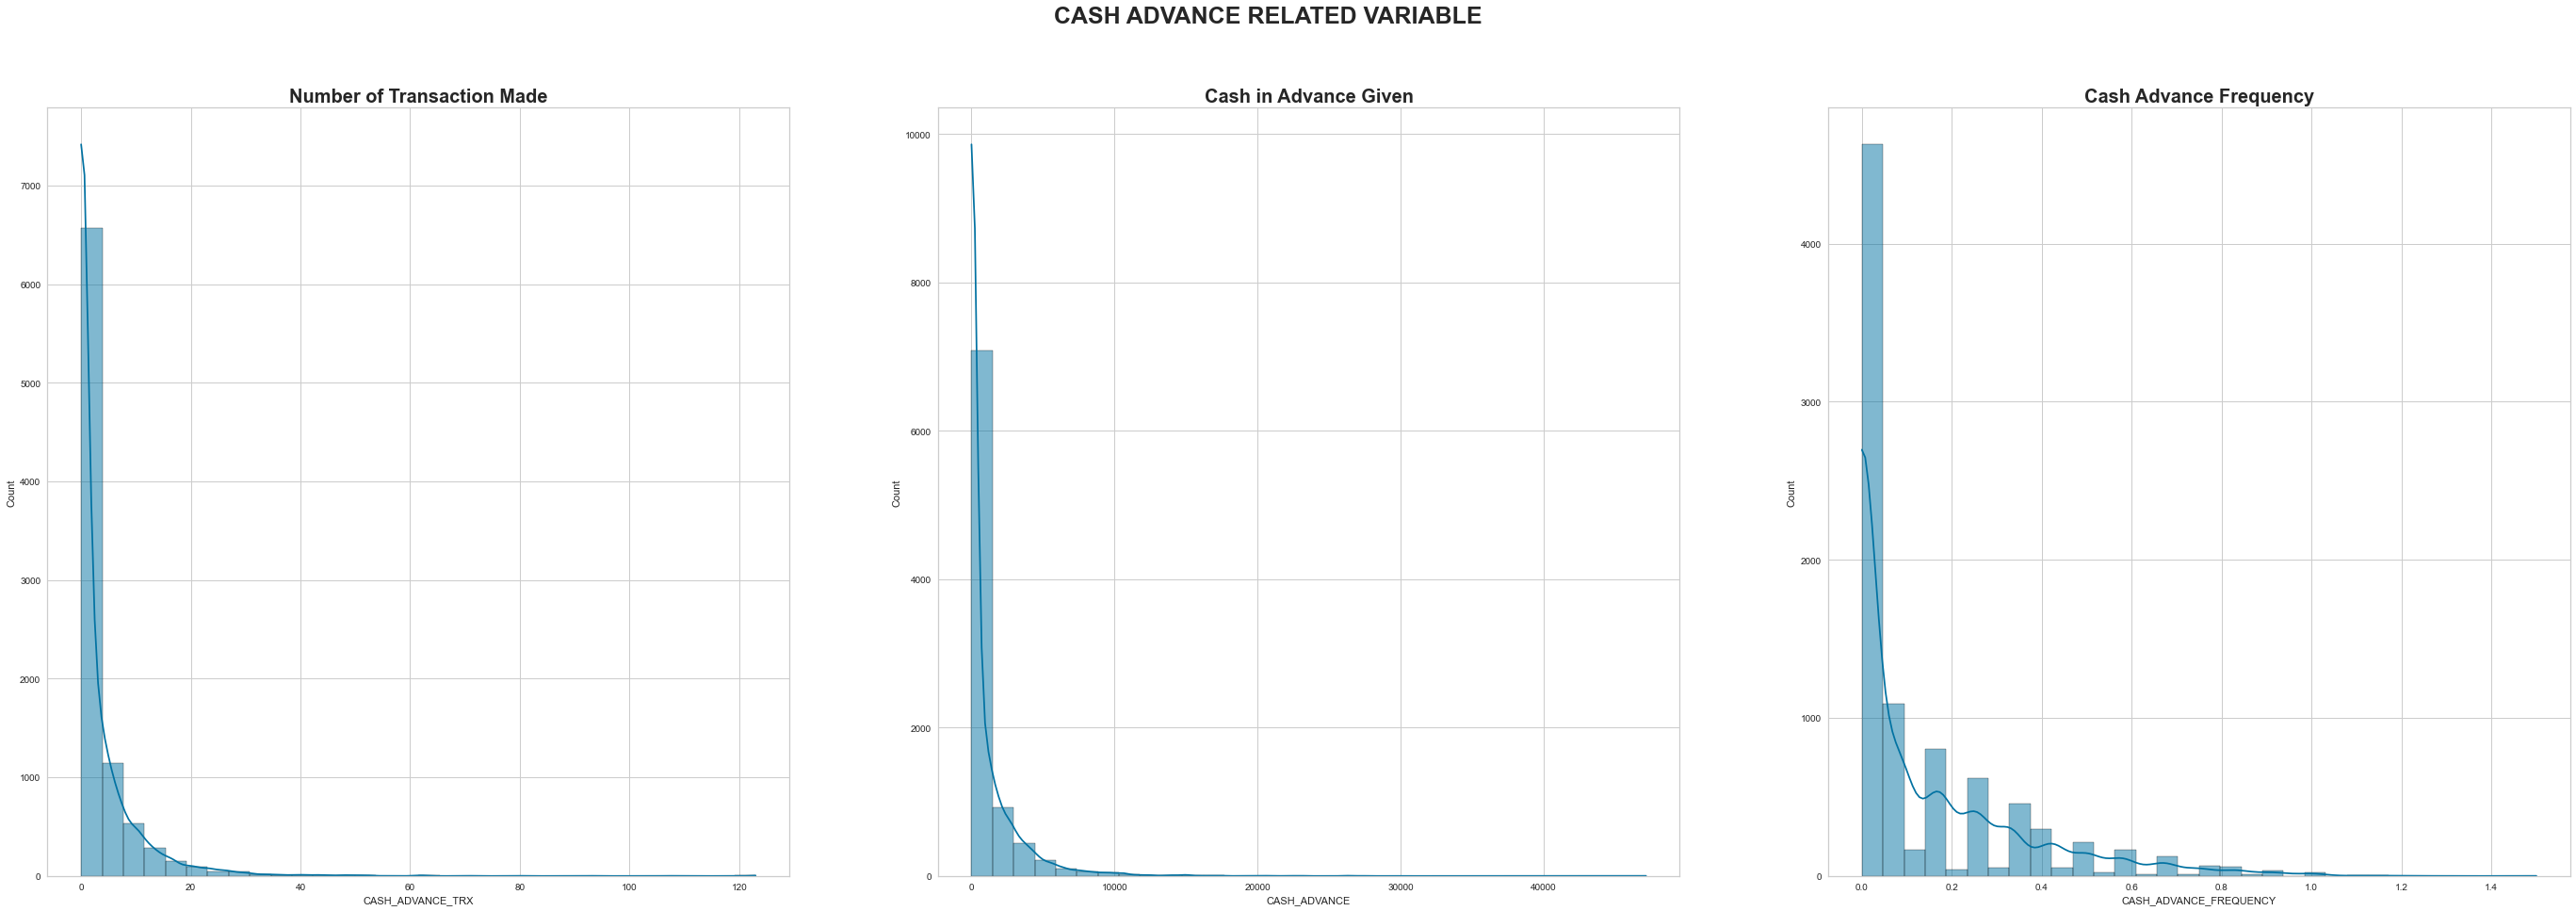

In [119]:
# Univariate Analysis
fig, ax = plt.subplots(1,3, figsize=(24 * 2, 15))
fig.suptitle('CASH ADVANCE RELATED VARIABLE', fontsize=25, weight='bold')
bins= 32

sns.histplot(df.CASH_ADVANCE_TRX, kde=True, ax=ax[0], bins=bins)
ax[0].set_title('Number of Transaction Made', weight='bold', fontsize=20)

sns.histplot(df.CASH_ADVANCE, kde=True, ax=ax[1], bins=bins)
ax[1].set_title('Cash in Advance Given', weight='bold', fontsize=20)

sns.histplot(df.CASH_ADVANCE_FREQUENCY, kde=True, ax=ax[2], bins=bins)
ax[2].set_title('Cash Advance Frequency', weight='bold', fontsize=20)

plt.show()

- From the graph on the left We can see that the `CASH_ADVANCE_TRX` is extremely skewed to the right. This means there is not much customer uses `CASH_ADVANCE` service.
- From the graph on the middle We can see that the `CASH_ADVANCE` is extremely skewed to the right. This means most customer that use `CASH_ADVANCE` is borrowing money that is less than $5000, but there are also handful of people who borrowed money above $5000.
- From the graph on the right We can see that the `CASH_ADVANCE_FREQUENCY` is extremely skewed to the right. This means most customer seldomly using `CASH_ADVANCE` service

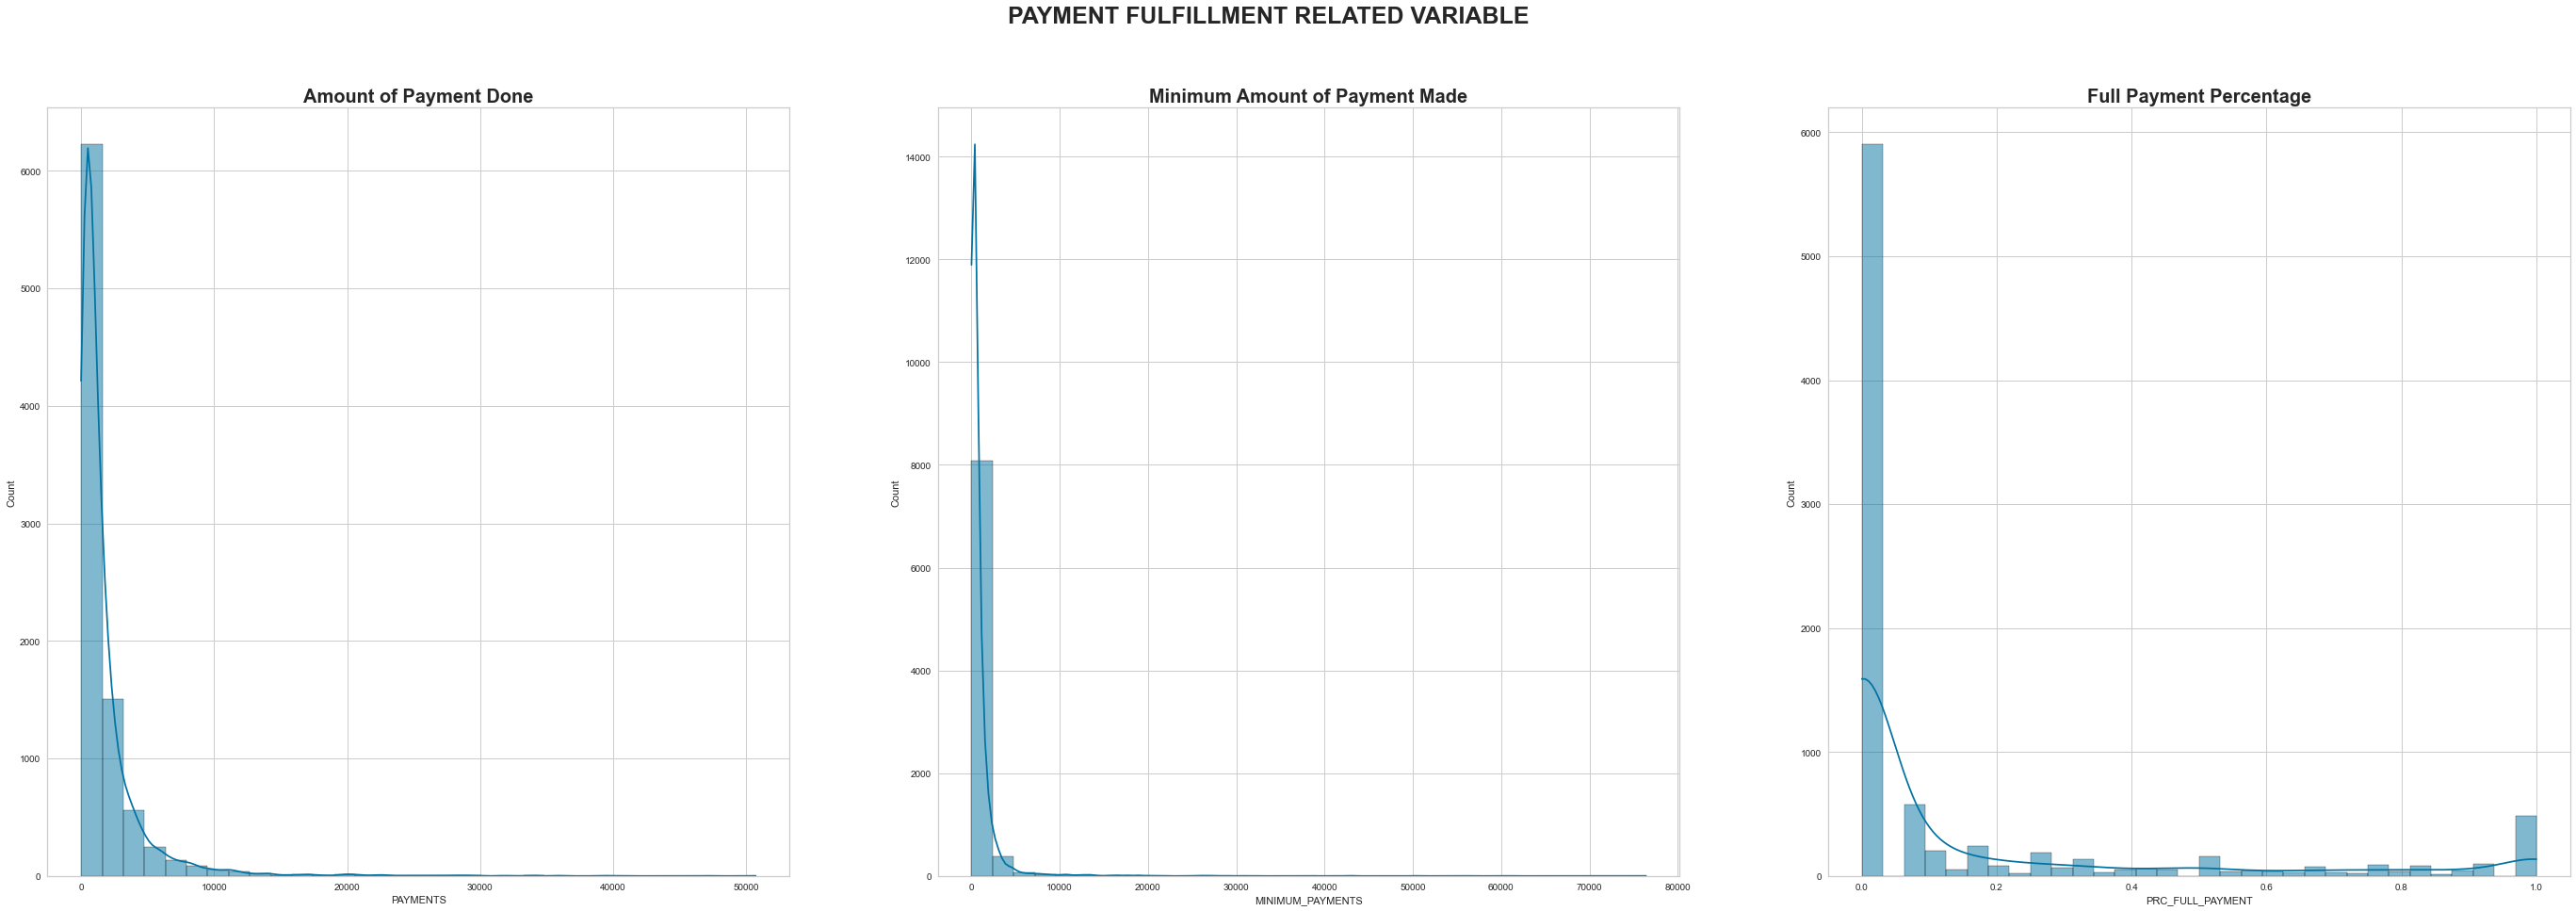

In [120]:
# Univariate Analysis
fig, ax = plt.subplots(1,3, figsize=(24 * 2, 15))
fig.suptitle('PAYMENT FULFILLMENT RELATED VARIABLE', fontsize=25, weight='bold')
bins= 32

sns.histplot(df.PAYMENTS, kde=True, ax=ax[0], bins=bins)
ax[0].set_title('Amount of Payment Done', weight='bold', fontsize=20)

sns.histplot(df.MINIMUM_PAYMENTS, kde=True, ax=ax[1] , bins=bins)
ax[1].set_title('Minimum Amount of Payment Made', weight='bold', fontsize=20)

sns.histplot(df.PRC_FULL_PAYMENT, kde=True, ax=ax[2] , bins=bins)
ax[2].set_title('Full Payment Percentage', weight='bold', fontsize=20)

plt.show()

- From the graph on the left We can see that the `PAYMENTS` is extremely skewed to the right.
- From the graph on the middle We can see that the `MINIMUM_PAYMENTS` is extremely skewed to the right.
- From the graph on the right We can see that the `PRC_FULL_PAYMENT` is extremely skewed to the right. This simply means that most percentage is around 0-10%.

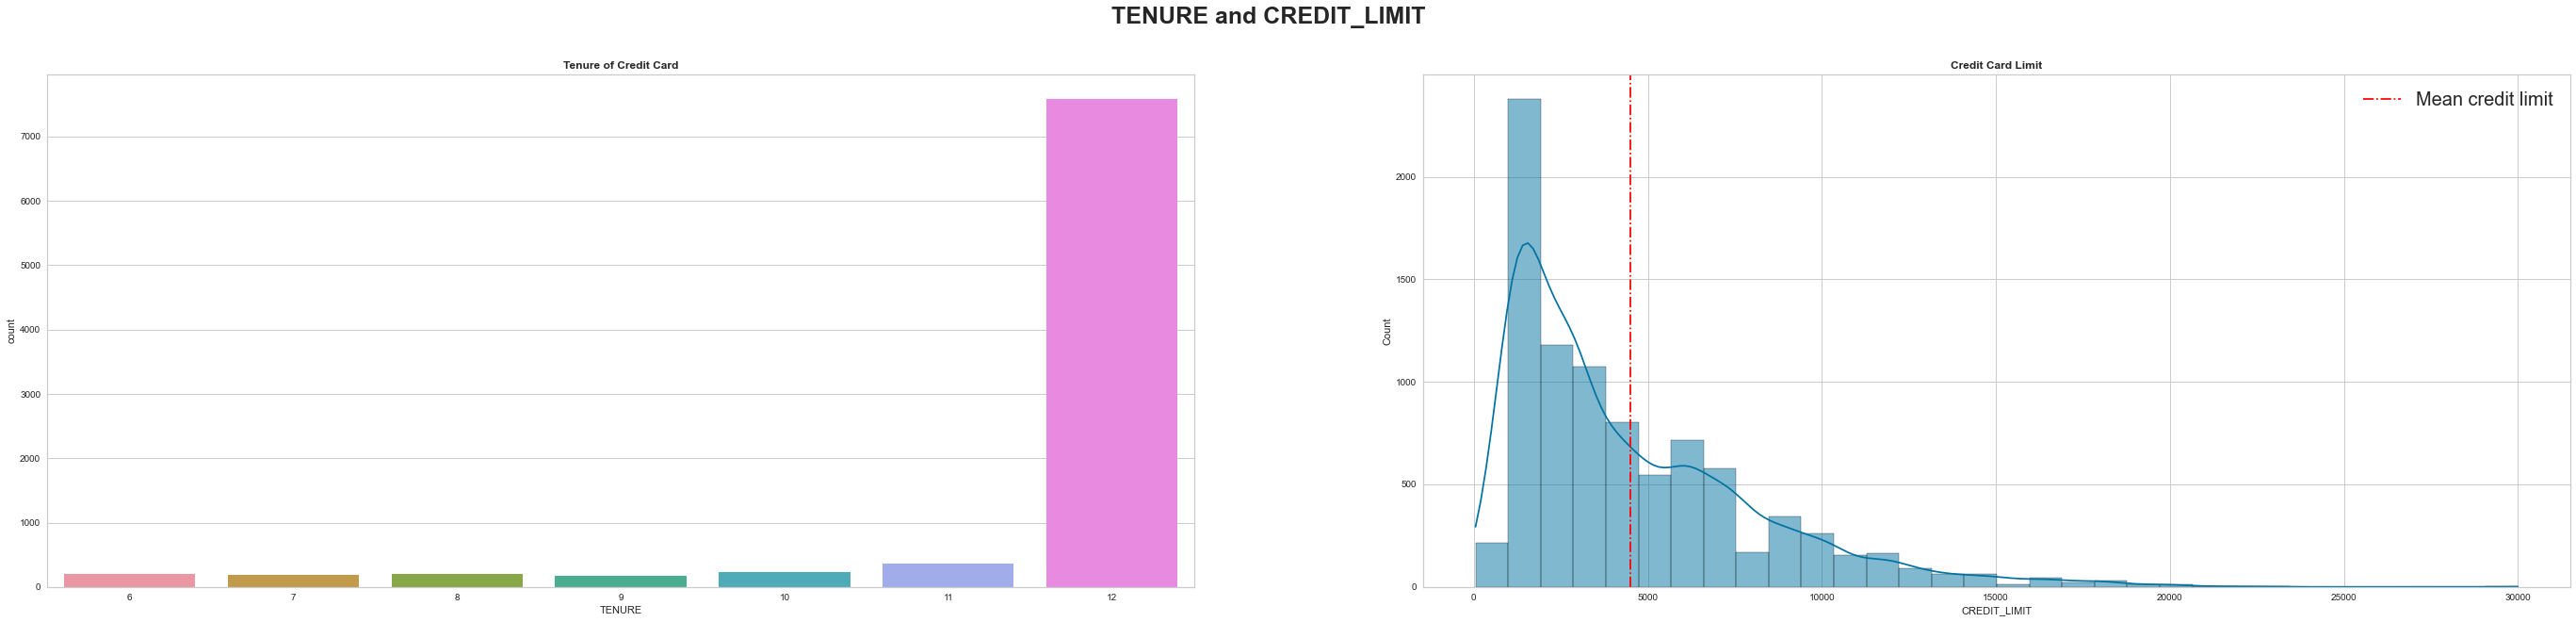

In [121]:
# Univariate Analysis
fig, ax = plt.subplots(1,2, figsize=(24 * 2, 10))
fig.suptitle('TENURE and CREDIT_LIMIT', fontsize=25, weight='bold')
bins = 32

sns.countplot(df.TENURE, ax=ax[0])
ax[0].set_title('Tenure of Credit Card', weight='bold')

sns.histplot(df.CREDIT_LIMIT, kde=True, ax=ax[1], bins=bins)
ax[1].set_title('Credit Card Limit', weight='bold')
ax[1].axvline(x=df['CREDIT_LIMIT'].mean(), color='red', linestyle='dashdot', label='Mean credit limit')

plt.legend(fontsize=20)
plt.show()

- From graph on the left, We can see that majority of people has 12 months for their credit card `TENURE`.
- From graph on the right, We can see that majority of people (63%) has `CREDIT_LIMIT` between $0 to $4500, only several of people (37%) has credit limit above $4500.

### **Bivariate Analysis**

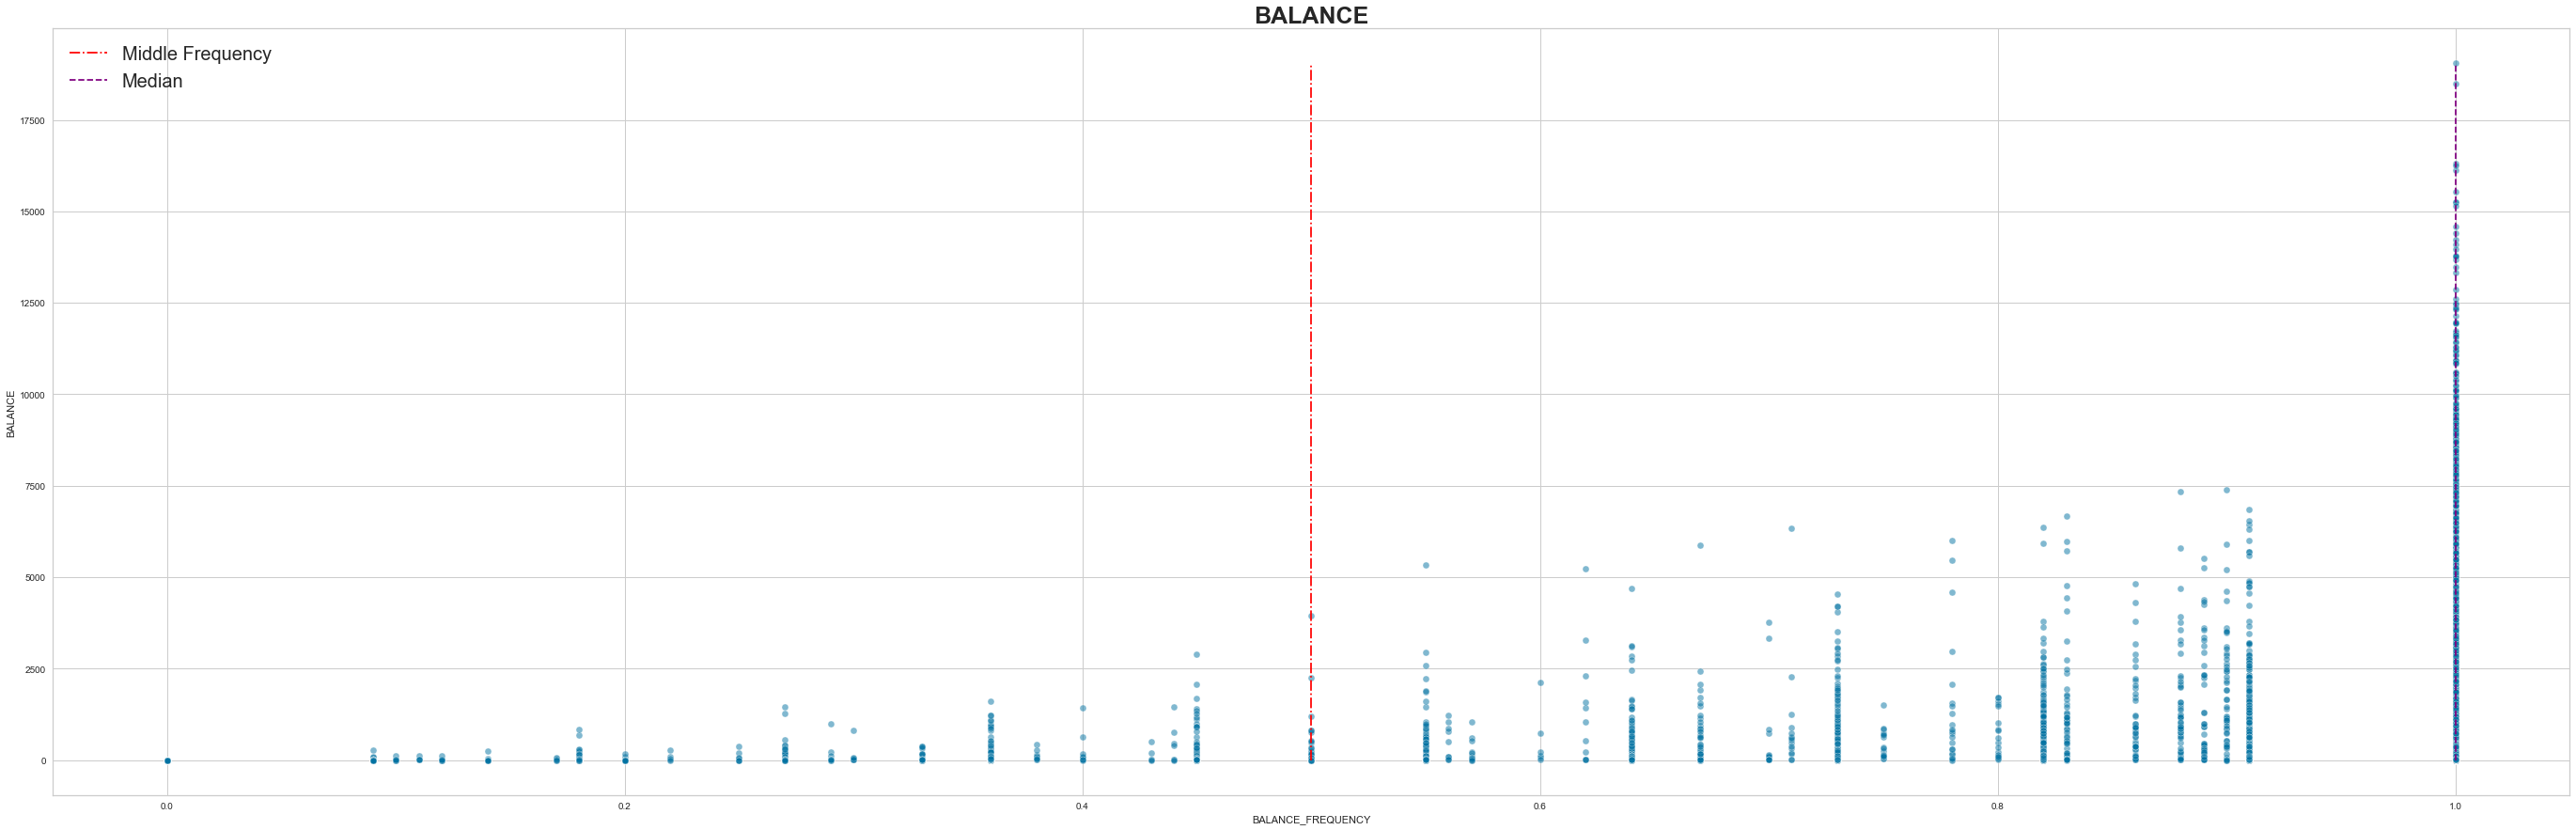

In [122]:
# Bivariate Analysis
# Balance Related Variable
plt.figure(figsize=(24 * 2, 15))
plt.title('BALANCE', weight='bold', fontsize=25)

sns.scatterplot(data=df, x='BALANCE_FREQUENCY', y='BALANCE', alpha=0.5)
plt.vlines(x=0.5, ymin=0, ymax=df['BALANCE'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['BALANCE_FREQUENCY'].quantile(0.5), ymin=0, ymax=df['BALANCE'].max(), color='purple', linestyle='dashed', label='Median')

plt.legend(fontsize=20)
plt.show()

- If We take a quick look, We can see that there are more plots on the right of the red line than to the left. This confirmed by the `Median` lines that is positioned on the far right.
- This tells us that most customer actively use their account for transactions hence frequent update made to their account balance.
- I can assume customer with low balance (< $2500) and has low balance frequency (< 0.3) are not our active customer or in other words they do not use our service as their main choice.

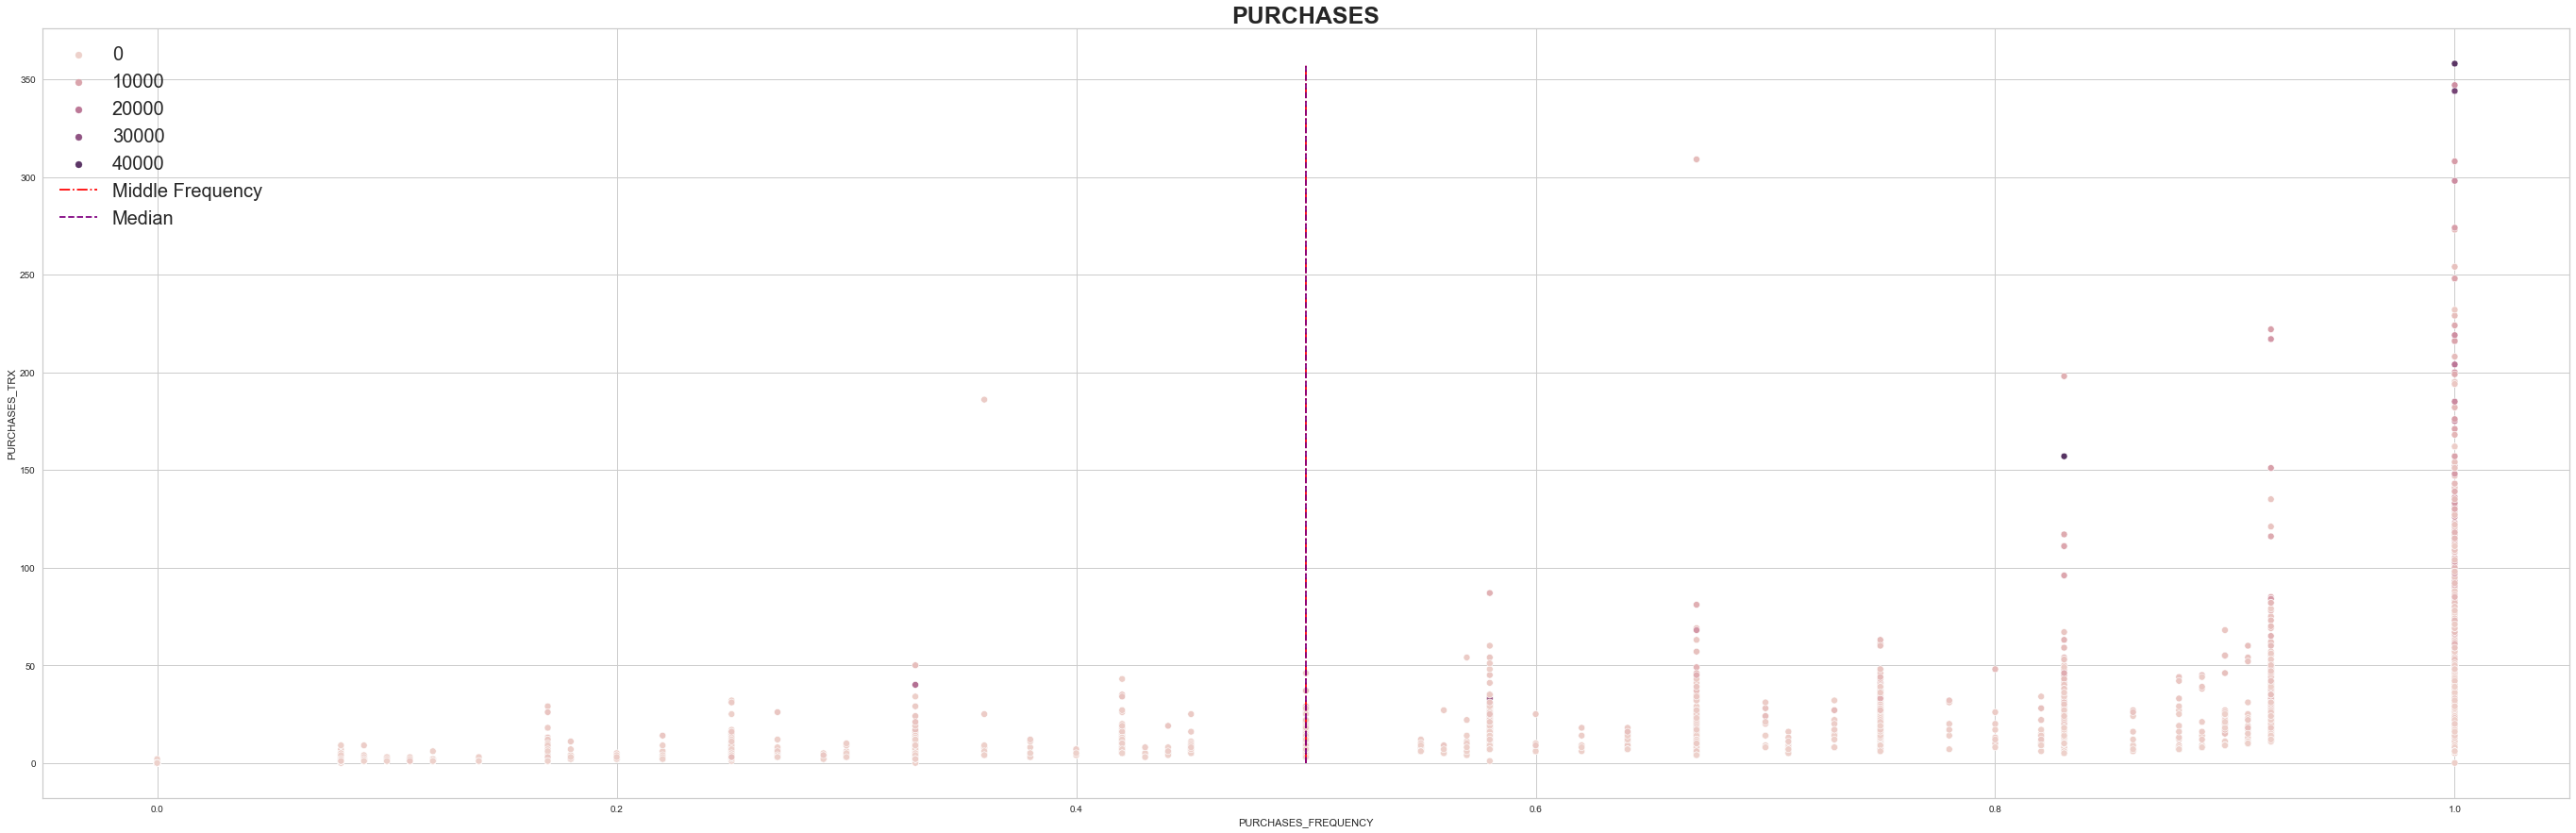

In [123]:
# Bivariate Analysis
plt.figure(figsize=(24 * 2, 15))
plt.title('PURCHASES', weight='bold', fontsize=25)

sns.scatterplot(data=df, x='PURCHASES_FREQUENCY', y='PURCHASES_TRX', hue='PURCHASES')
plt.vlines(x=0.5, ymin=0, ymax=df['PURCHASES_TRX'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['PURCHASES_FREQUENCY'].quantile(0.5), ymin=0, ymax=df['PURCHASES_TRX'].max(), color='purple', linestyle='dashed', label='Median')

plt.legend(fontsize=20)
plt.show()

- If We take a quick look, We can see that the plots are equally distributed between the left and right side. This confirmed by the `Median` lines that is positioned on the middle.
- We can see the amount of purchases made through the color of the plot, the darker it gets the more purchases made.
- We can see that as the `PURCHASE_FREQUENCY` gets higher, We will found customer that made higher `PURCHASES_TRX` and made higher `PURCHASES` amount.

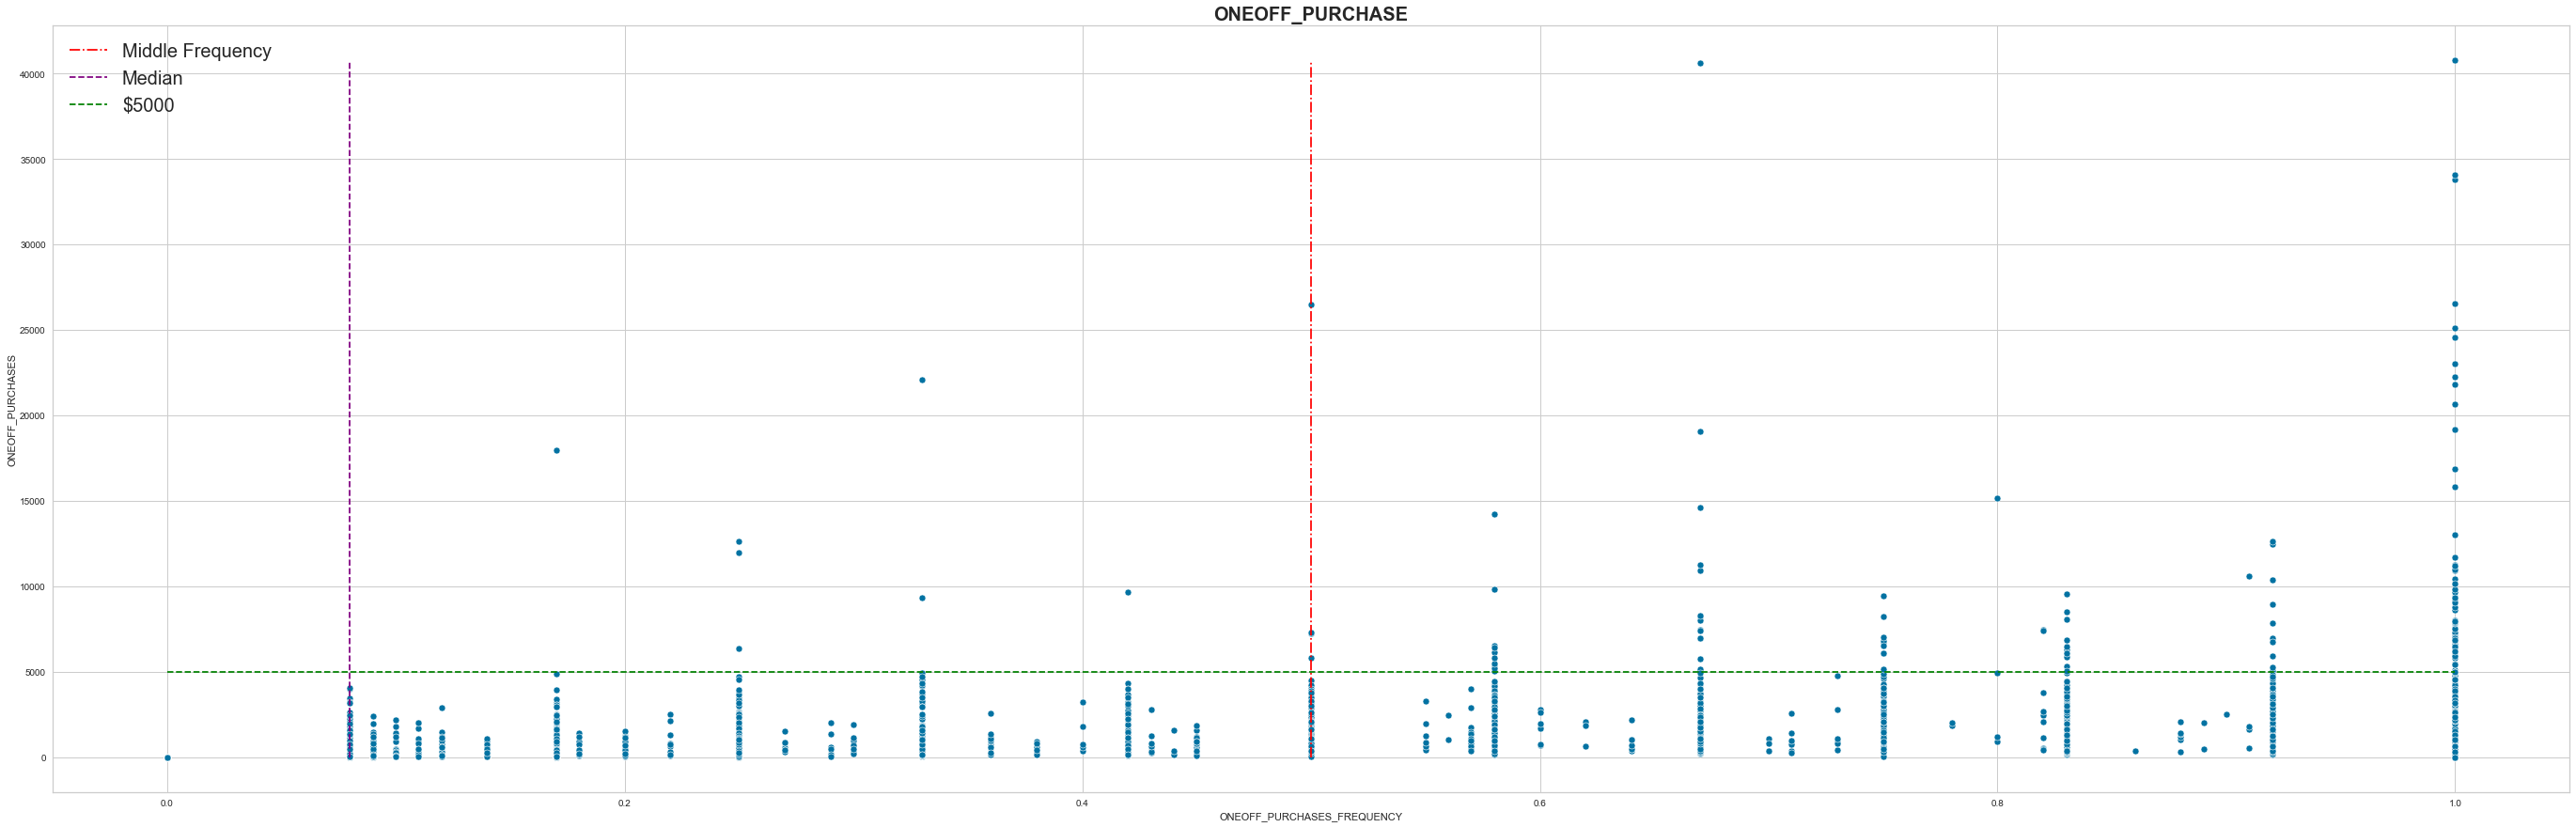

In [124]:
# Bivariate Analysis
plt.figure(figsize=(24 * 2, 15))
plt.title('ONEOFF_PURCHASE', weight='bold', fontsize=20)

sns.scatterplot(data=df, x='ONEOFF_PURCHASES_FREQUENCY', y='ONEOFF_PURCHASES')
plt.vlines(x=0.5, ymin=0, ymax=df['ONEOFF_PURCHASES'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['ONEOFF_PURCHASES_FREQUENCY'].quantile(0.5), ymin=0, ymax=df['ONEOFF_PURCHASES'].max(), color='purple', linestyle='dashed', label='Median')
plt.hlines(xmin=0, xmax=df['ONEOFF_PURCHASES_FREQUENCY'].max(), y=5000, color='green', linestyle='dashed', label='$5000')

plt.legend(fontsize=20)

- If We take a quick look, in my opinion the `ONEOFF_PURCHASES` is almost evenly spread out, but if wee look at where `Median` line situated, I can say that most customer rarely used `ONEOFF_PURCHASES` service.
- We can see that majority of transaction made is below $5000 and there are handful of people who made purchase with `ONEOFF_PURCHASES` above $5000.

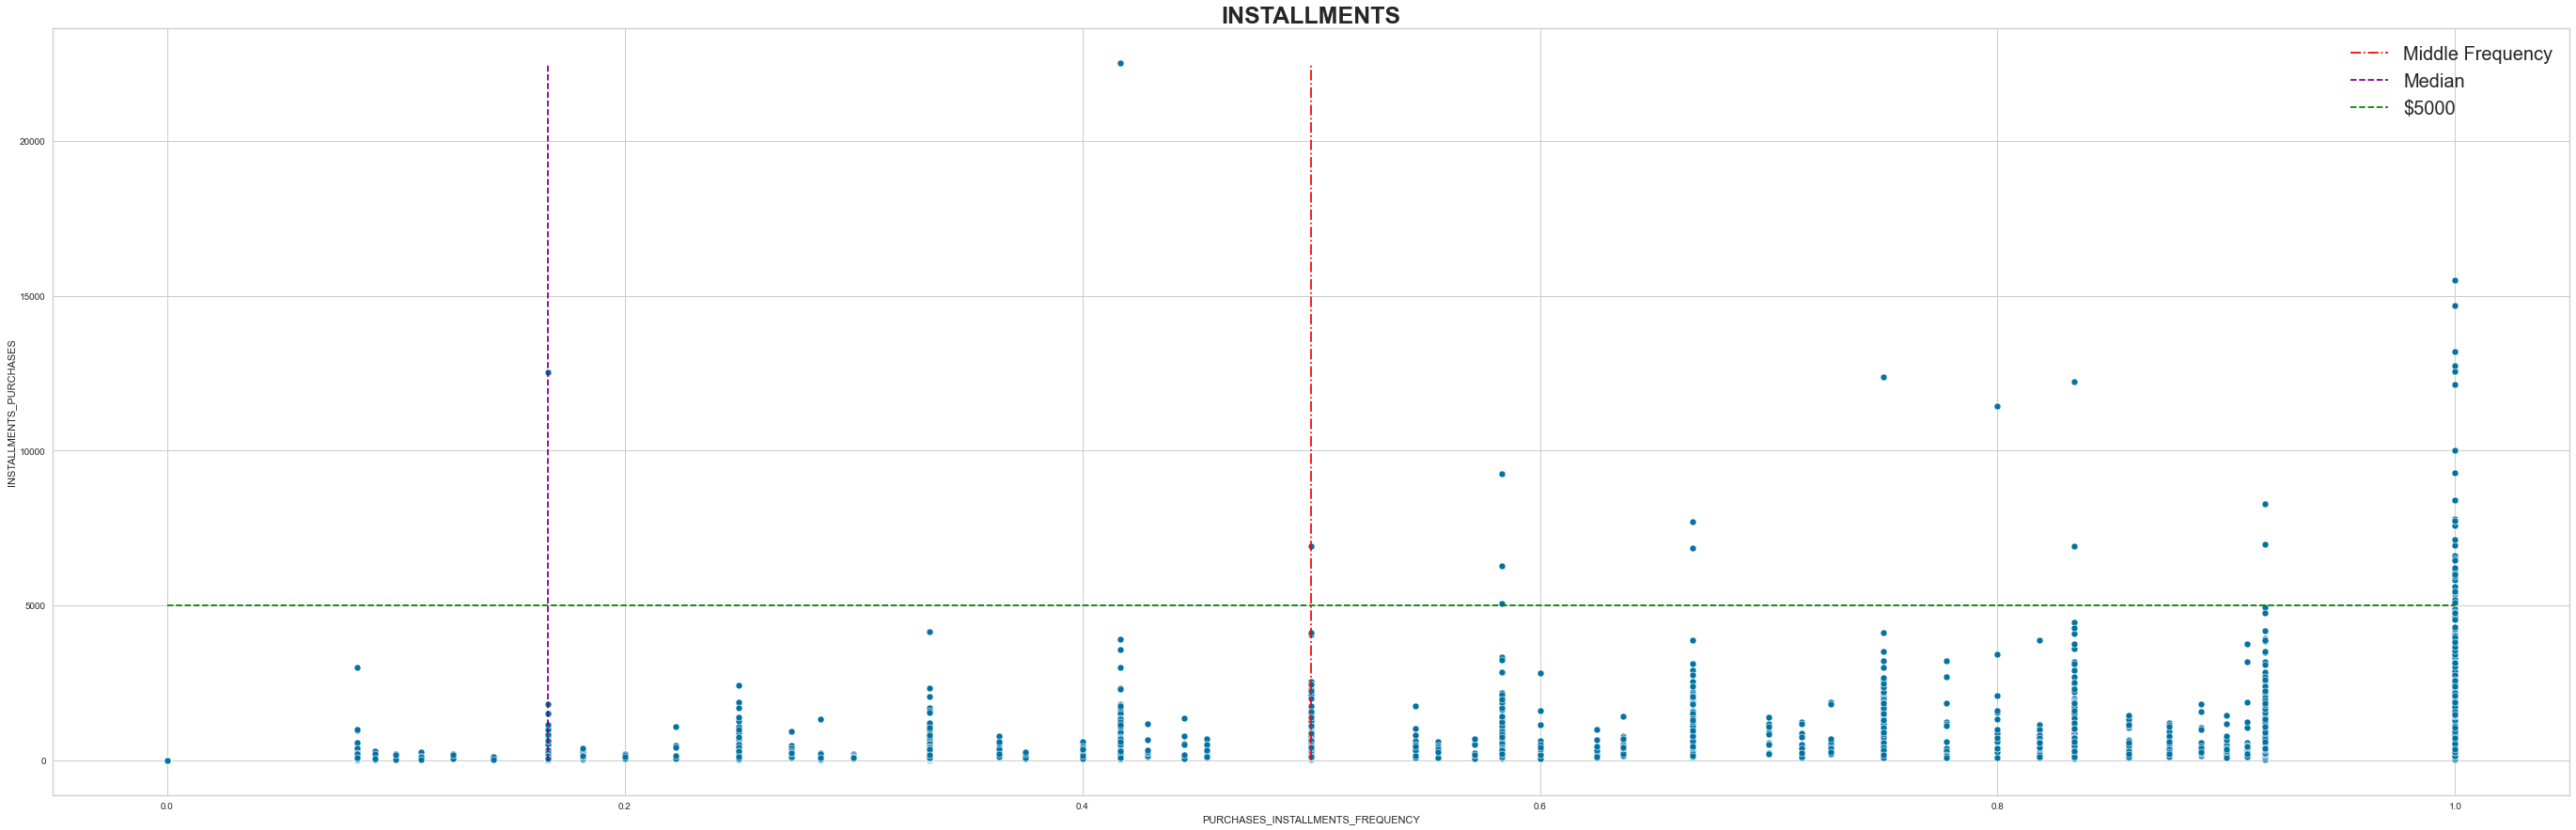

In [125]:
# Bivariate Analysis
plt.figure(figsize=(24 * 2, 15))
plt.title('INSTALLMENTS', weight='bold', fontsize=25)

sns.scatterplot(data=df, x='PURCHASES_INSTALLMENTS_FREQUENCY', y='INSTALLMENTS_PURCHASES')
plt.vlines(x=0.5, ymin=0, ymax=df['INSTALLMENTS_PURCHASES'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['PURCHASES_INSTALLMENTS_FREQUENCY'].quantile(0.5), ymin=0, ymax=df['INSTALLMENTS_PURCHASES'].max(), color='purple', linestyle='dashed', label='Median')
plt.hlines(xmin=0, xmax=df['ONEOFF_PURCHASES_FREQUENCY'].max(), y=5000, color='green', linestyle='dashed', label='$5000')

plt.legend(fontsize=20)
plt.show()

- If we take a quick look, We can see that more plot is scattered to the right of `Middle Frequency`, but if We look at where `Median` line situtated, I can say that most customer rarely used `INSTALLMENTS_PURCHASES` service.
- We can see that majority of transaction made is below $5000 and there are handful of people who made purchase above $5000.

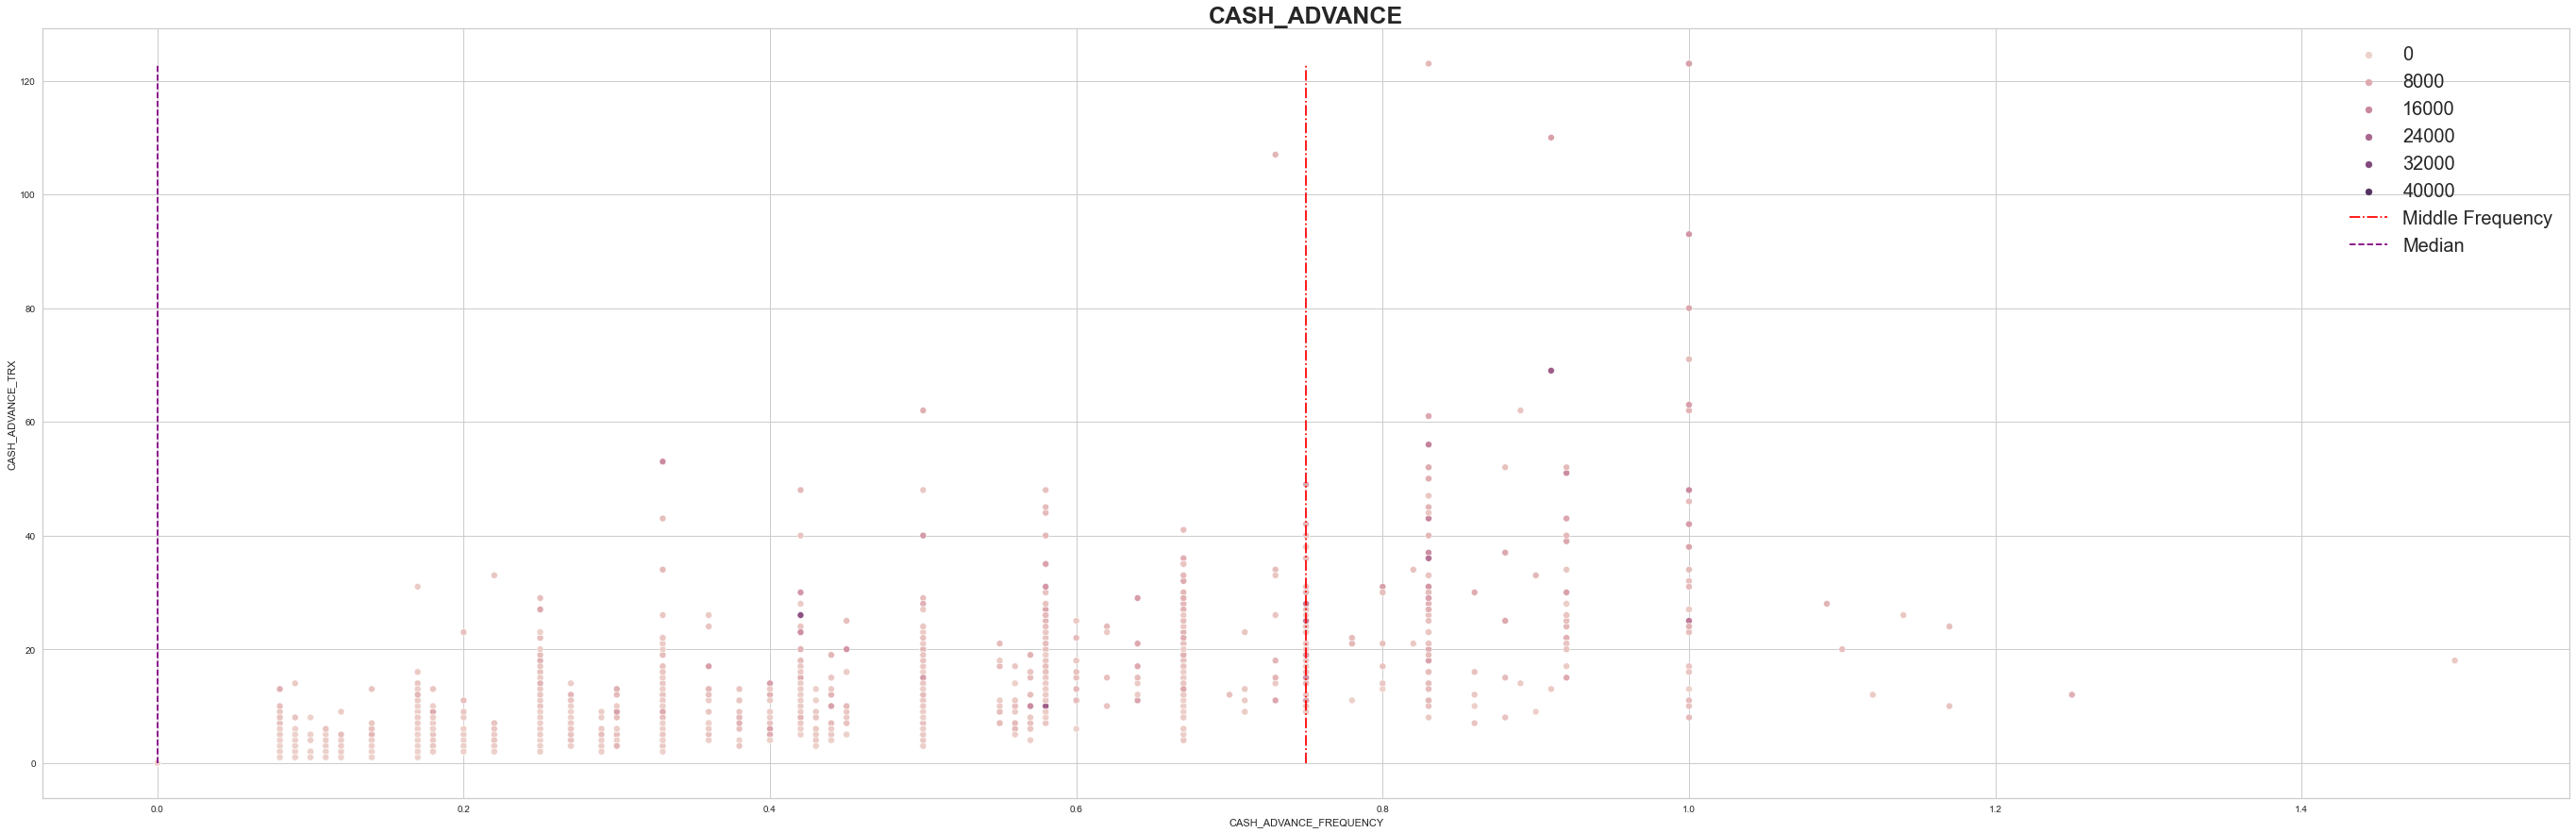

In [126]:
# Bivariate Analysis
plt.figure(figsize=(24 * 2, 15))
plt.title('CASH_ADVANCE', weight='bold', fontsize=25)

sns.scatterplot(data=df, x='CASH_ADVANCE_FREQUENCY', y='CASH_ADVANCE_TRX', hue='CASH_ADVANCE')
plt.vlines(x=0.75, ymin=0, ymax=df['CASH_ADVANCE_TRX'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['CASH_ADVANCE_FREQUENCY'].quantile(0.5), ymin=0, ymax=df['CASH_ADVANCE_TRX'].max(), color='purple', linestyle='dashed', label='Median')

plt.legend(fontsize=20)
plt.show()

- If we take a quick look, we can see that the frequency is spanning from 0 to 1.5, with middle-frequency value in 0.75.
- I am not sure yet why there are frequency that is higher than 1, but since there is no explanation that limit the value, I guess I'll left them be.
- We can see that the majority of plot is on the left of the red line, which means most customer rarely use `CASH_ADVANCE` service. This also confirmed by the `Median` lines that is positioned on the far left.

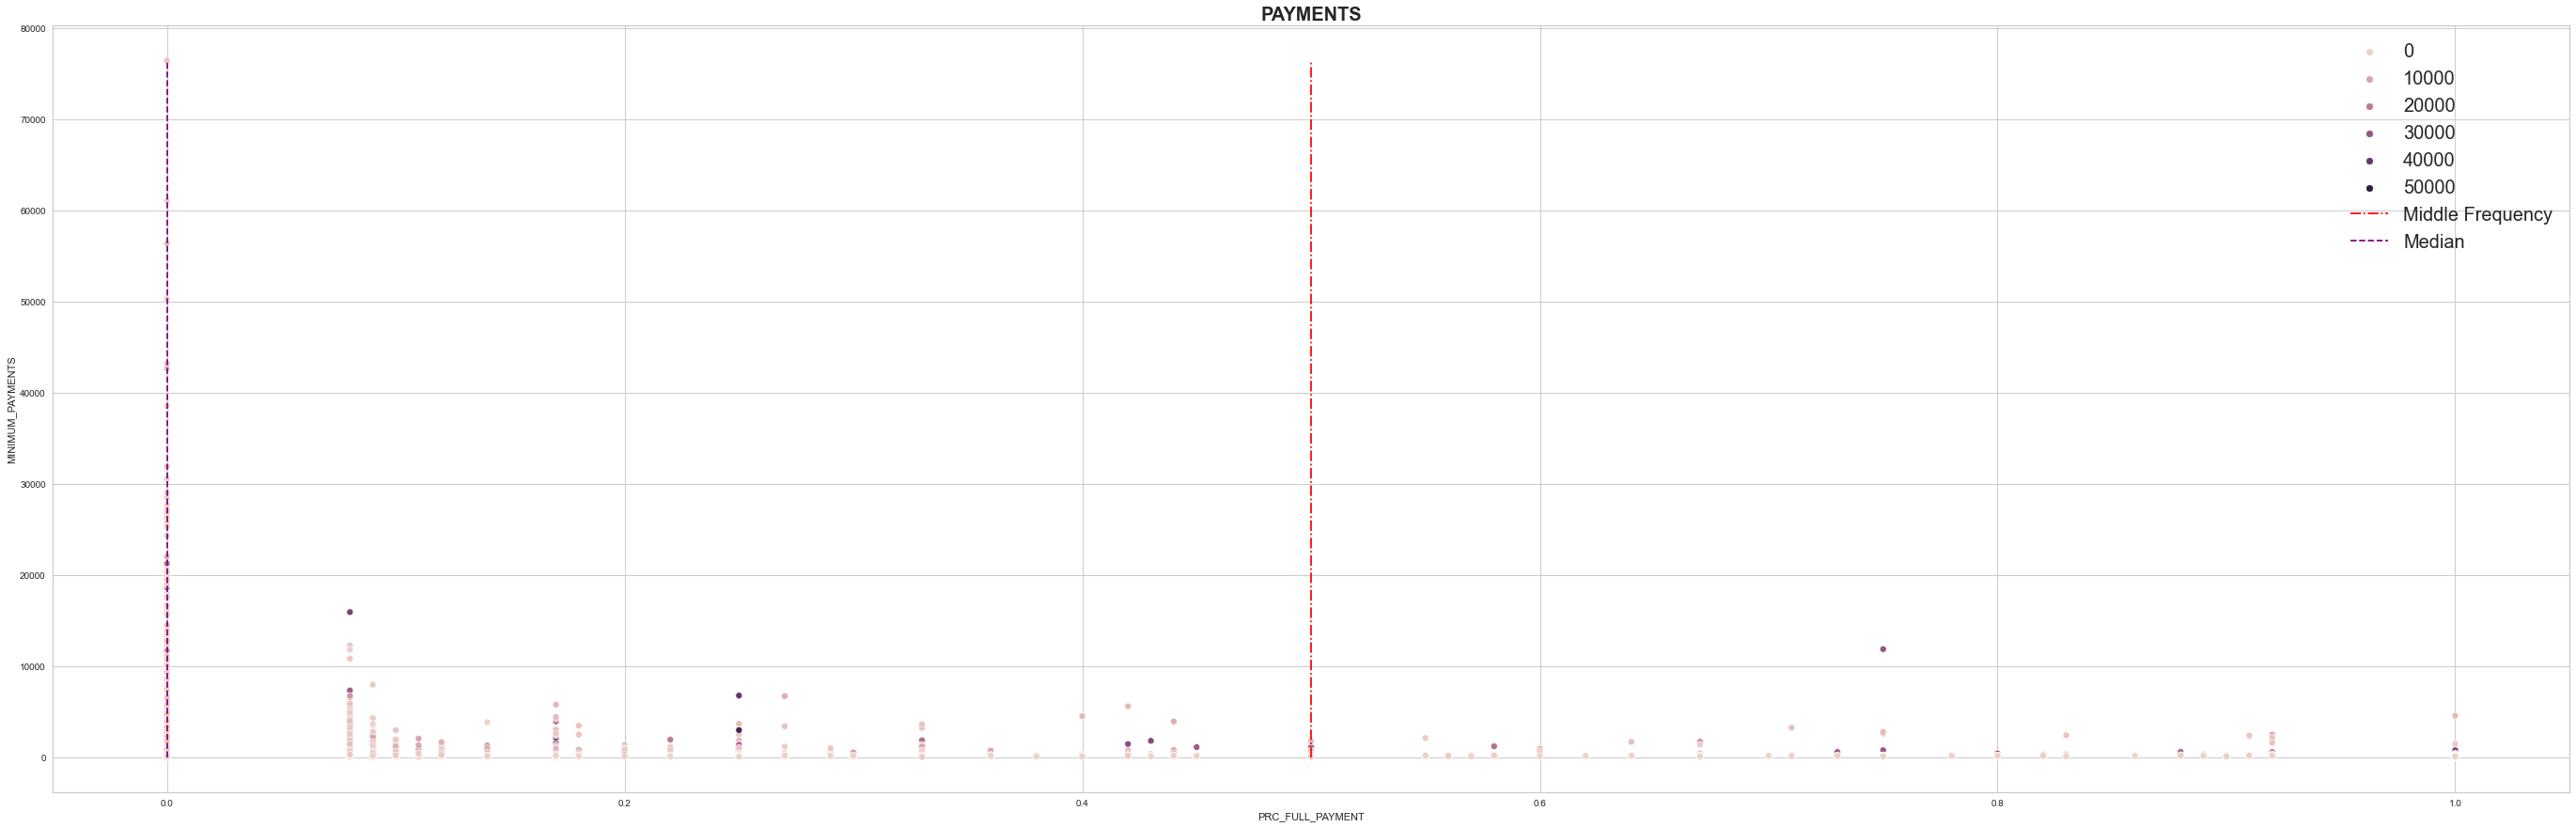

In [127]:
# Bivariate Analysis
plt.figure(figsize=(24 * 2, 15))
plt.title('PAYMENTS', weight='bold', fontsize=20)

sns.scatterplot(data=df, x='PRC_FULL_PAYMENT', y='MINIMUM_PAYMENTS', hue='PAYMENTS')
plt.vlines(x=0.5, ymin=0, ymax=df['MINIMUM_PAYMENTS'].max(), color='red', linestyle='dashdot', label='Middle Frequency')
plt.vlines(x=df['PRC_FULL_PAYMENT'].quantile(0.5), ymin=0, ymax=df['MINIMUM_PAYMENTS'].max(), color='purple', linestyle='dashed', label='Median')

plt.legend(fontsize=20)
plt.show()

- We can see that the majority of plot is on the left of the red line, which means there a lot of payment that is not fully paid yet.

## Model Analysis

**Cluster Number**

Text(0, 0.5, 'Inertia')

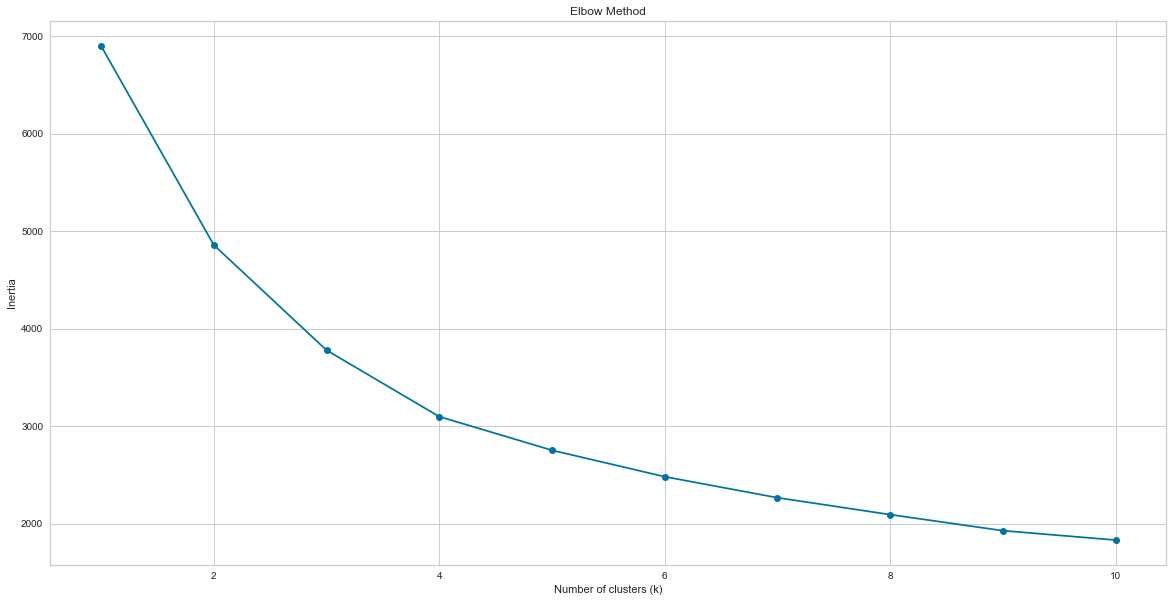

In [128]:
# K-Means Clustering
k_range = range(1,11)
inertias = []

for n_cluster in k_range:
    km = KMeans(n_clusters=n_cluster, random_state=42, init='k-means++', n_init=100).fit(train_reduced)
    inertias.append(km.inertia_)

# Visualitation of the inertia
plt.figure(figsize=(20,10))    
plt.title("Elbow Method")
plt.plot(k_range, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')

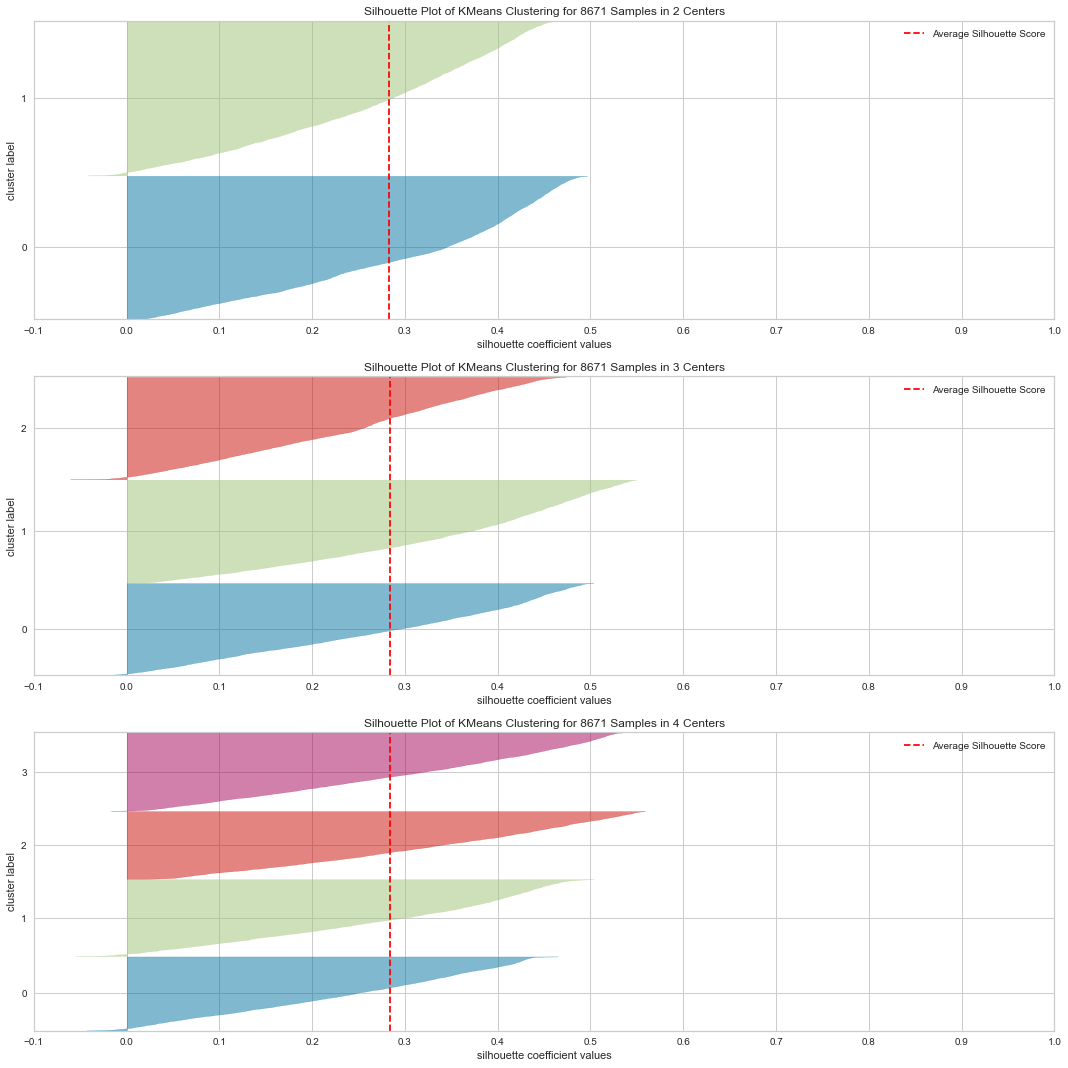

In [129]:
# Silhoutte Score for K-means
k_range = range(2,5)
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for n_cluster in k_range:
    km = KMeans(n_clusters=n_cluster, random_state=42, init='k-means++', n_init=100).fit(train_reduced)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=axes[n_cluster-2])
    visualizer.fit(train_reduced)
    visualizer.finalize()
    axes[n_cluster-2].set_xlim(-0.1, 1)
    
plt.tight_layout()

By looking at `Elbow Mwthod` graph, the optimal number of clusters is between 2 to 4 cluster.\
By looking at `Silhouette Method` graph, the optimal number of clusters also between 2 to 4 cluster.\
I'll chose 3 as the optimal number of cluster for this project.

**Model Comparisson**

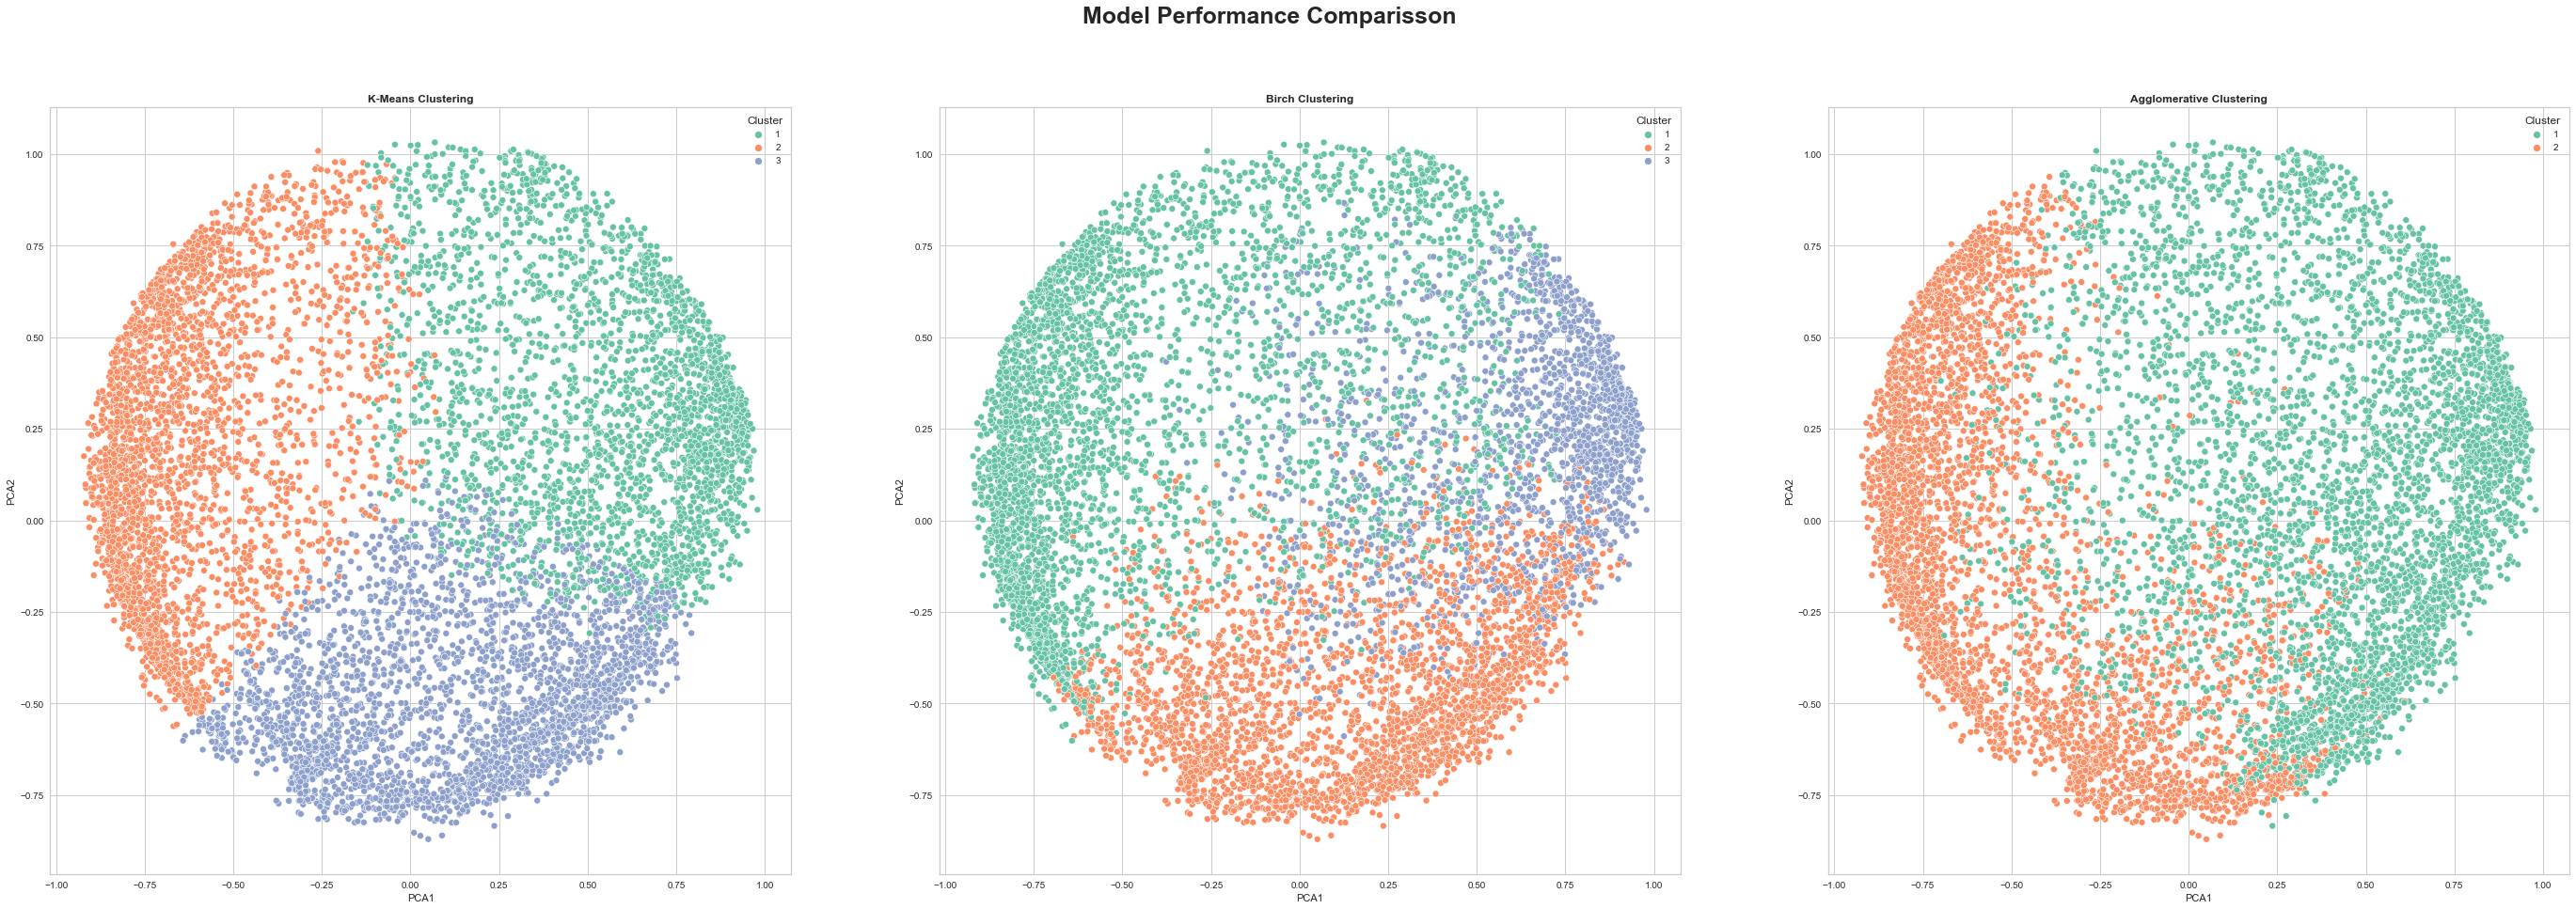

In [130]:
# Model Comparisson
fig, ax = plt.subplots(1,3, figsize=(24*2, 15))
plt.suptitle('Model Performance Comparisson', weight='bold', fontsize=25)

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df_km, legend='full', palette='Set2', ax=ax[0])
ax[0].set_title('K-Means Clustering', weight='bold')

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df_bir, legend='full', palette='Set2', ax=ax[1])
ax[1].set_title('Birch Clustering', weight='bold')

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df_agl, legend='full', palette='Set2', ax=ax[2])
ax[2].set_title('Agglomerative Clustering', weight='bold')

plt.show()

**Model Analysis Conclusion**

Based on process above, I can say that those three algorithm succesfully cluster the dataset, but `Birch Clustering` and `Agglomerative Clustering` failed to `evenly cluster` the dataset.\
Hence, I'll use `K-Means Clustering` as my main model and proceed to inference set.

## Cluster Analysis

To make my analysis more easy to understand, I'll just focus on these following features to describe each cluster charachteristics:
- BALANCE
- PURCHASES
- ONEOFF_PURCHASES
- INSTALLMENT_PURCHASE
- CASH_ADVANCE
- CREDIT_LIMIT
- PAYMENTS

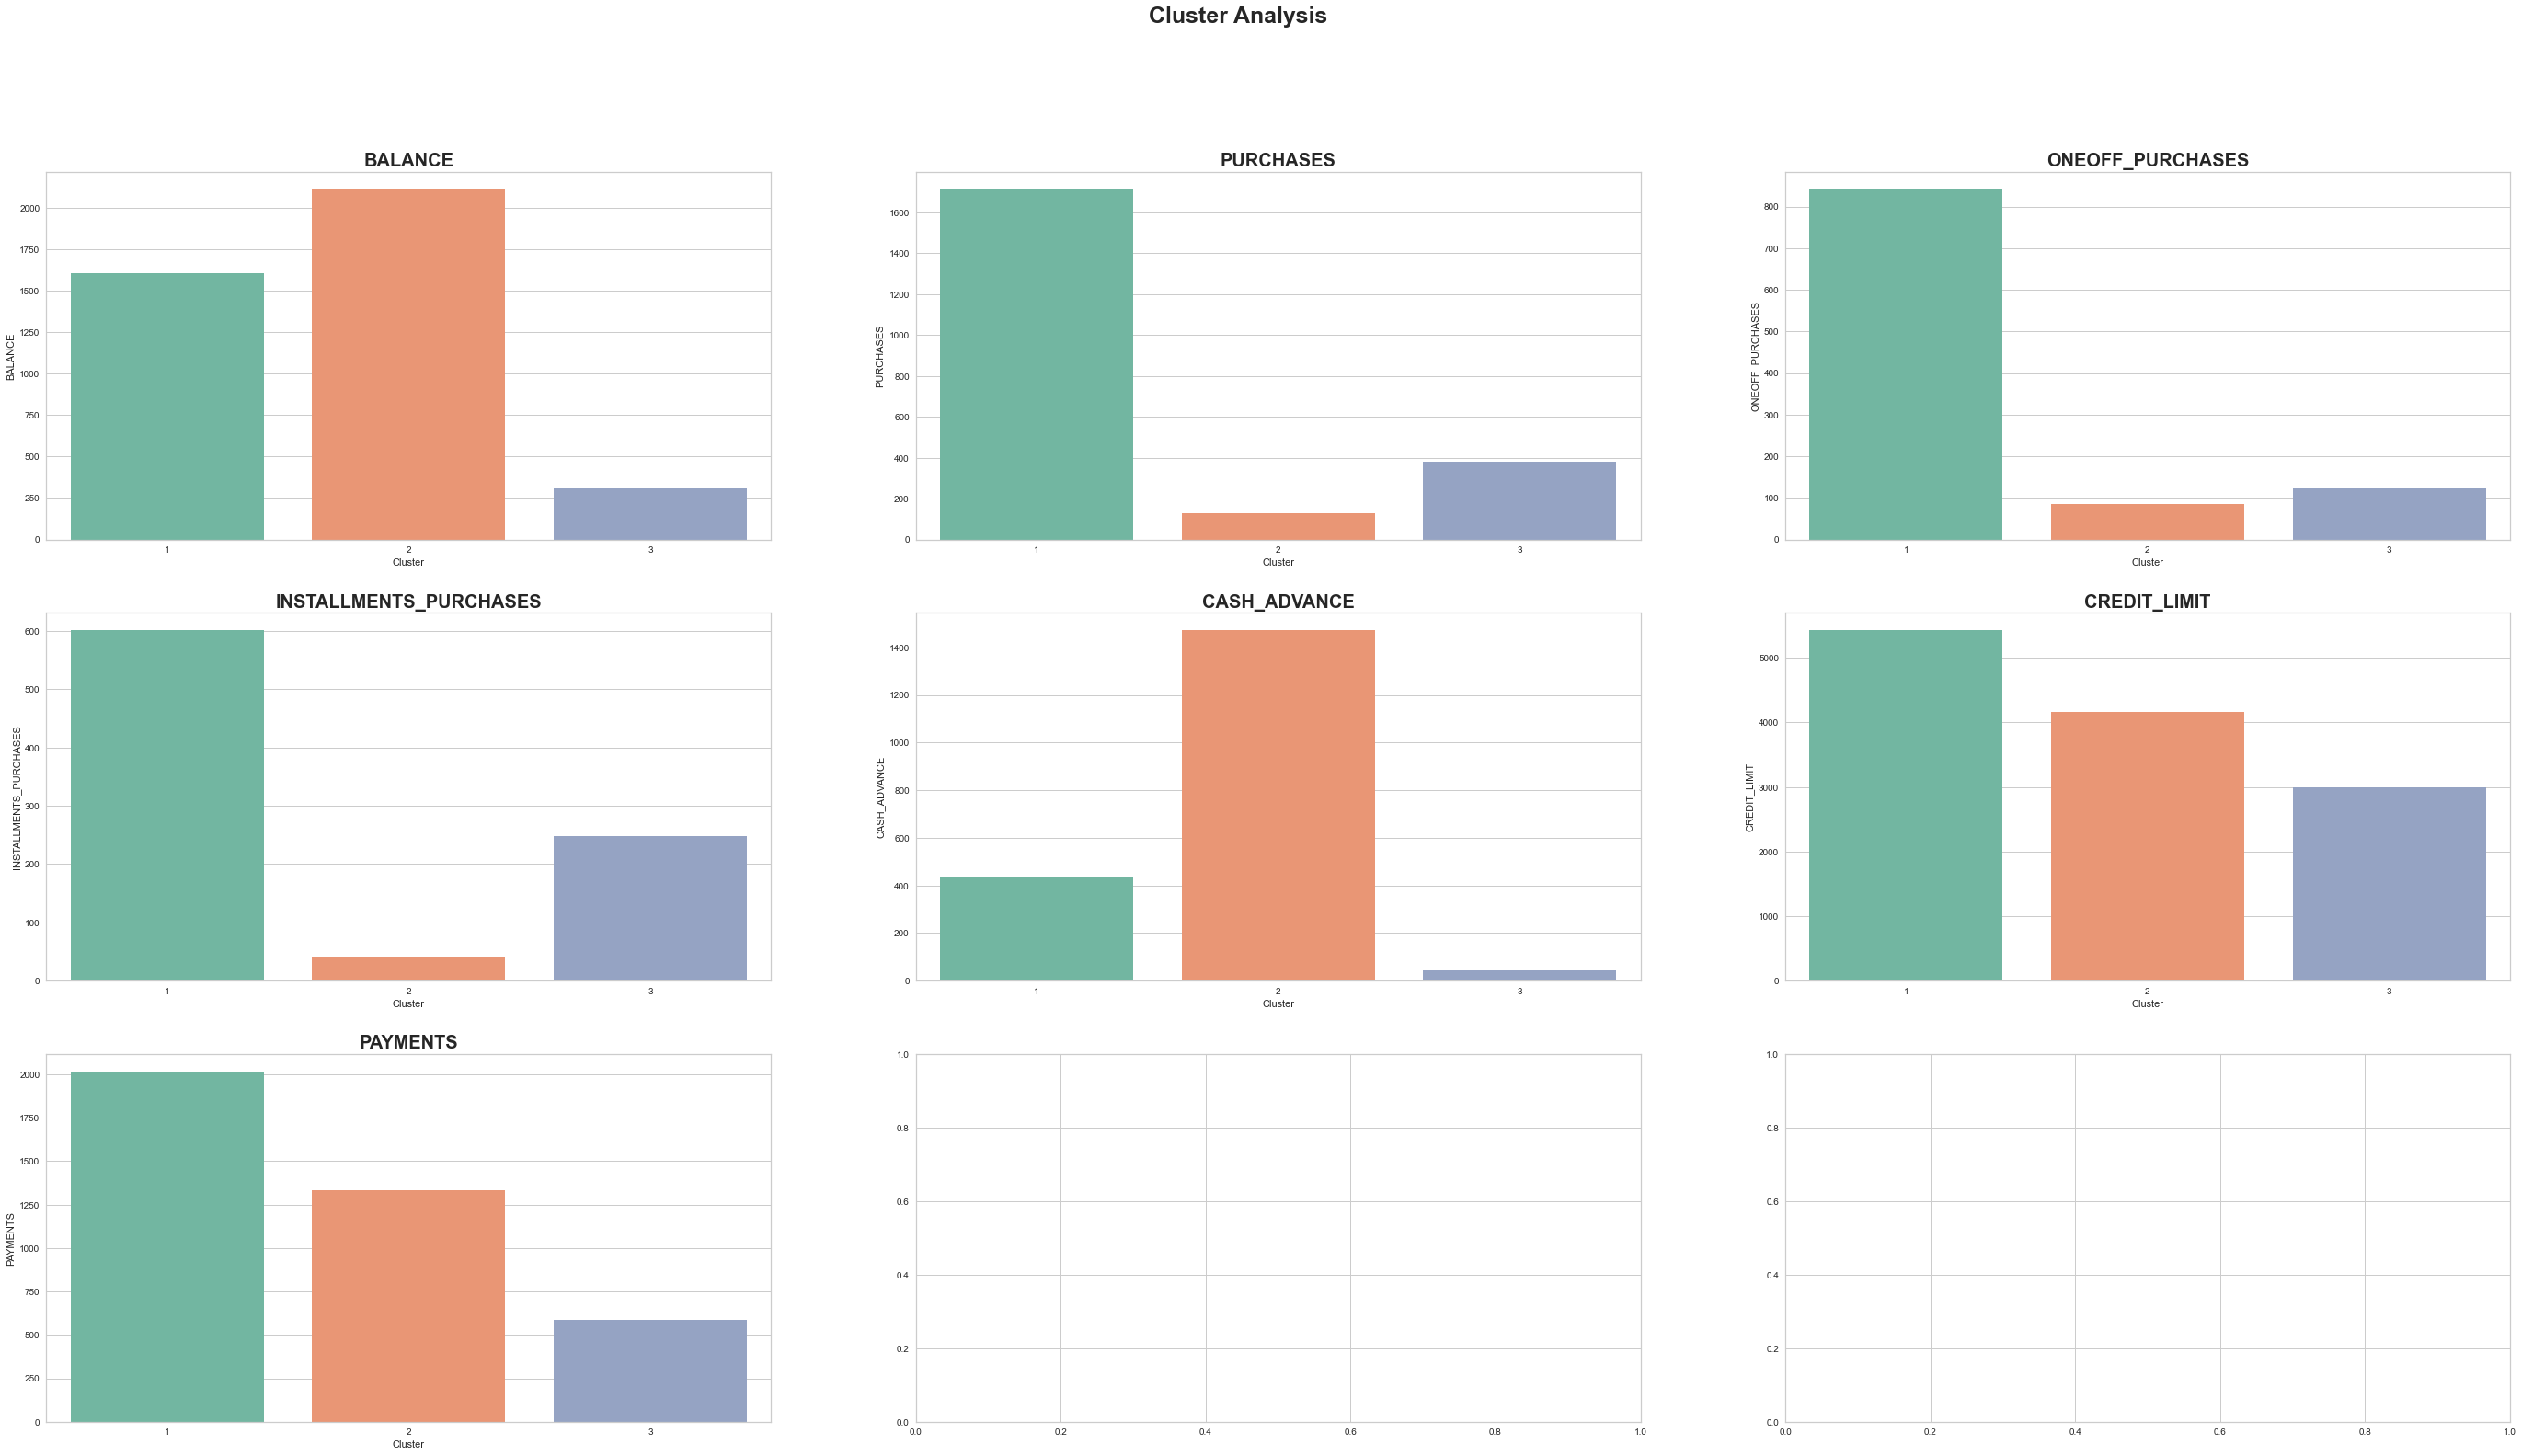

In [131]:
# Cluster Visualizations
fig, ax = plt.subplots(3,3, figsize=(24 * 2, 25))
fig.suptitle('Cluster Analysis', fontsize=25, weight='bold')

sns.barplot(x='Cluster', y='BALANCE', data=df_EDA_, palette='Set2', ax=ax[0,0])
ax[0,0].set_title('BALANCE', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='PURCHASES', data=df_EDA_, palette='Set2', ax=ax[0,1])
ax[0,1].set_title('PURCHASES', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='ONEOFF_PURCHASES', data=df_EDA_, palette='Set2', ax=ax[0,2])
ax[0,2].set_title('ONEOFF_PURCHASES', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='INSTALLMENTS_PURCHASES', data=df_EDA_, palette='Set2', ax=ax[1,0])
ax[1,0].set_title('INSTALLMENTS_PURCHASES', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='CASH_ADVANCE', data=df_EDA_, palette='Set2', ax=ax[1,1])
ax[1,1].set_title('CASH_ADVANCE', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='CREDIT_LIMIT', data=df_EDA_, palette='Set2', ax=ax[1,2])
ax[1,2].set_title('CREDIT_LIMIT', fontsize=20, weight='bold')

sns.barplot(x='Cluster', y='PAYMENTS', data=df_EDA_, palette='Set2', ax=ax[2,0])
ax[2,0].set_title('PAYMENTS', fontsize=20, weight='bold')

plt.show()

**Analysis**

**Cluster 1 is Power User**

- They `actively use credit card` to pay for their purchases, wether to pay it `using oneoff purchase or installments purchase`.
- They `sometimes borrow money` from cash advance service too.
- They have high credit limit and never forget to pay their credit cards.

**Cluster 2 is Borrower User**

- They `rarely use credit card` to pay for their purchases.
- They `mostly use credit card to borrow money` from cash advance service.
- They have medium credit limit and  pay their credit cards.

**Cluster 3 is Casual User**

- They `seldomly use credit card` to pay for their purchases, If they use it, they tends choose to use `via insallment purchase`.
- They `hardly use credit card to borrow money` from cash advance service.
- They have low to medium credit limit and pay their credit cards.